In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Lasso, LassoCV

import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import missingno as msno
#import sweetviz as sv
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('OnlineNewsPopularity.csv')
df = df.drop(columns=['url', 'timedelta'])
df.head()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385        4.0             2.0       1.0         0.0   
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   
4                  0.540890       19.0            19.0      20.0         0.0   

   average_token_length  ...  min_positive_polarity  max_positive_polarity  \
0              4.680365  ...               0.100000                    0.7   
1              4.913725  ...               0.033333                    0.7   
2              4.393365  ...               0.100000                    1.0   
3              4.404896  ...               0.136364                    0.8   
4              4.682836  ...               0.033333                    1.0   

   avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
0              -0.350000                 -0.600              -0.200000   
1              -0.118750                 -0.125              -0.100000   
2              -0.466667                 -0.800              -0.133333   
3              -0.369697                 -0.600              -0.166667   
4              -0.220192                 -0.500              -0.050000   

   title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
0            0.500000                 -0.187500                0.000000   
1            0.000000                  0.000000                0.500000   
2            0.000000                  0.000000                0.500000   
3            0.000000                  0.000000                0.500000   
4            0.454545                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  
0                      0.187500     593  
1                      0.000000     711  
2                      0.000000    1500  
3                      0.000000    1200  
4                      0.136364     505  

[5 rows x 59 columns]

# EDA 1

## See the spread of the data

                                             |          | [  0%]   00:00 -> (? left)


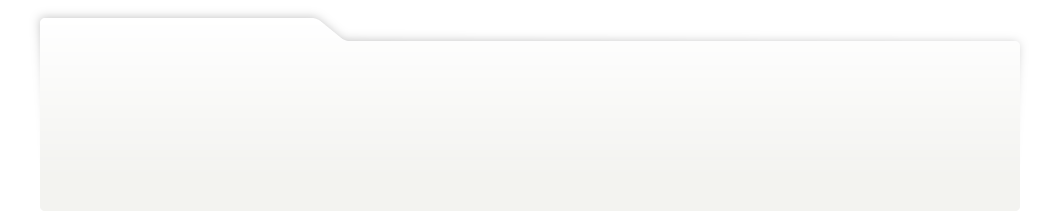
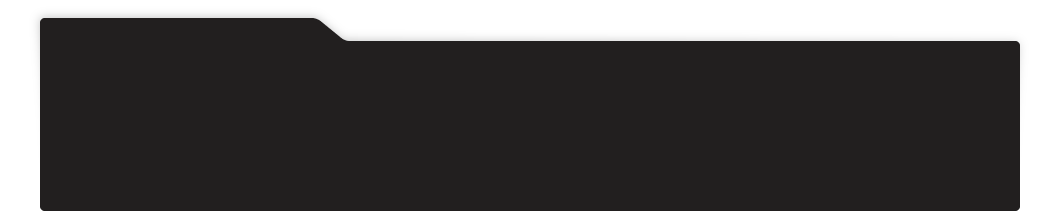
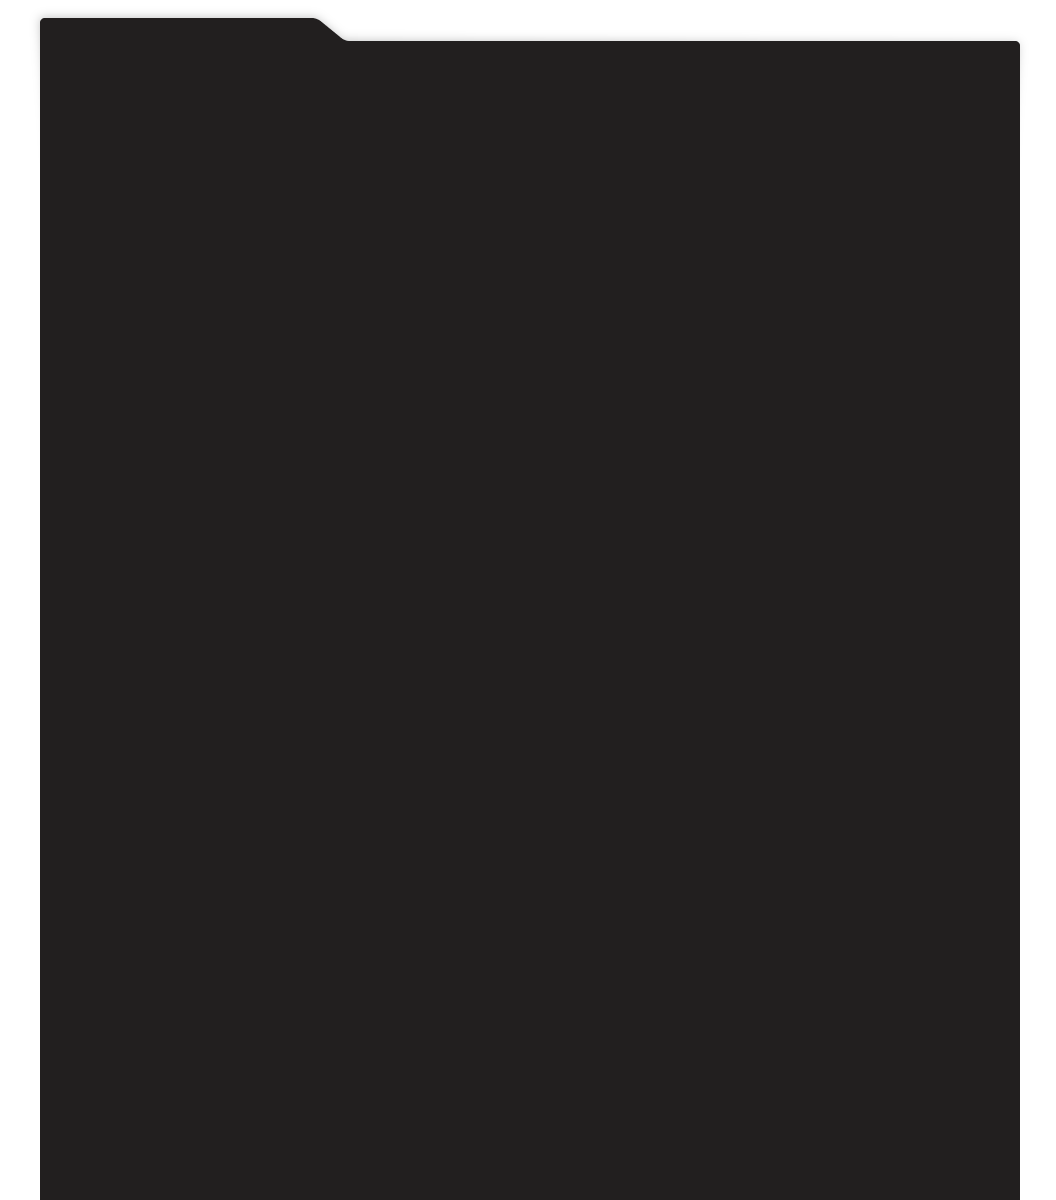
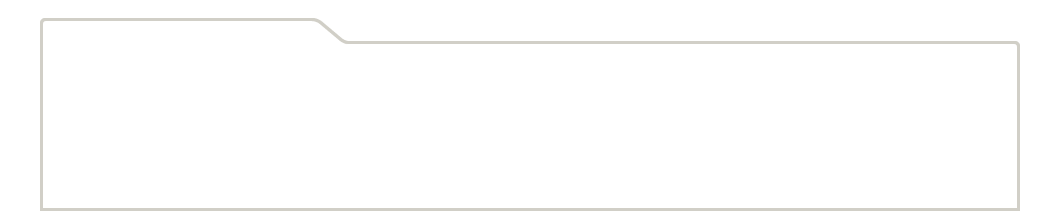
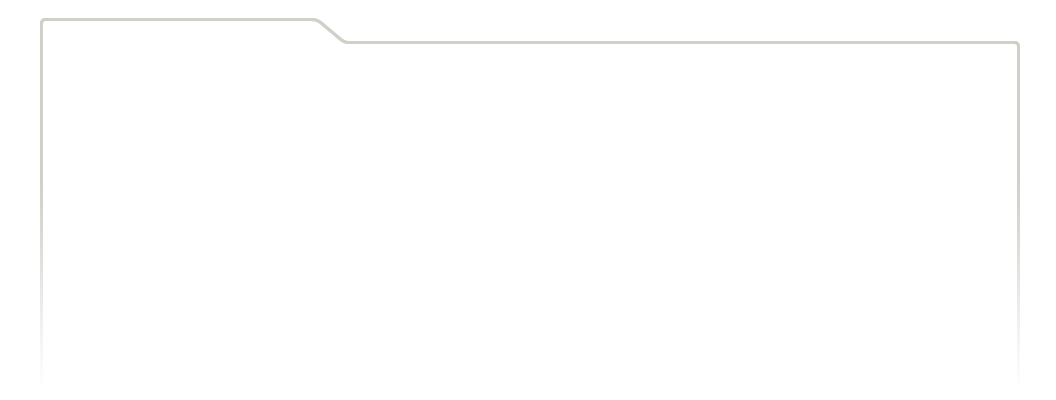
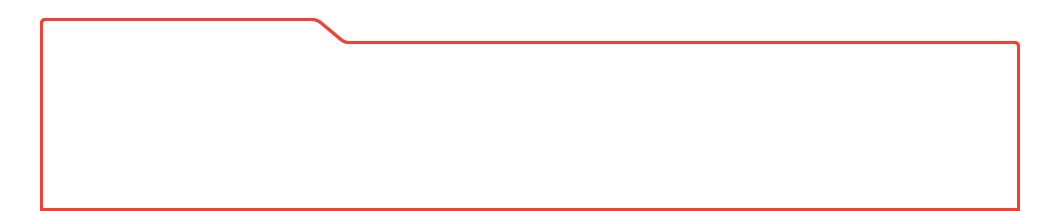
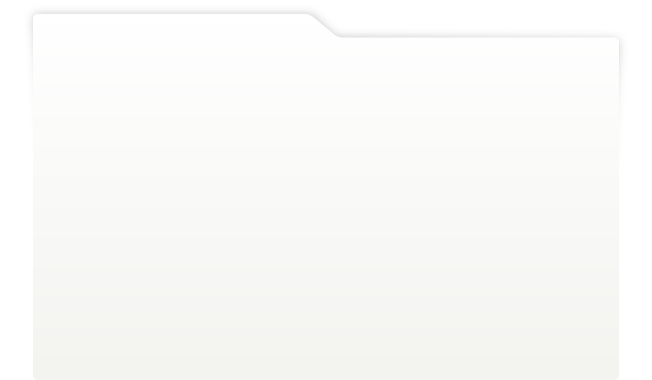
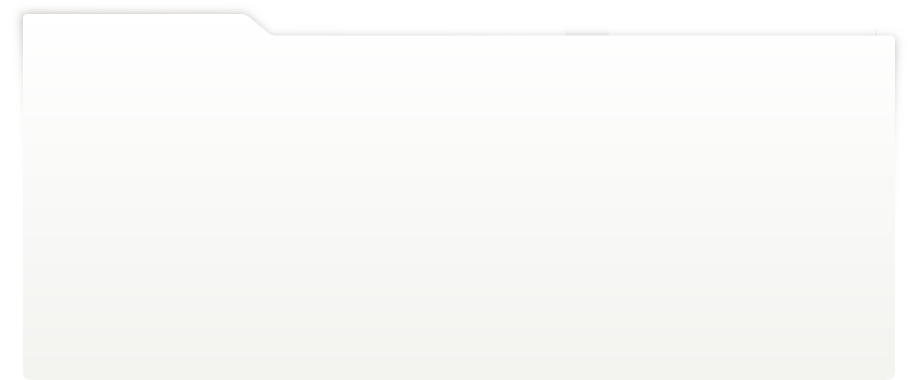
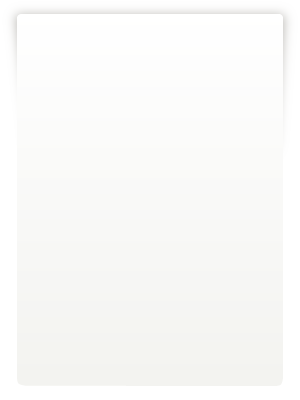
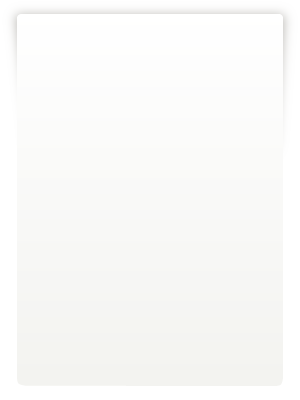
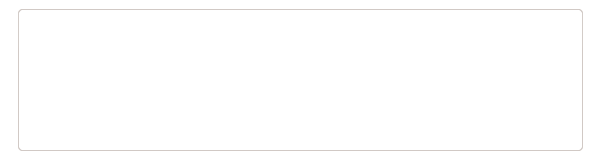
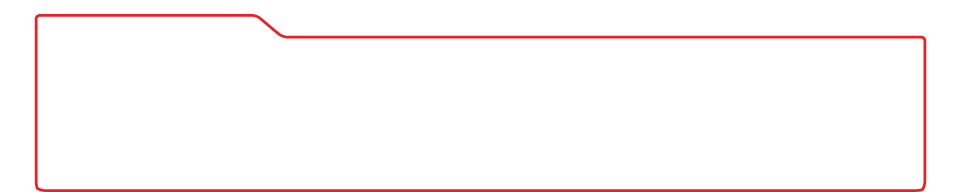
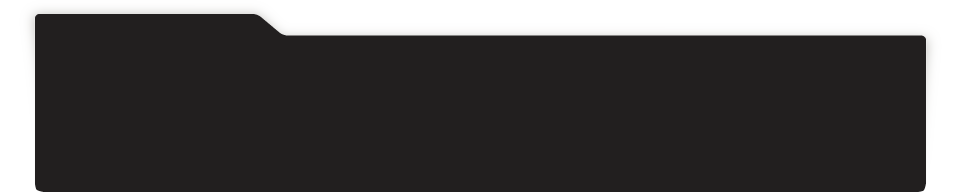
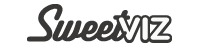
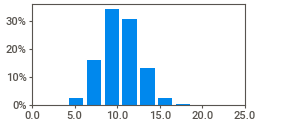
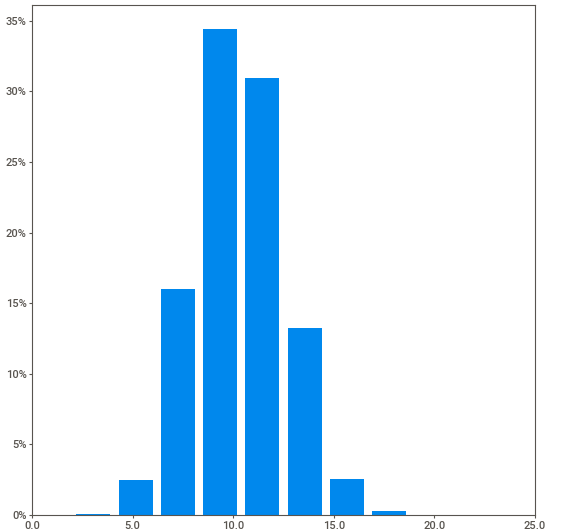
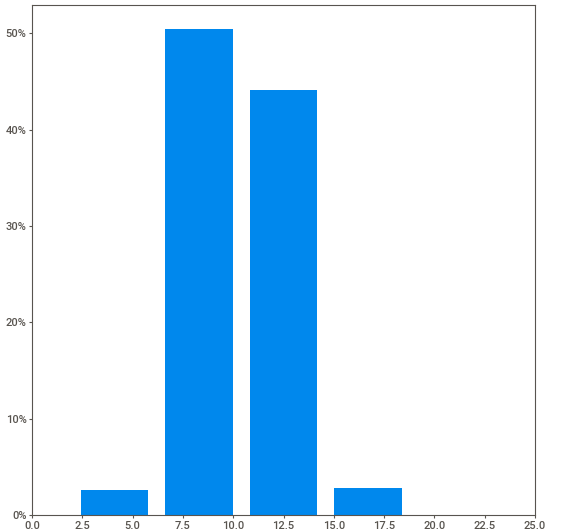
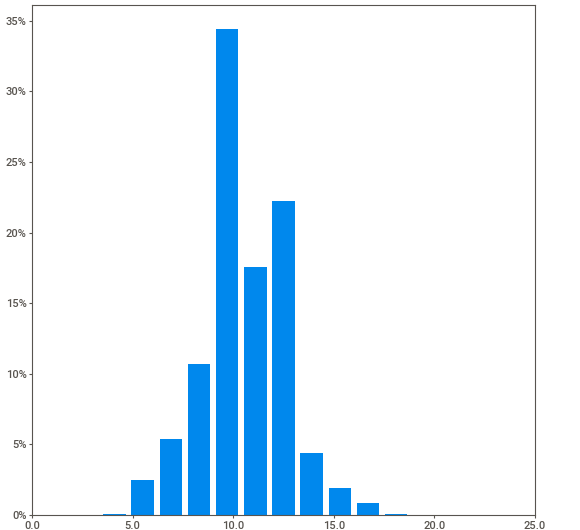
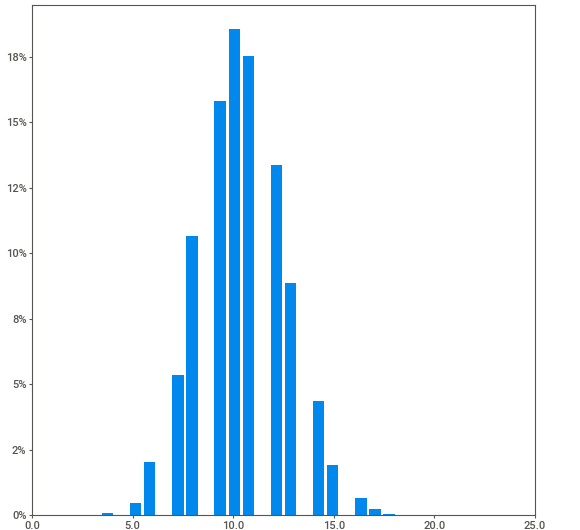
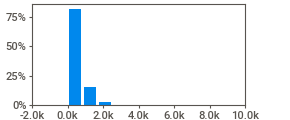
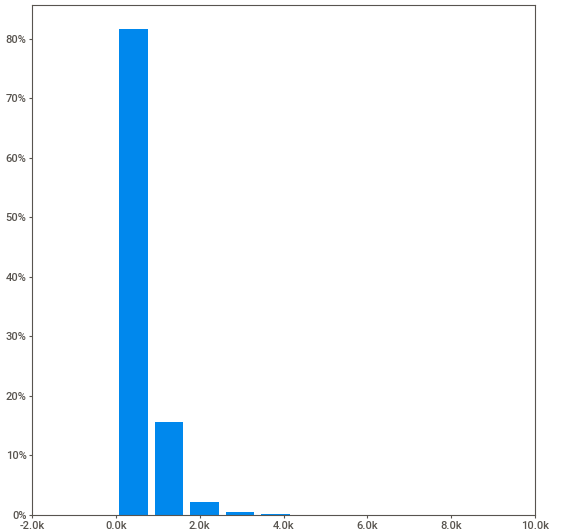
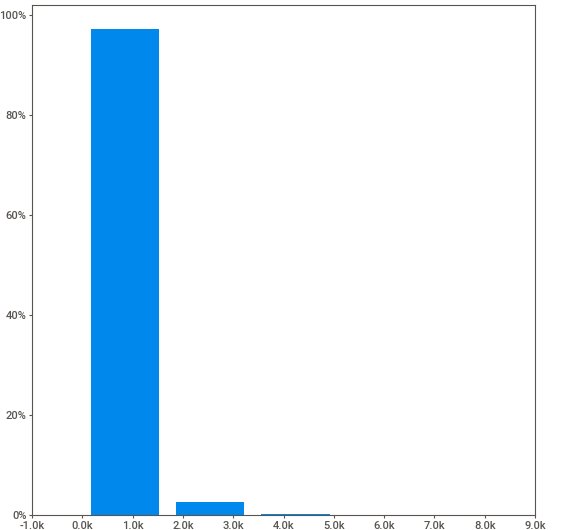
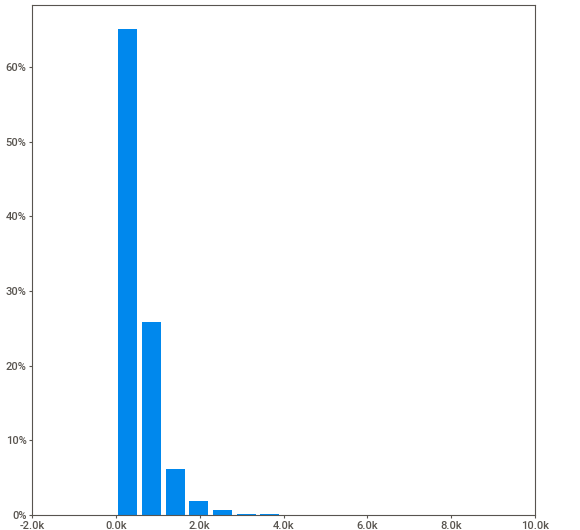
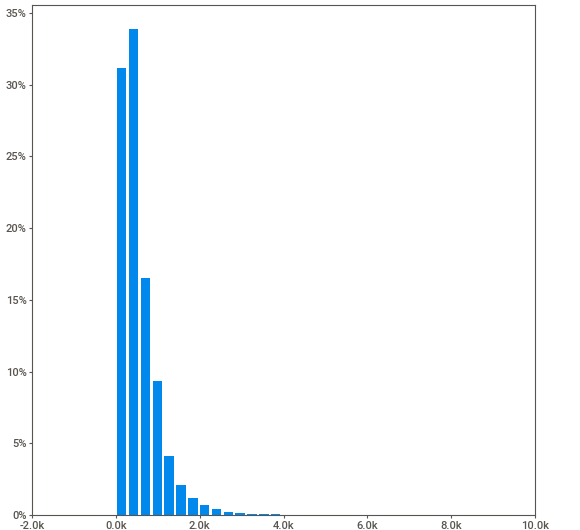
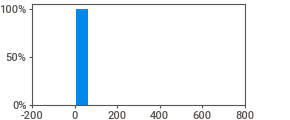
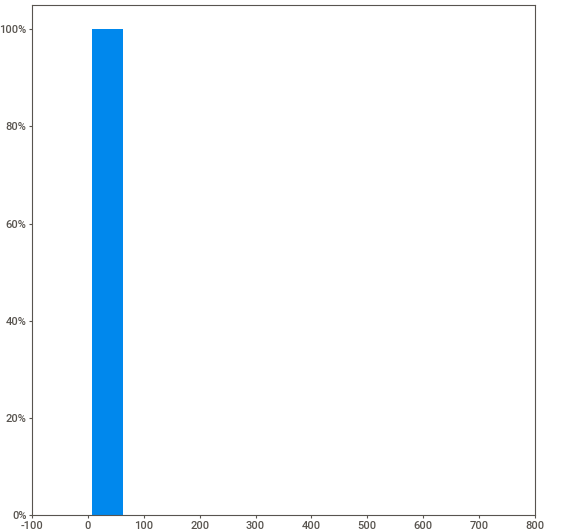
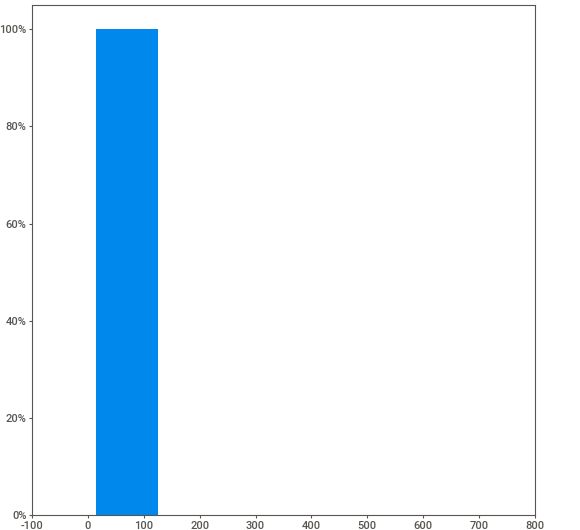
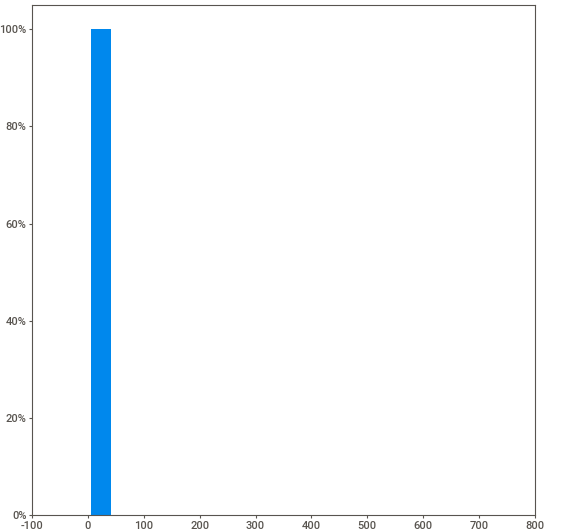
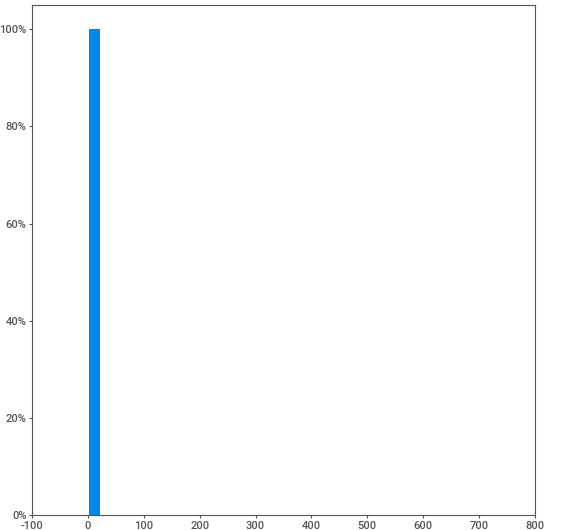
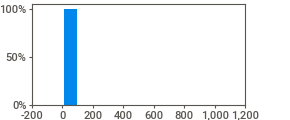
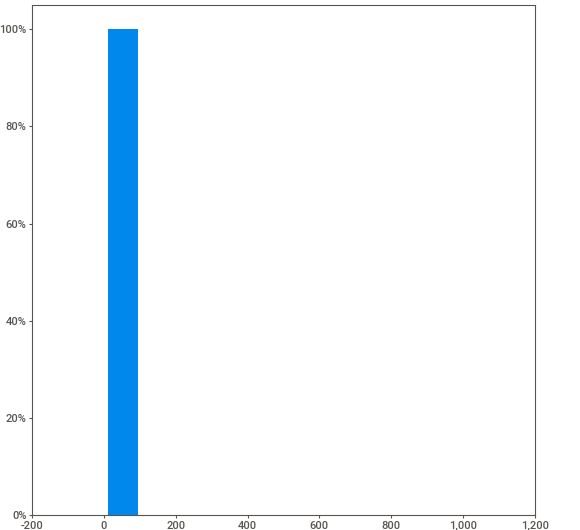
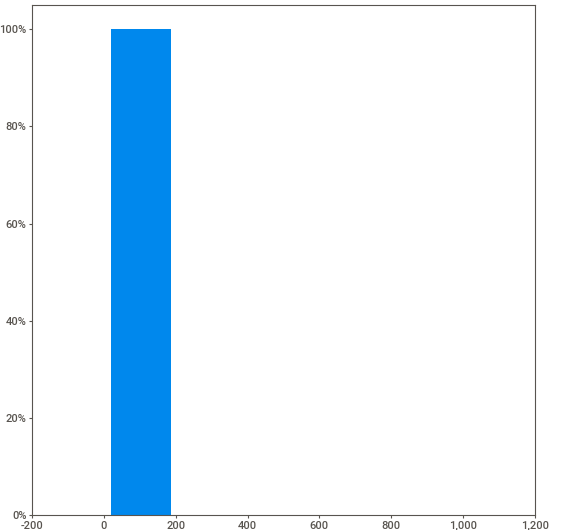
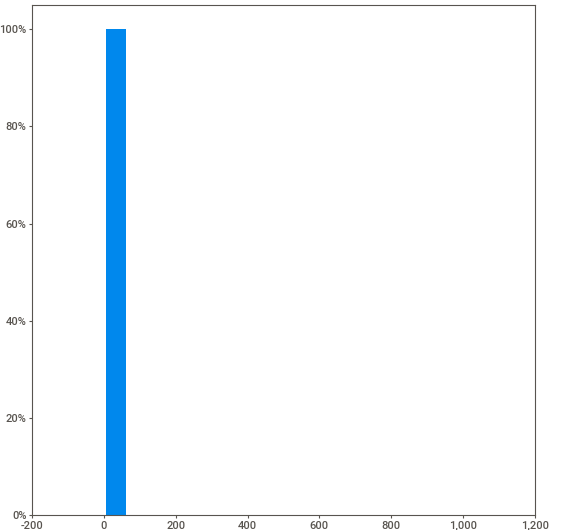
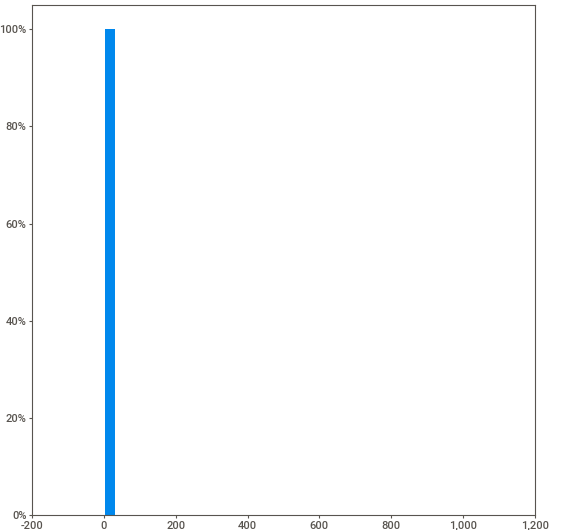
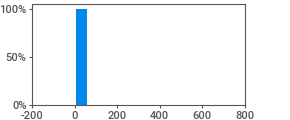
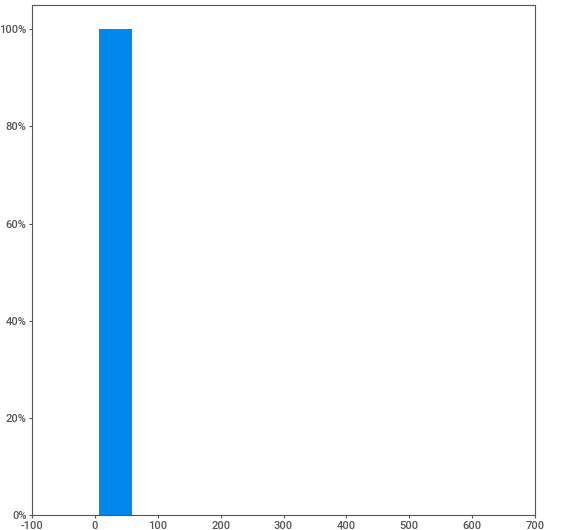
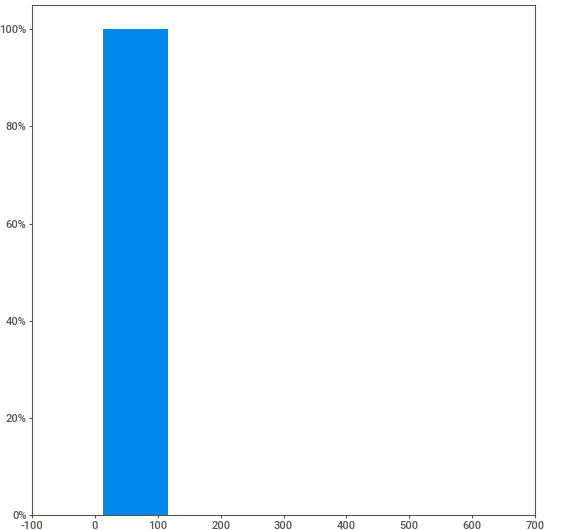
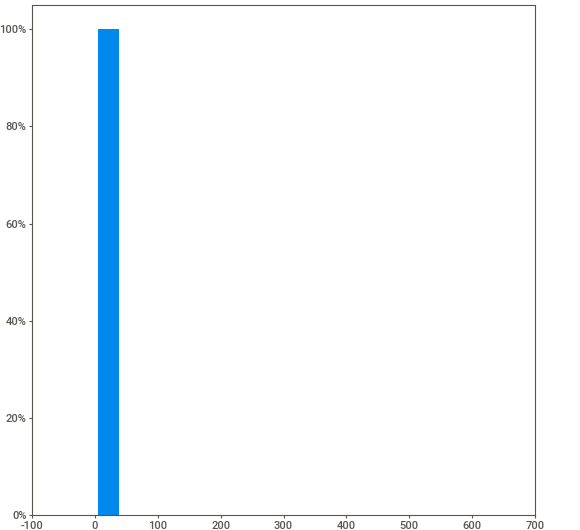
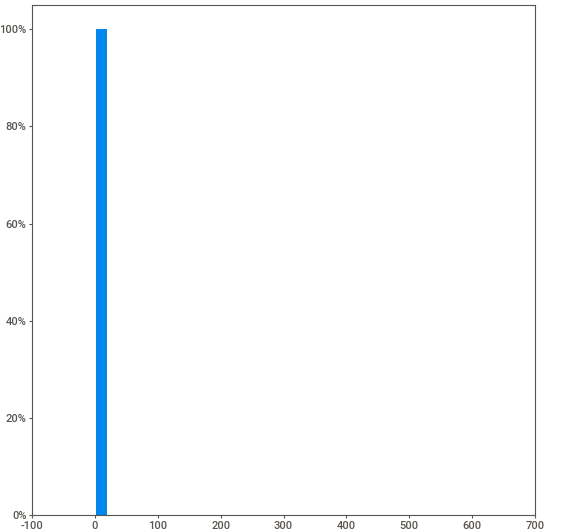
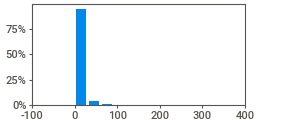
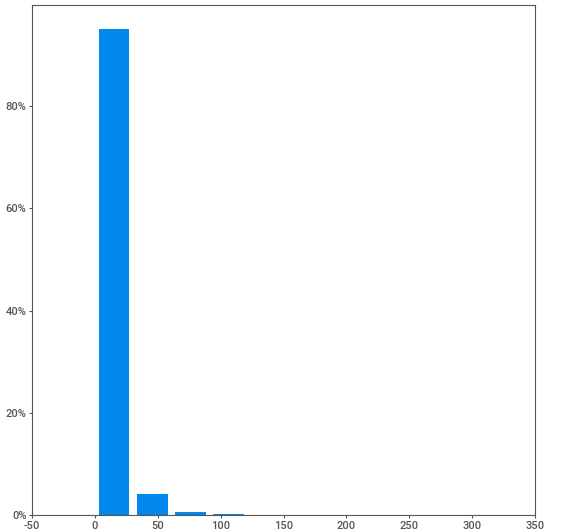
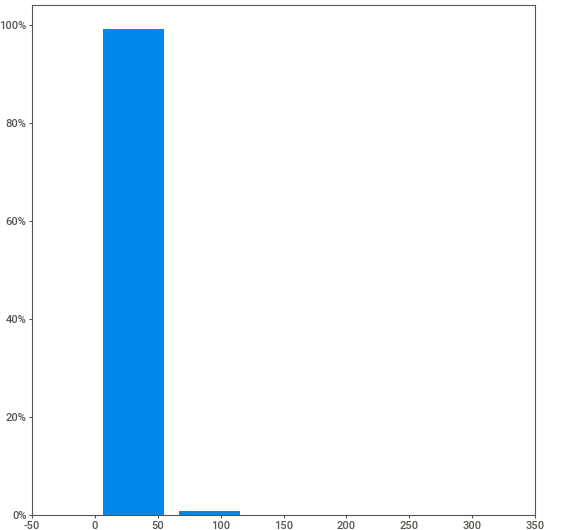
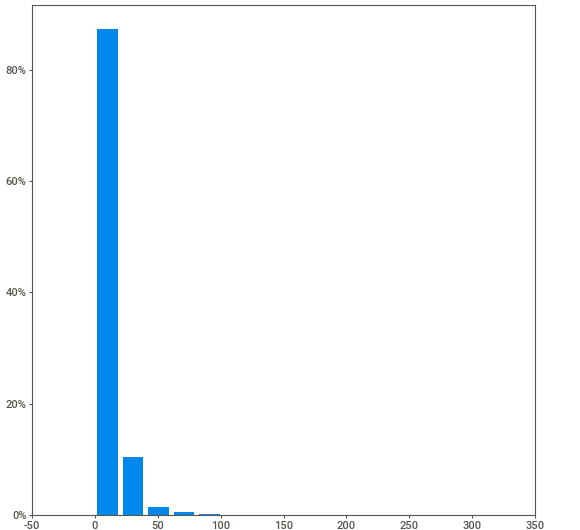
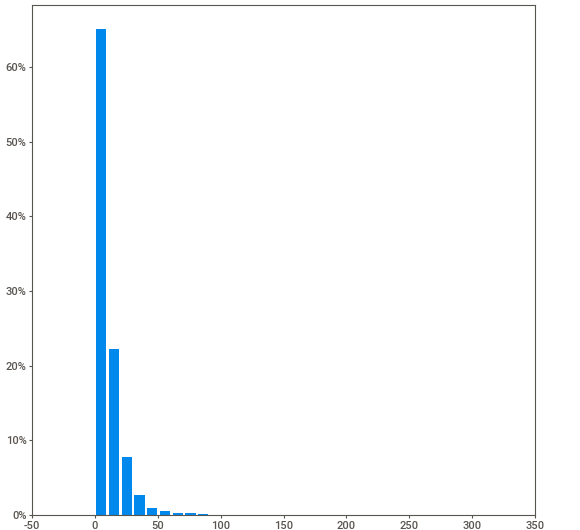
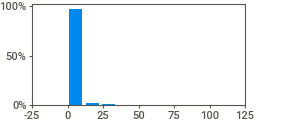
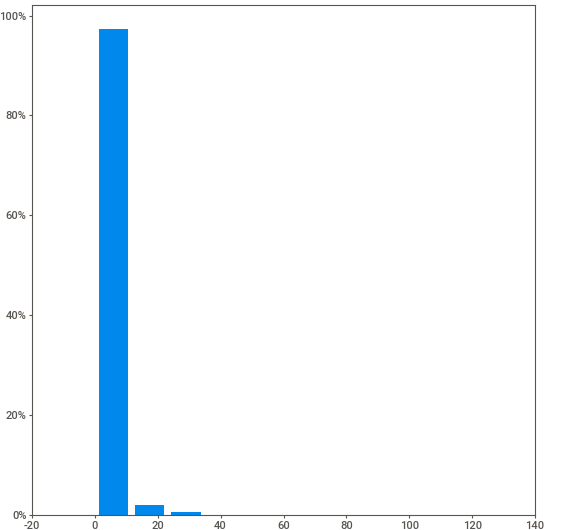
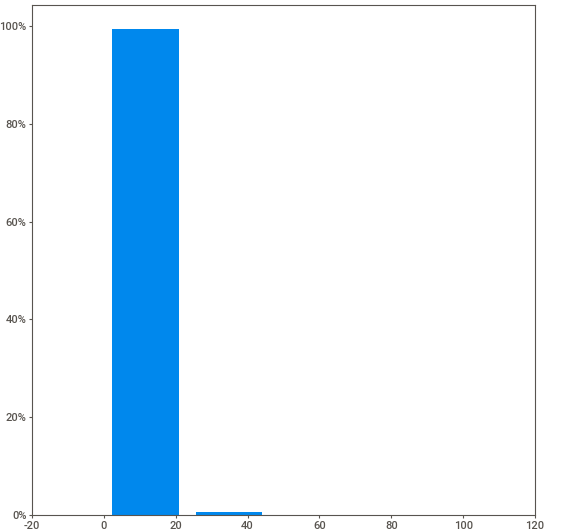
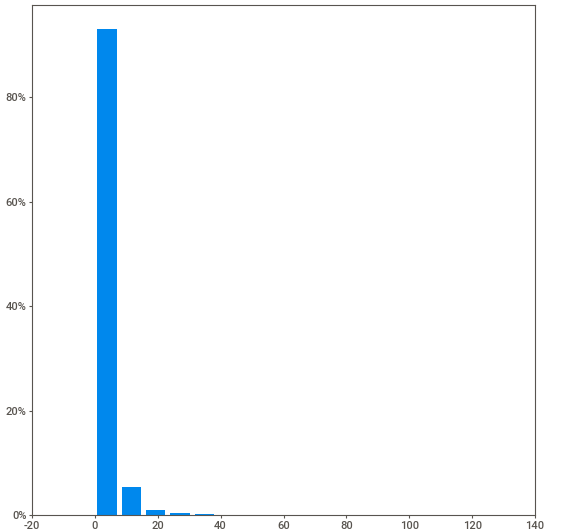
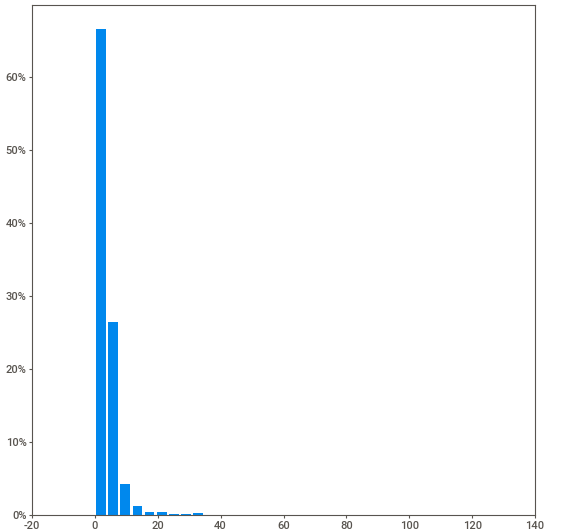
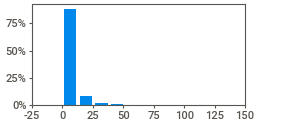
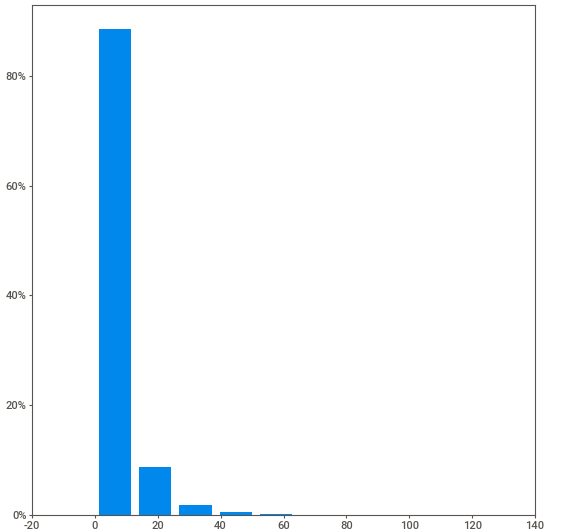
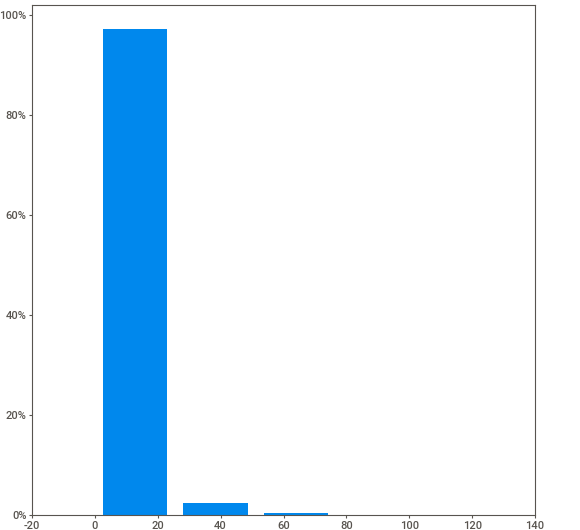
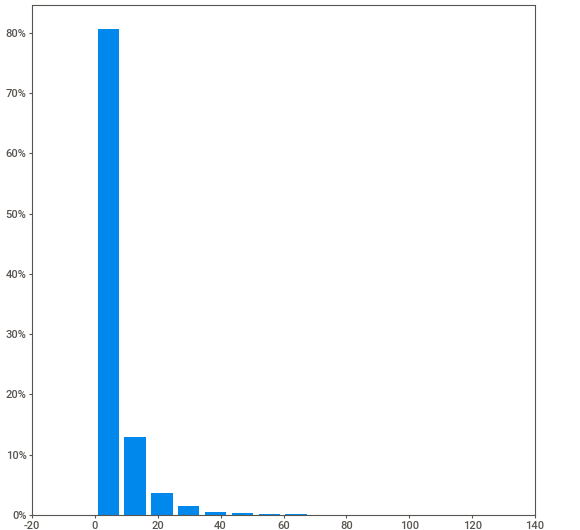
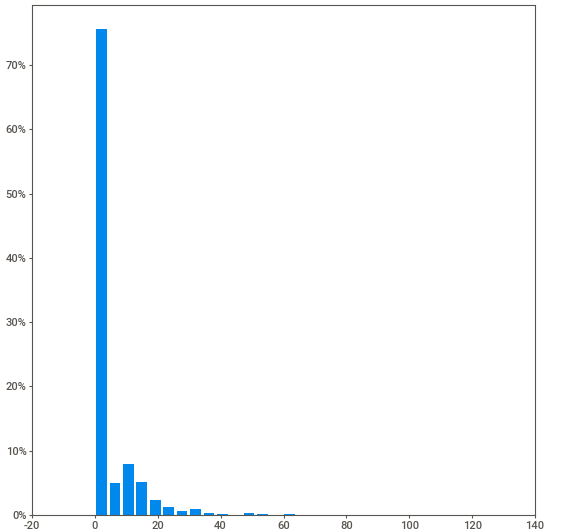
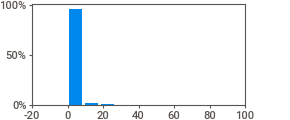
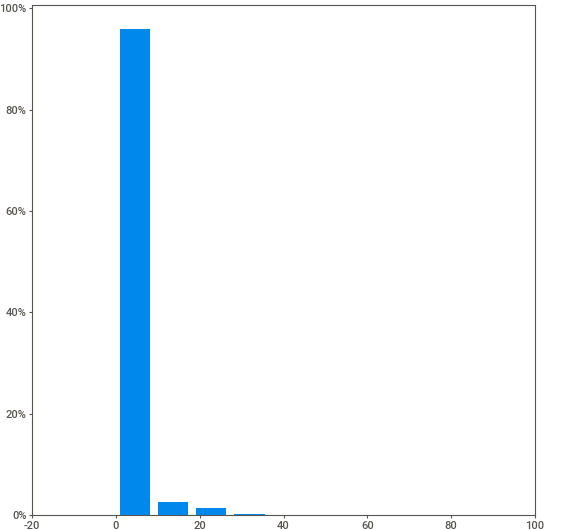
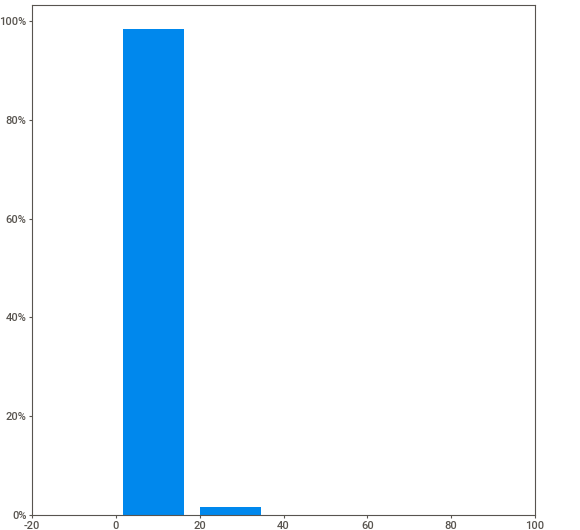
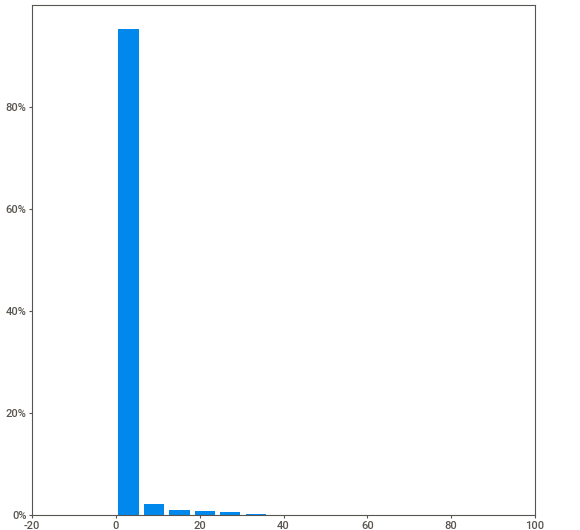
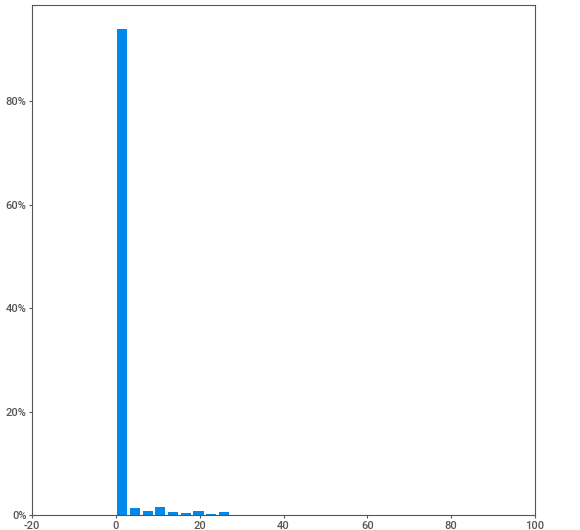
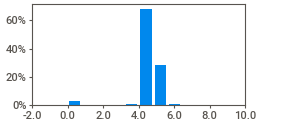
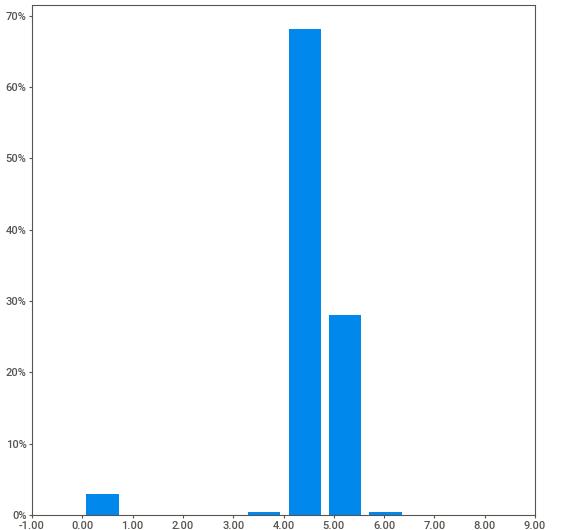
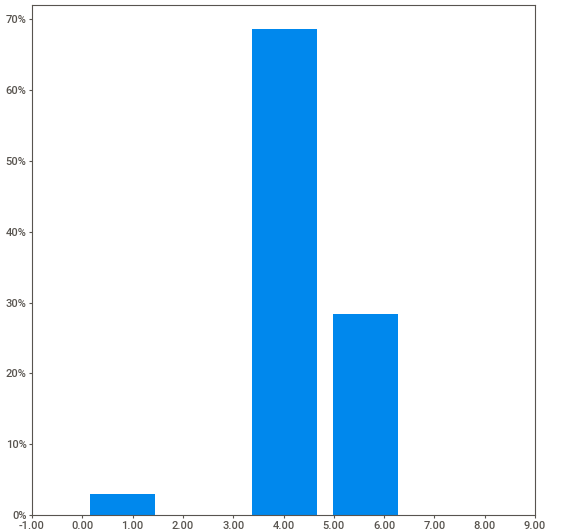
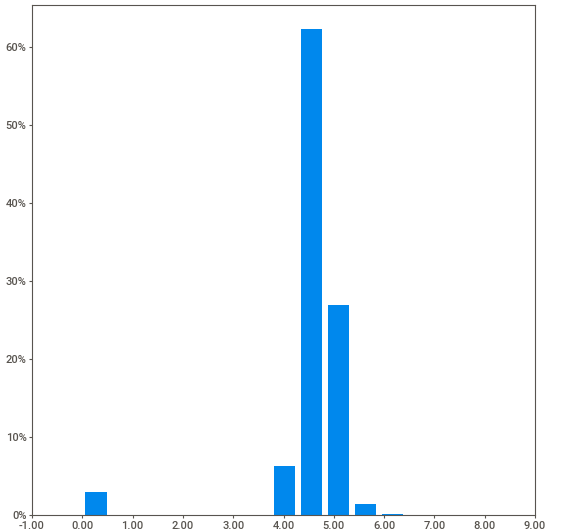
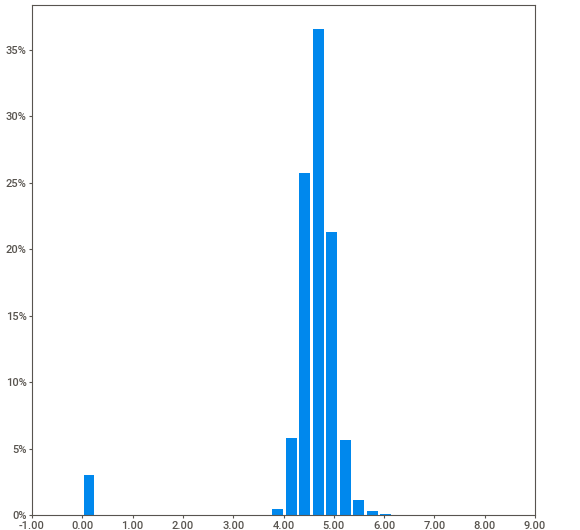
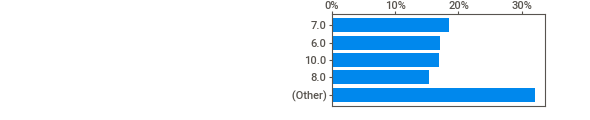
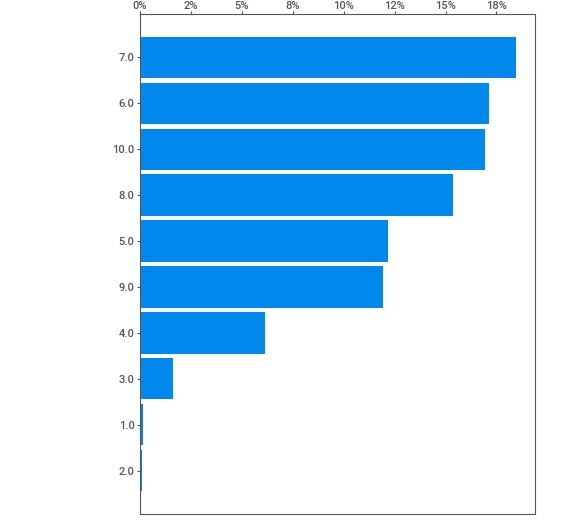
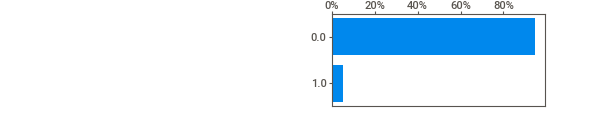
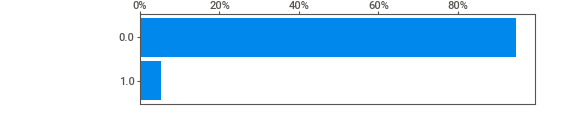
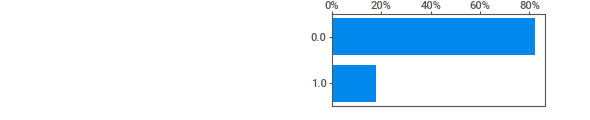
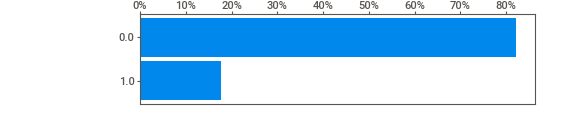
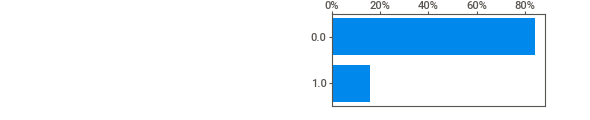
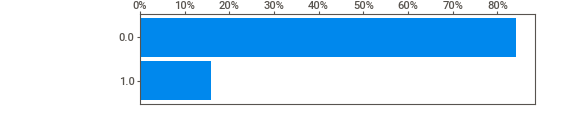
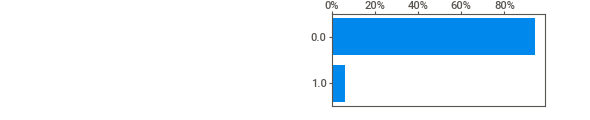
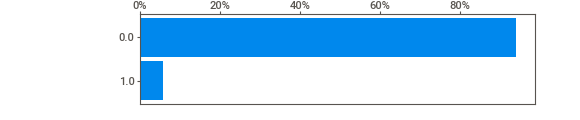
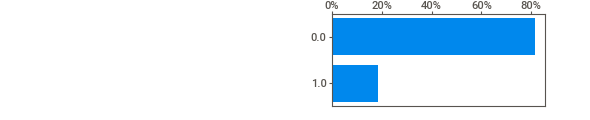
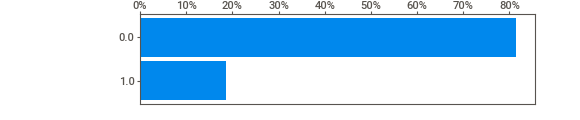
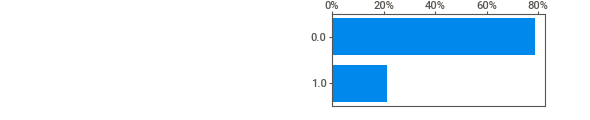
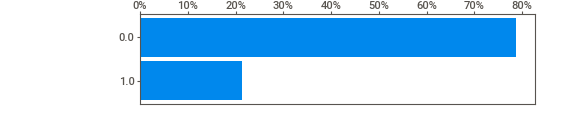
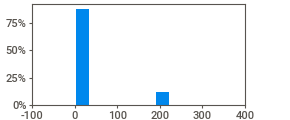
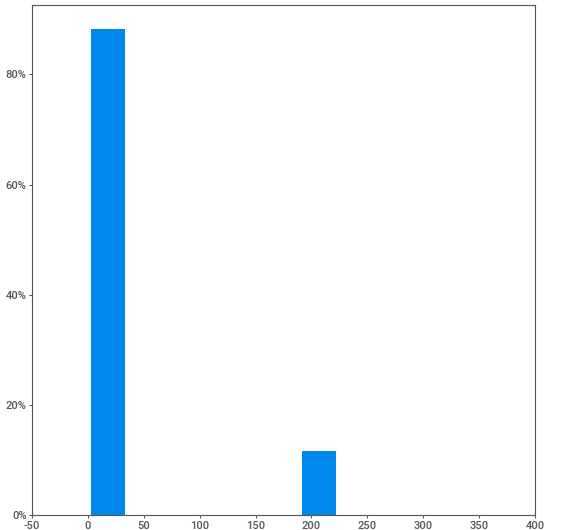
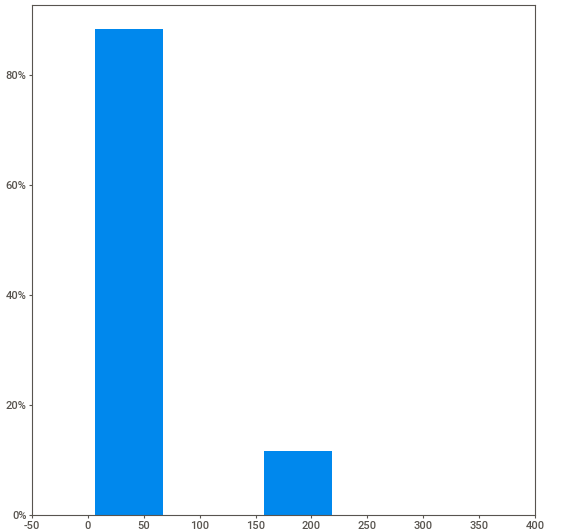
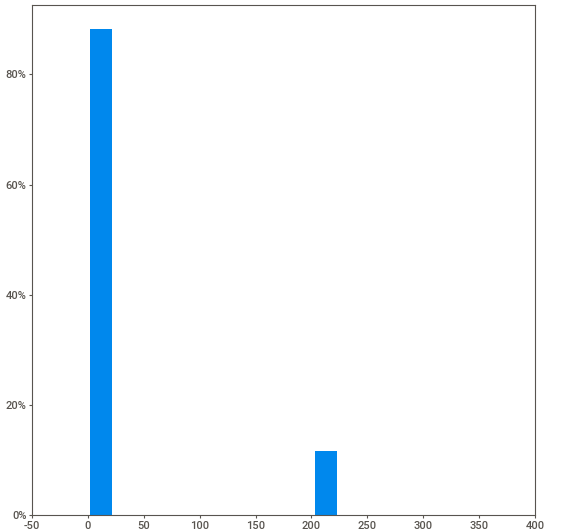
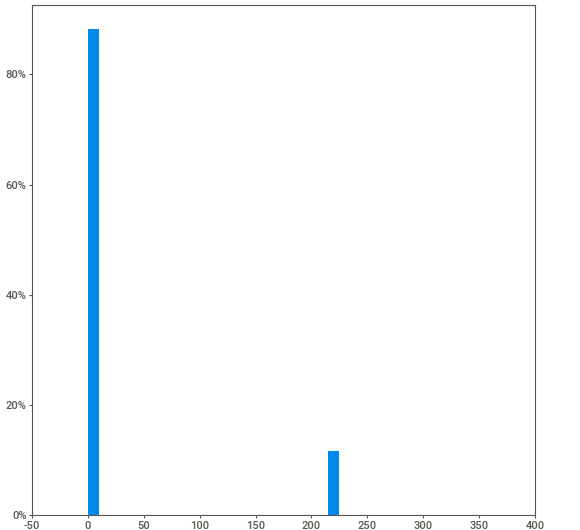
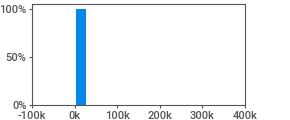
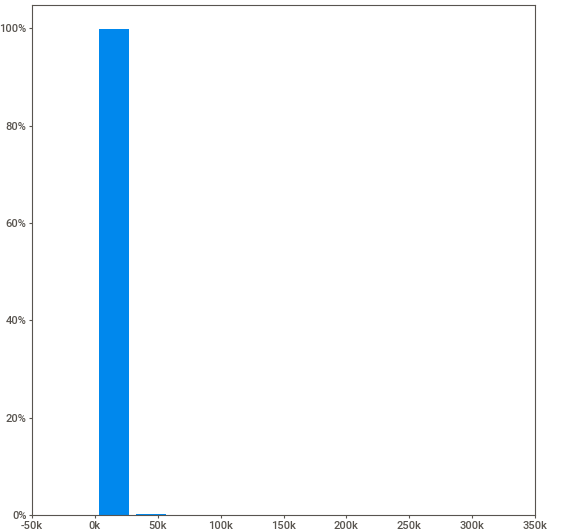
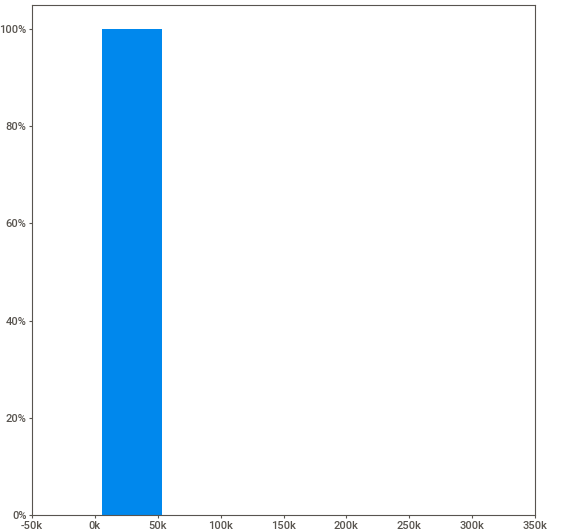
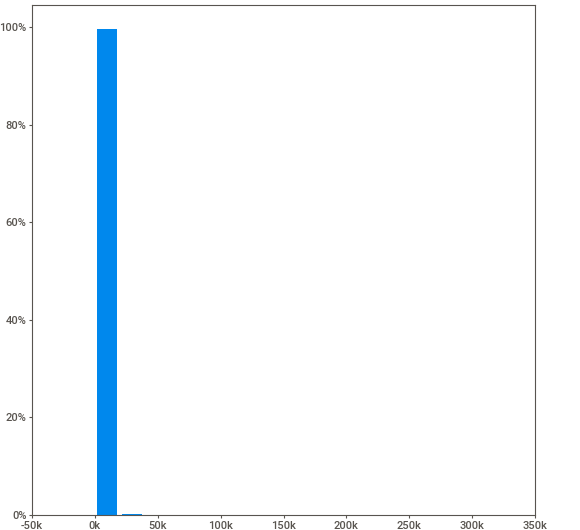
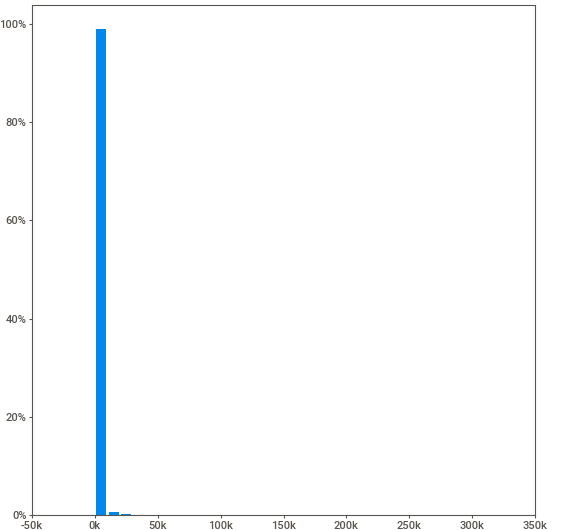
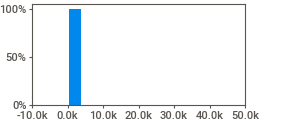
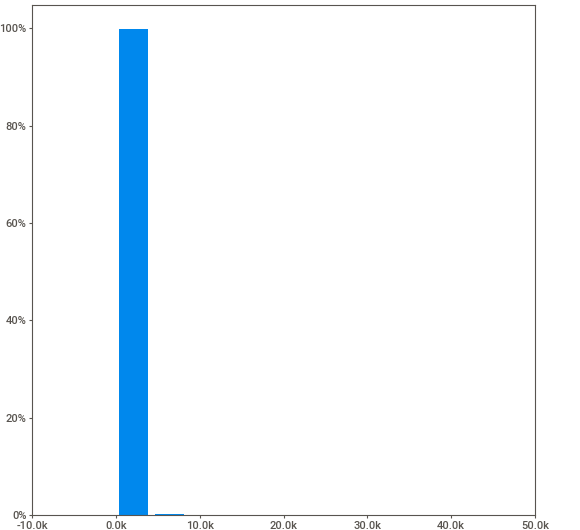
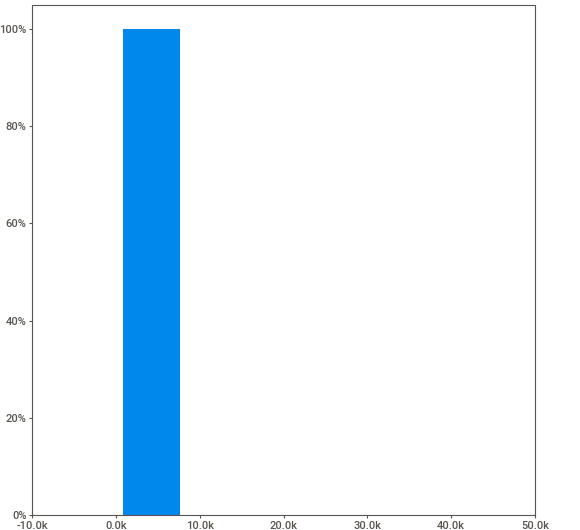
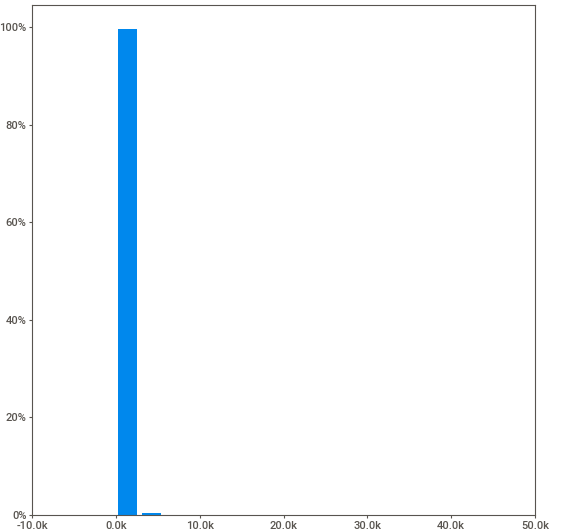
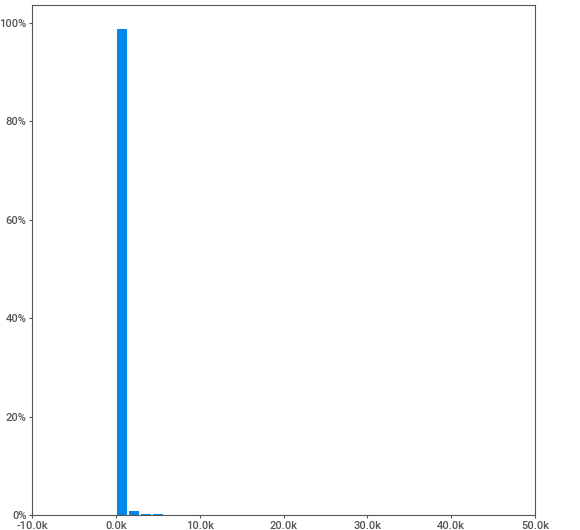
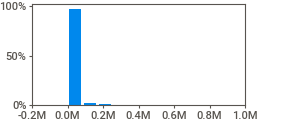
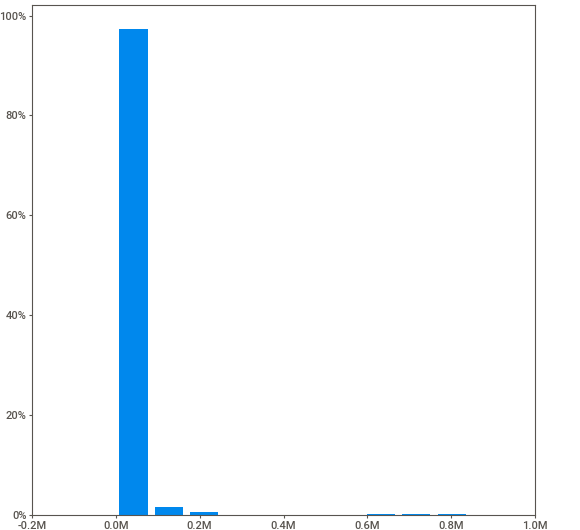
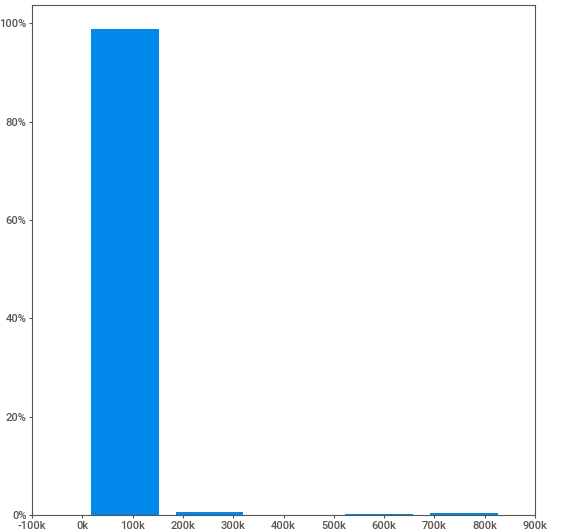
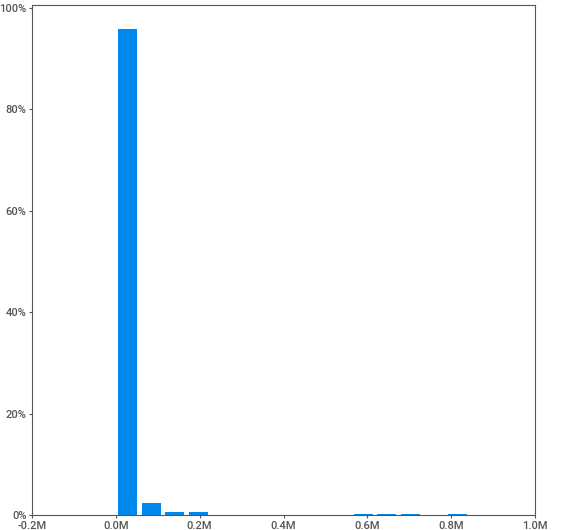
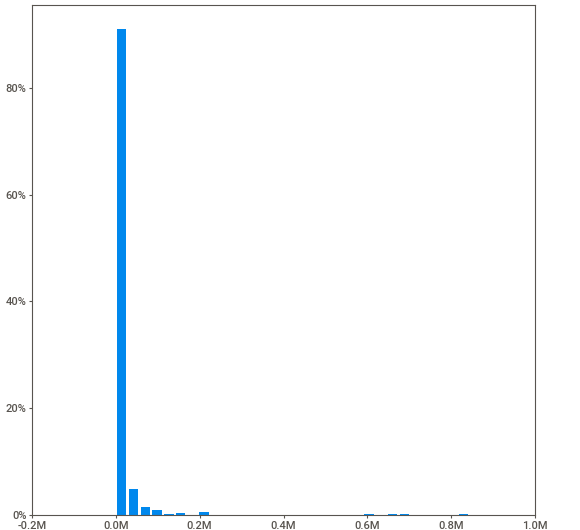
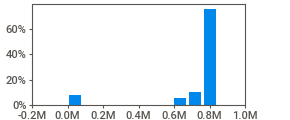
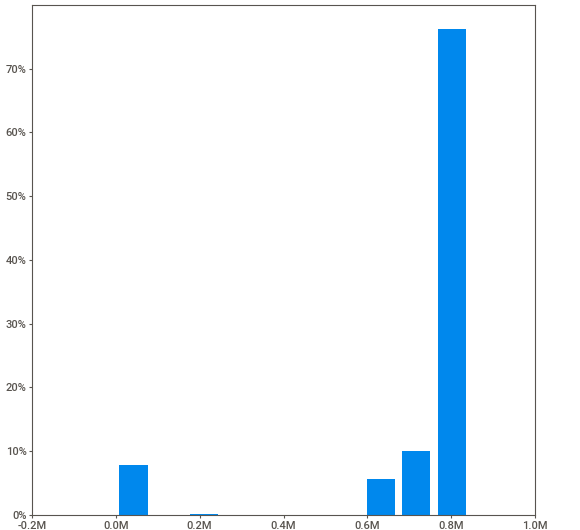
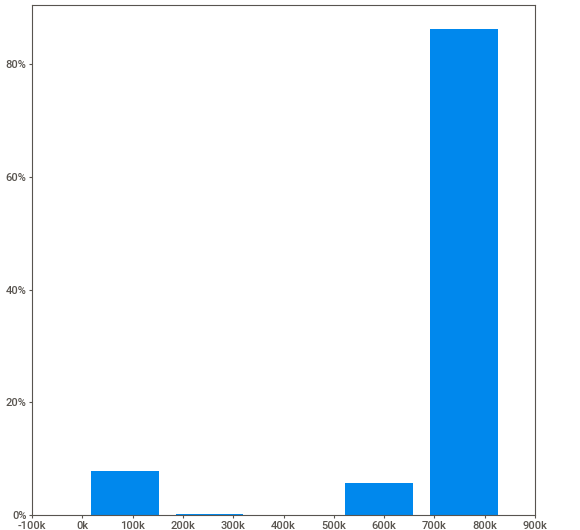
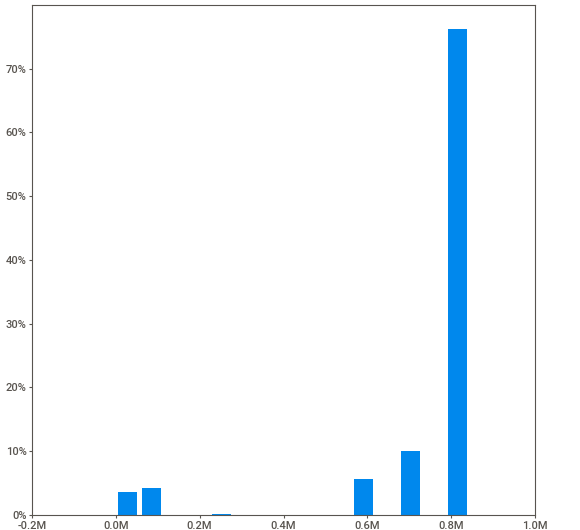
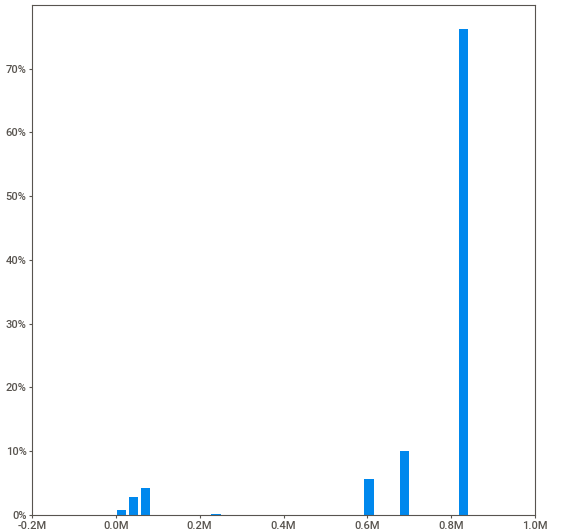
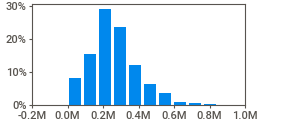
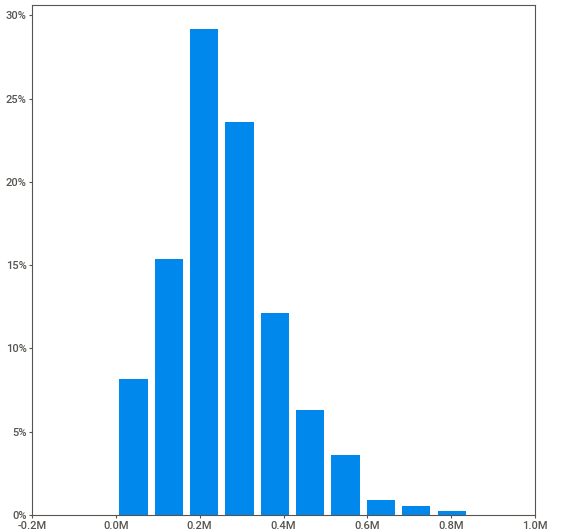
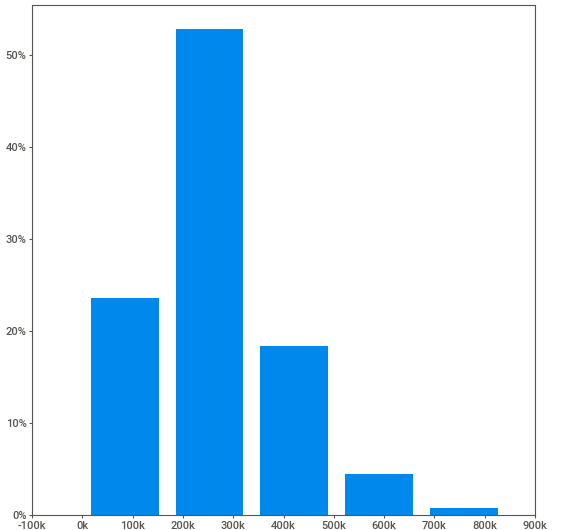
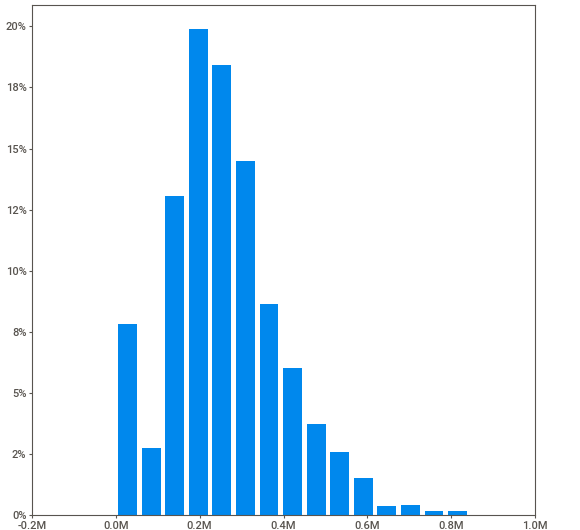
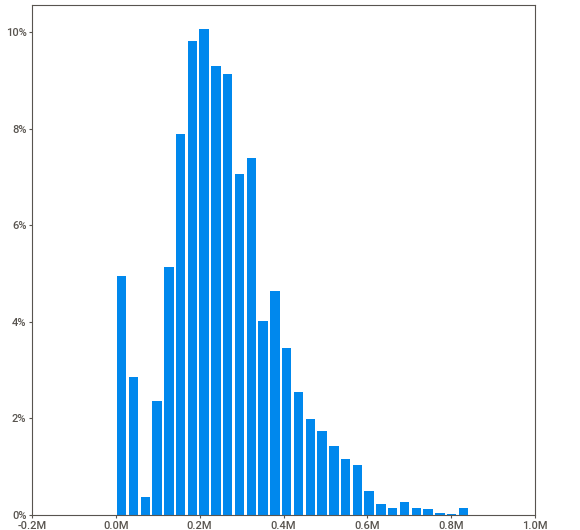
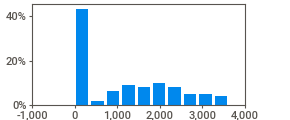
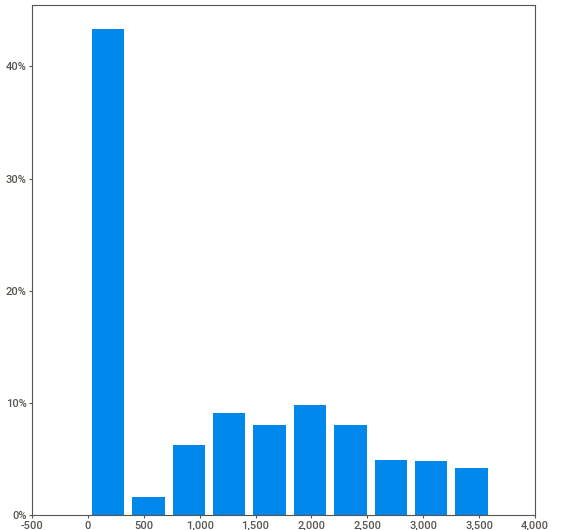
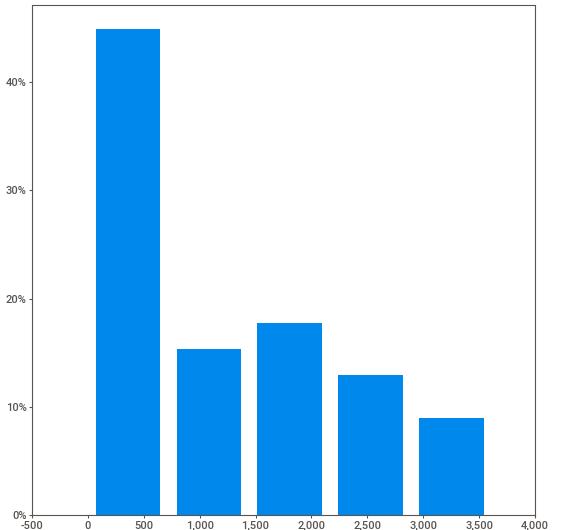
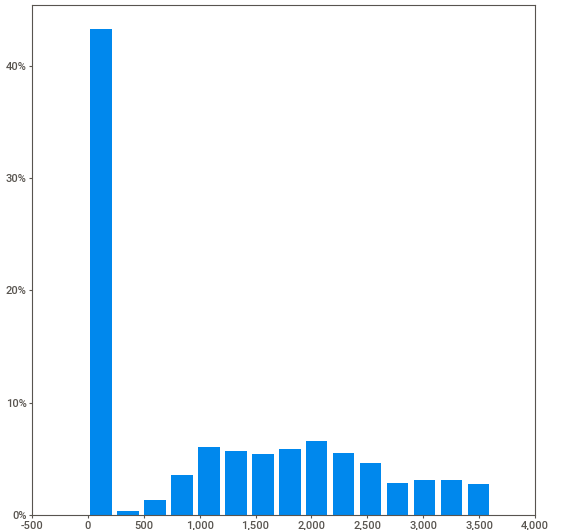
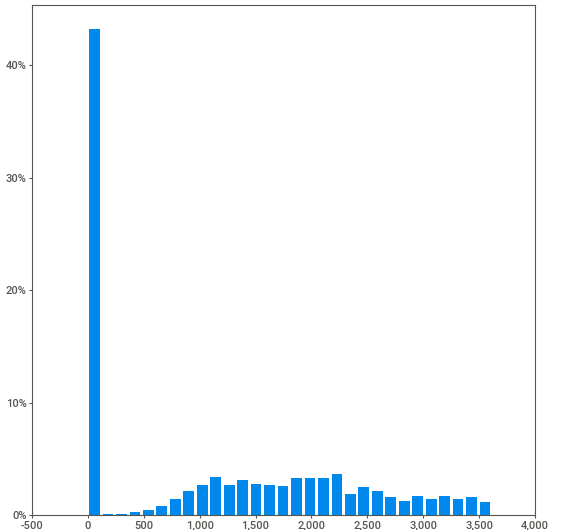
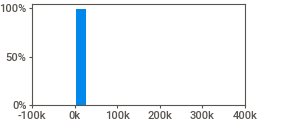
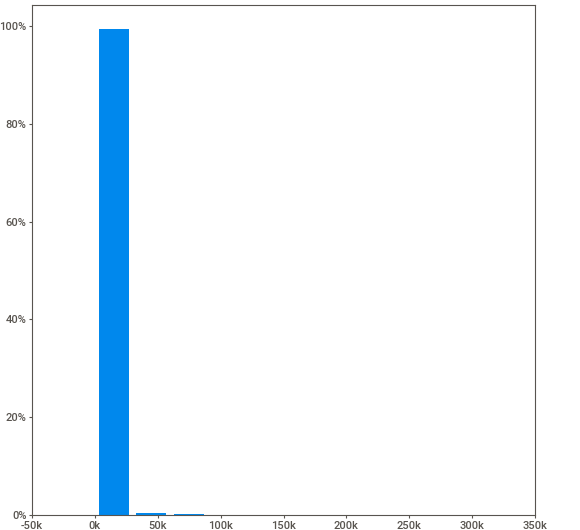
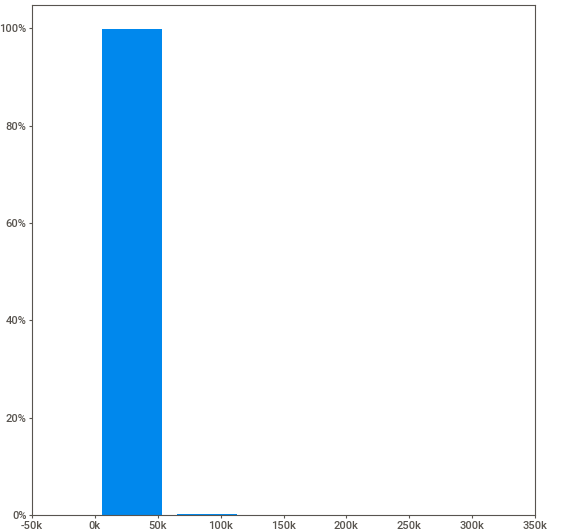
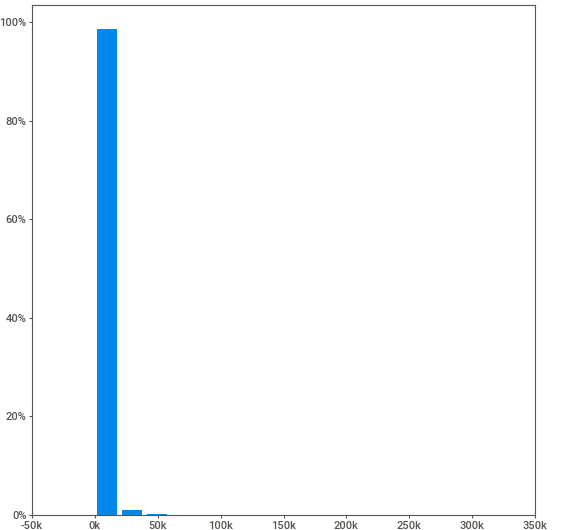
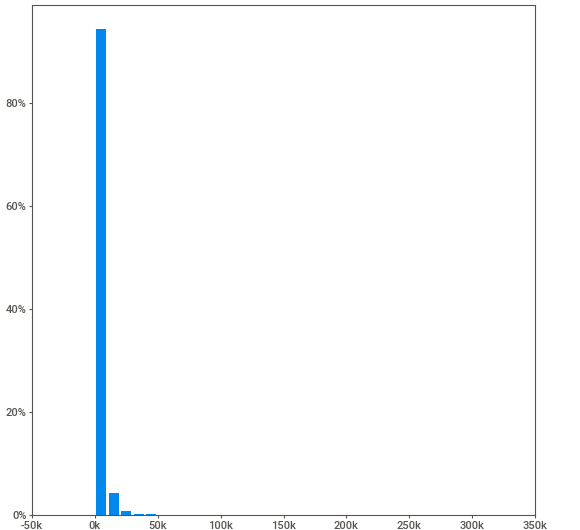
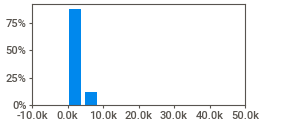
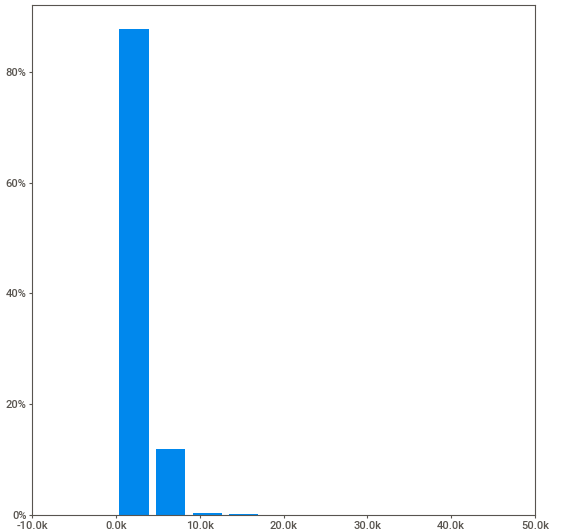
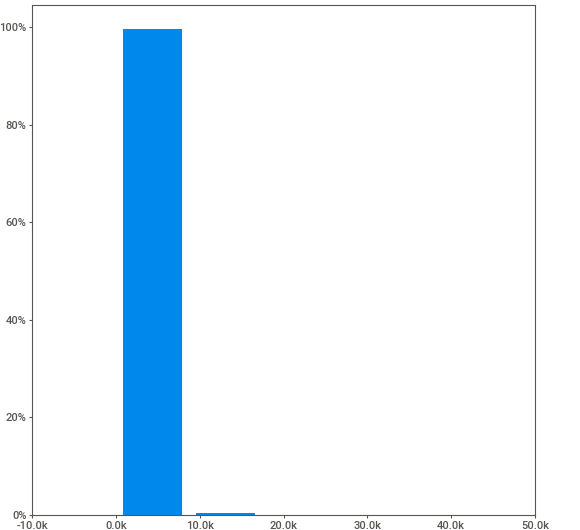
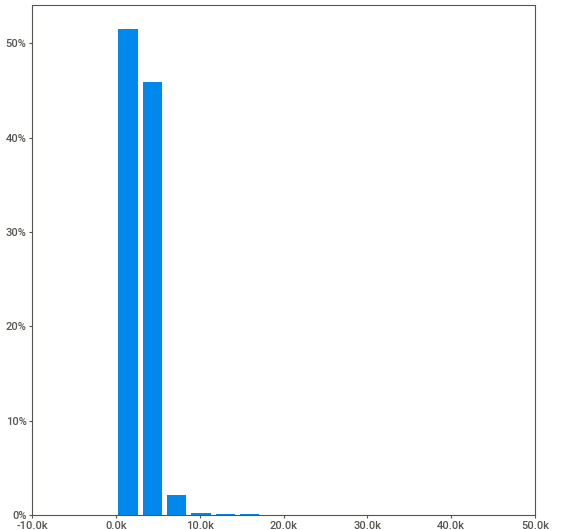
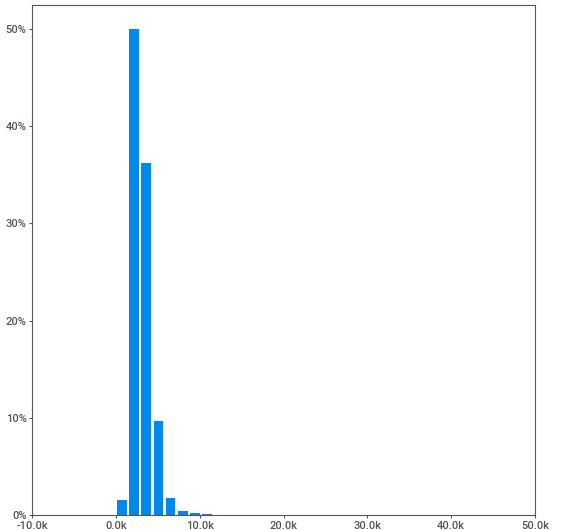
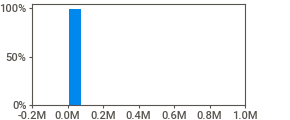
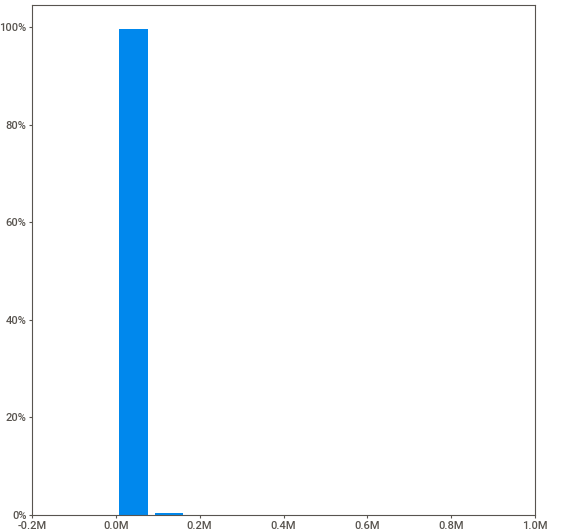
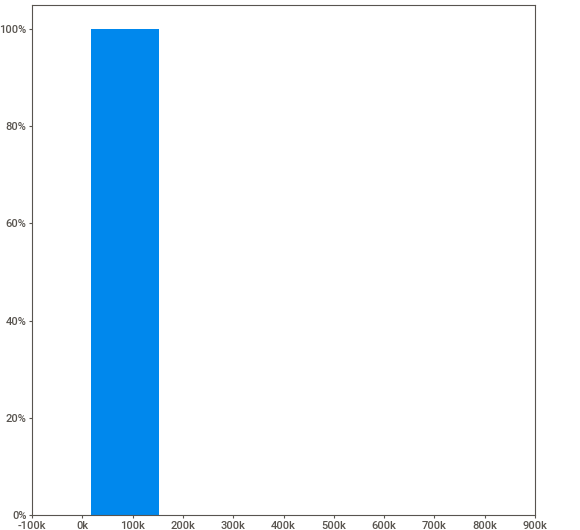
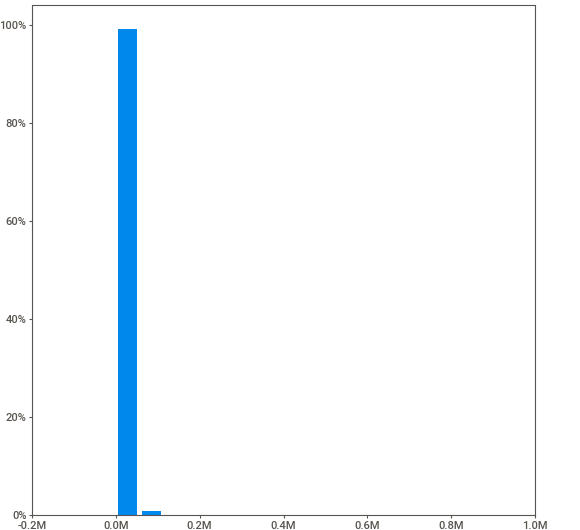
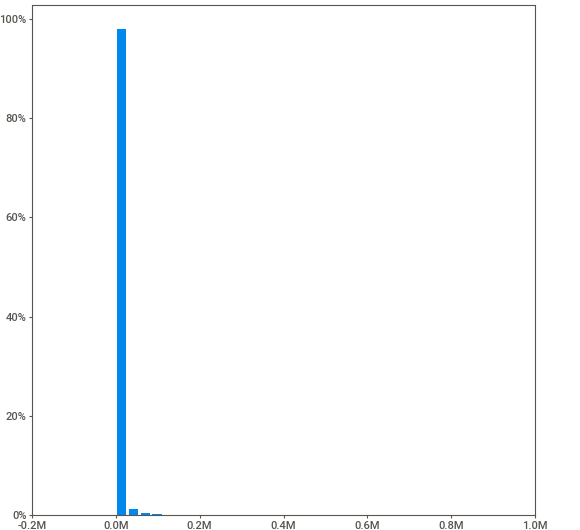
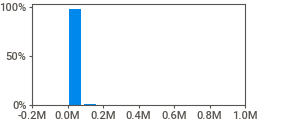
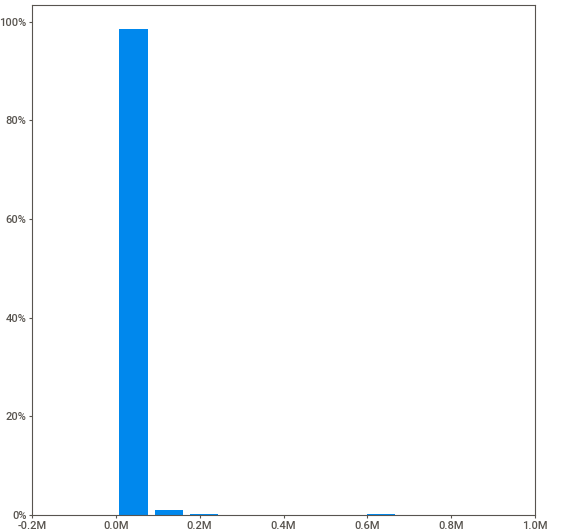
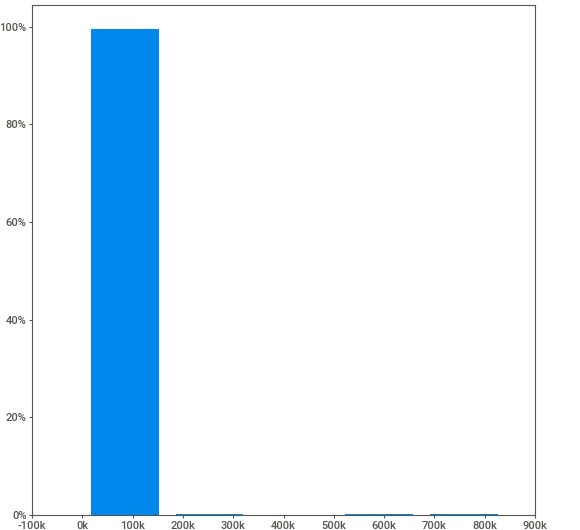
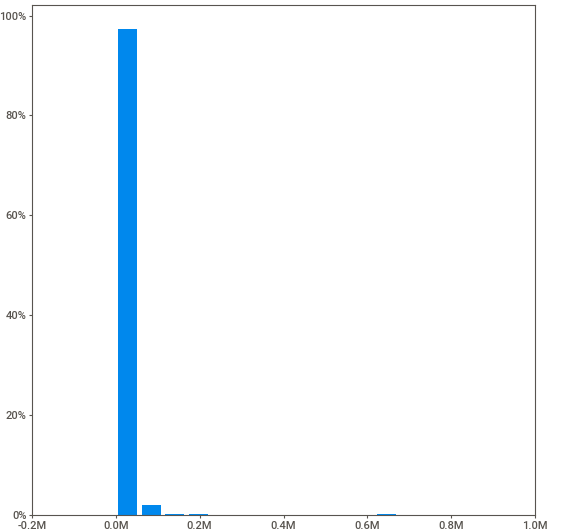
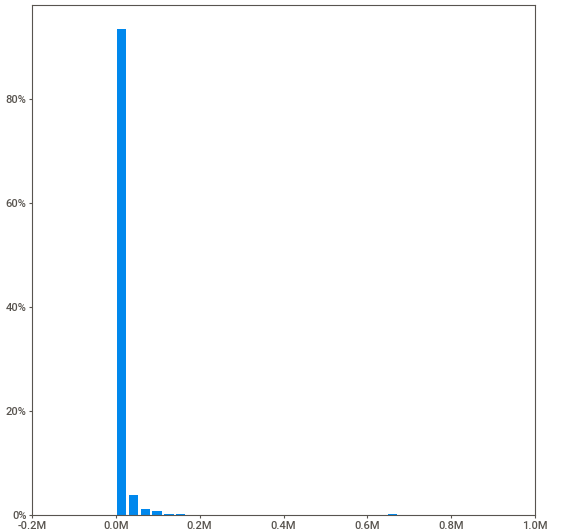
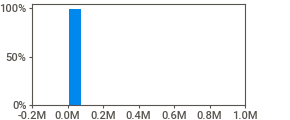
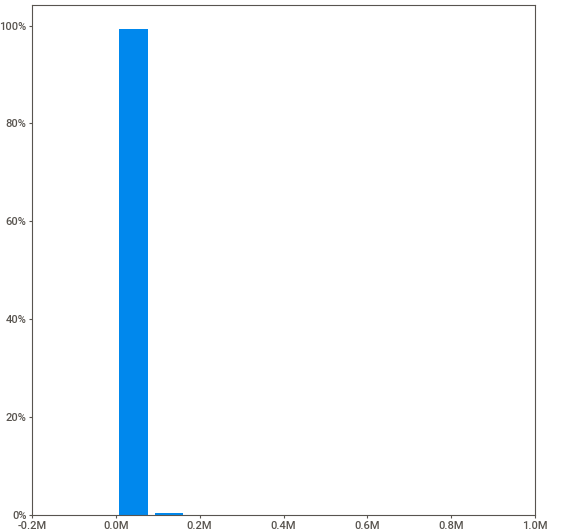
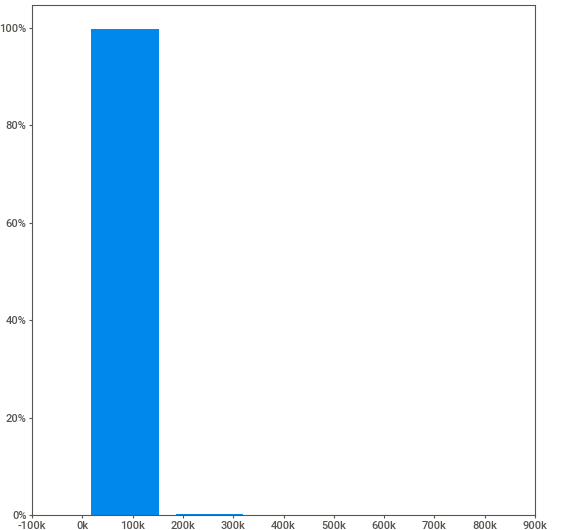
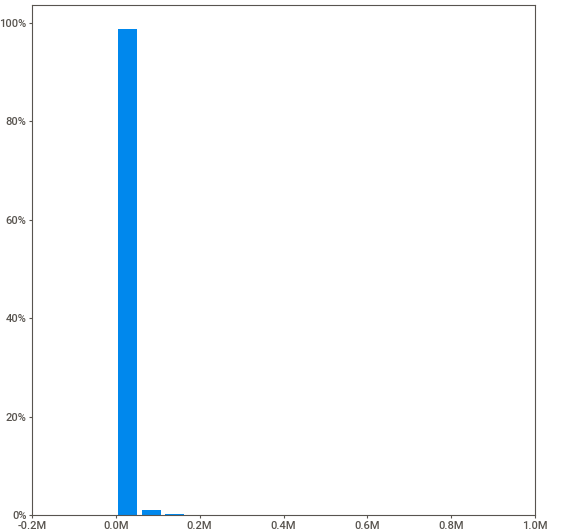
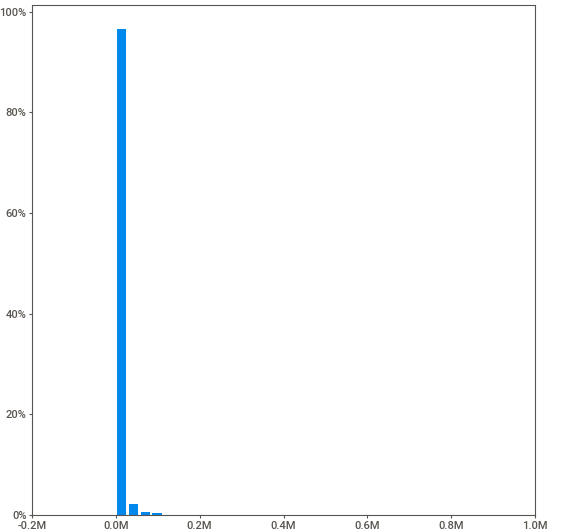
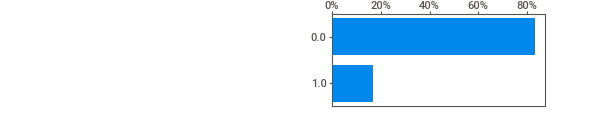
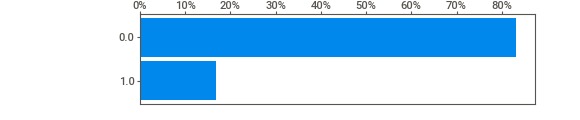
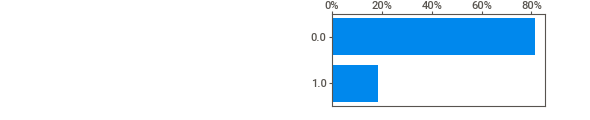
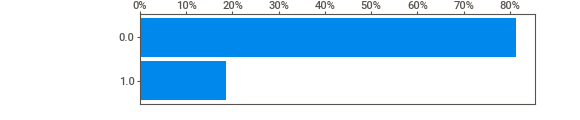
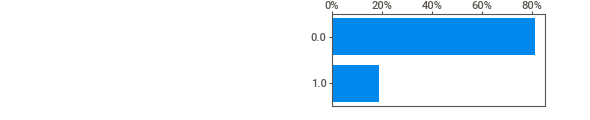
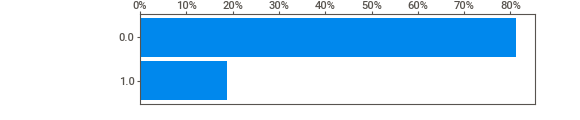
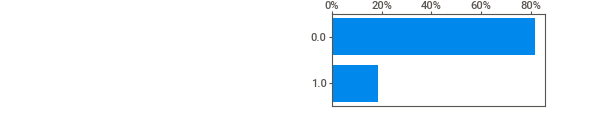
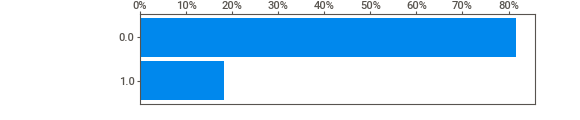
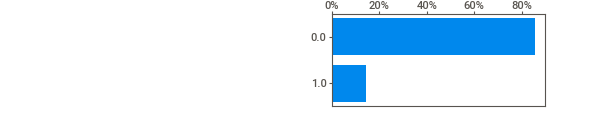
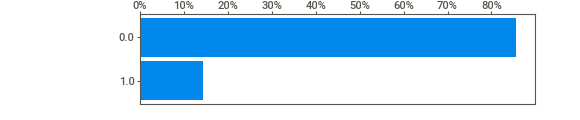
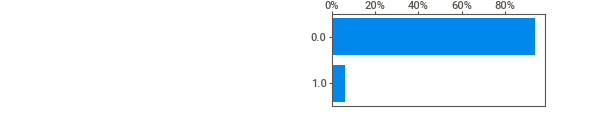
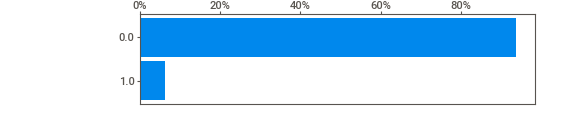
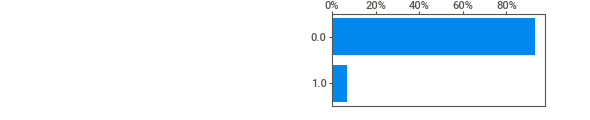
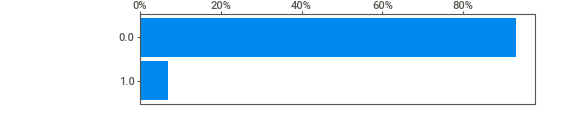
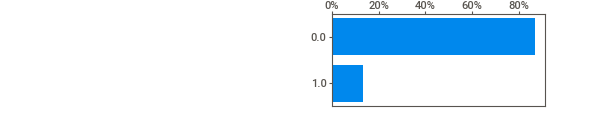
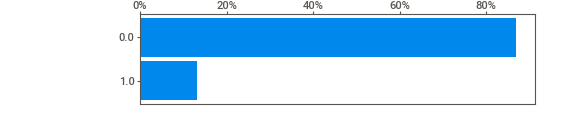
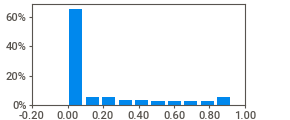
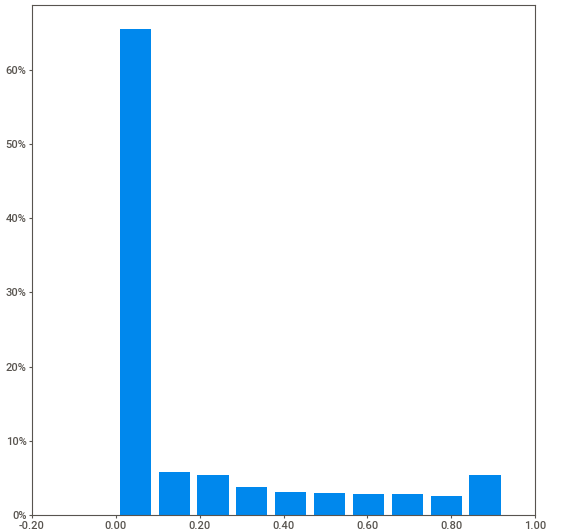
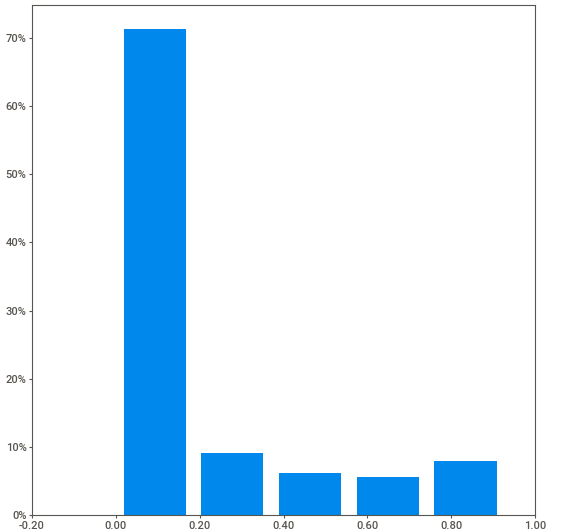
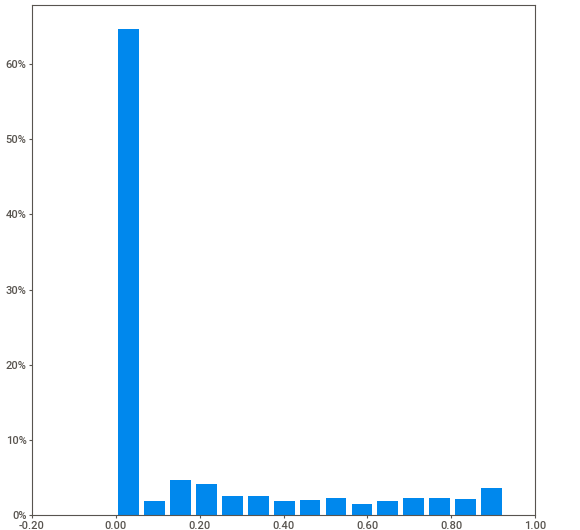
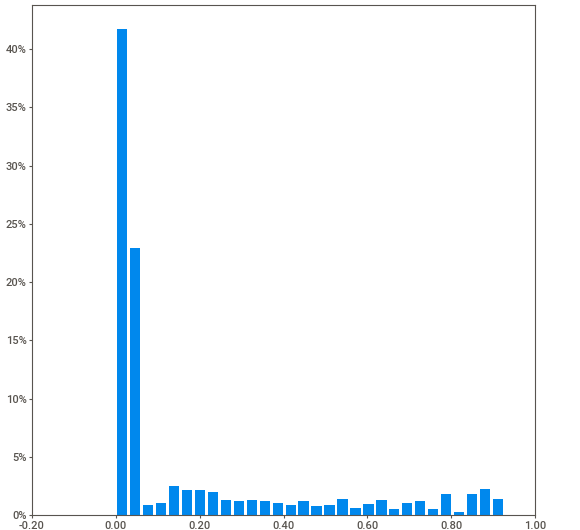
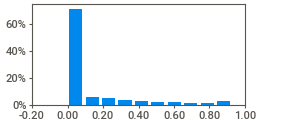
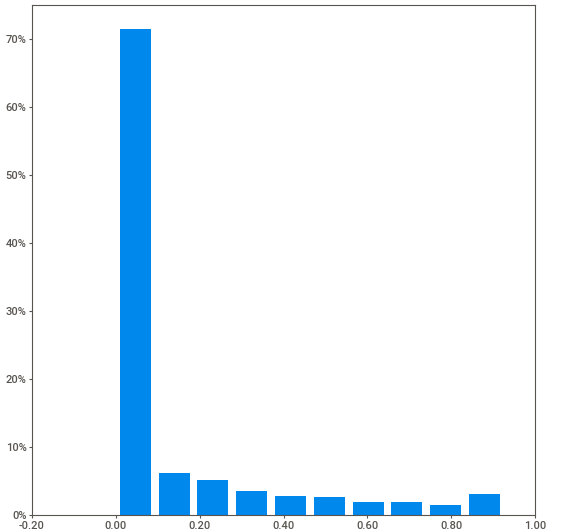
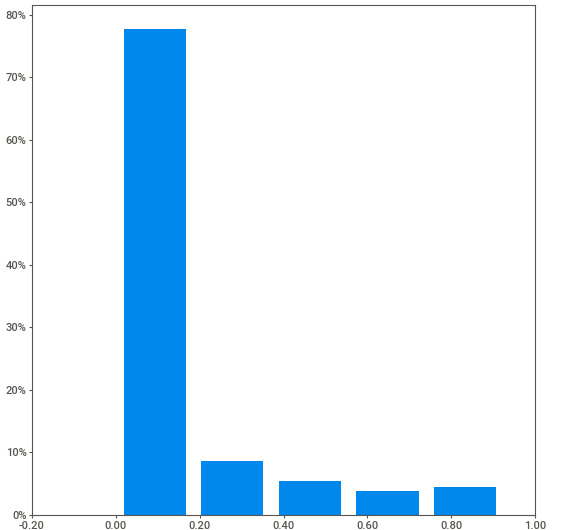
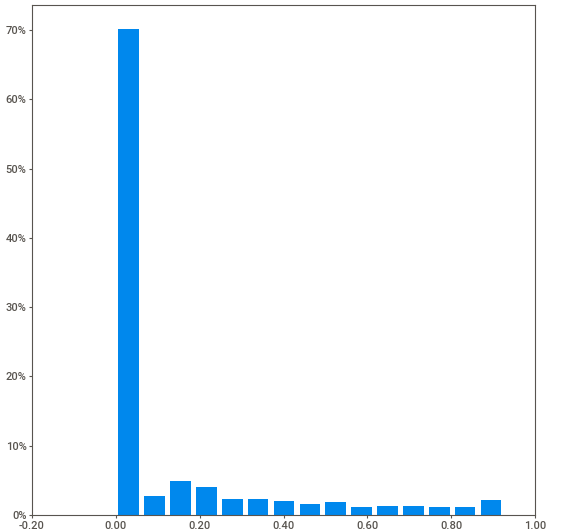
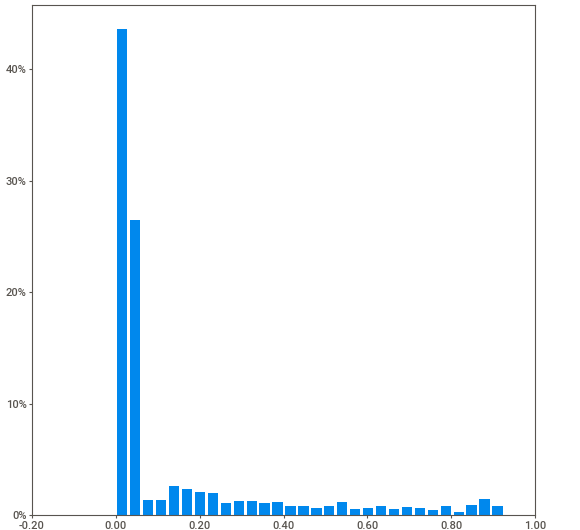
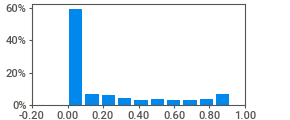
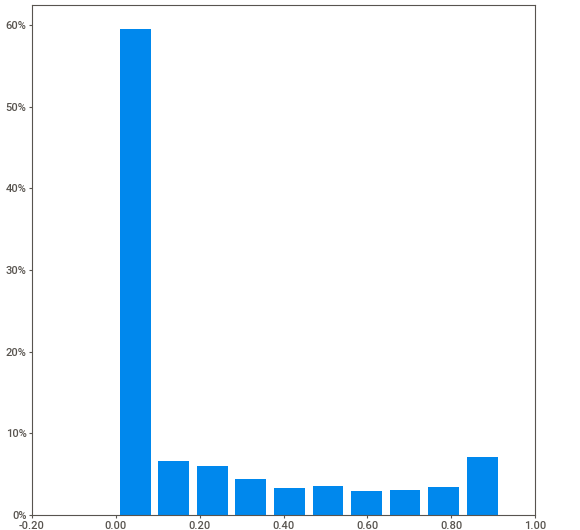
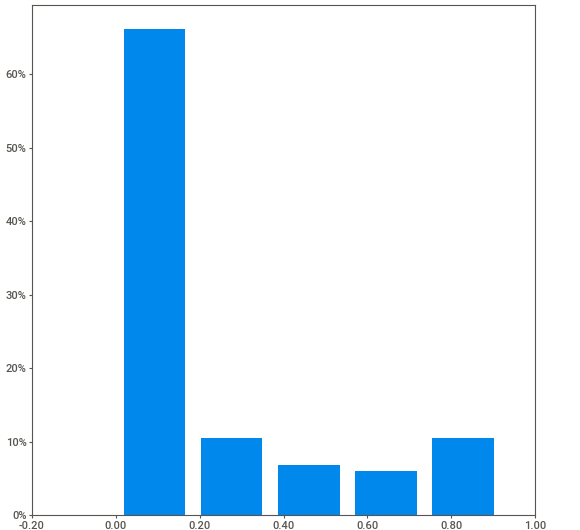
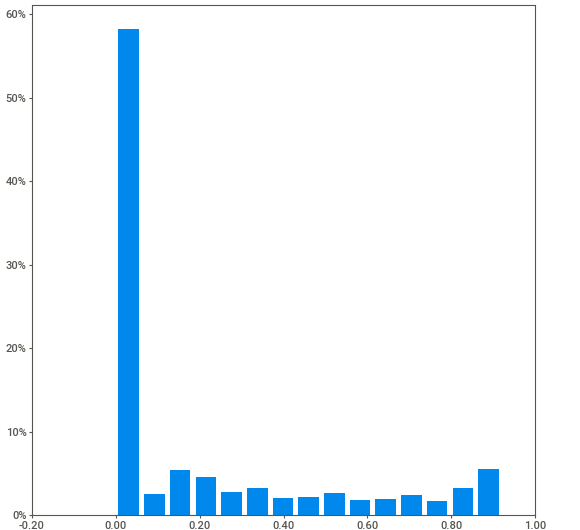
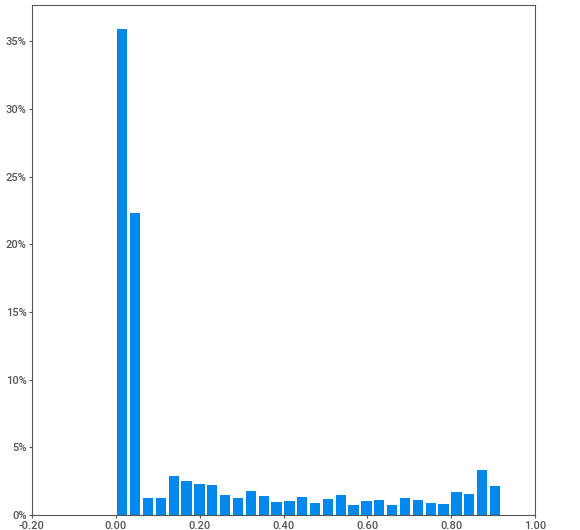
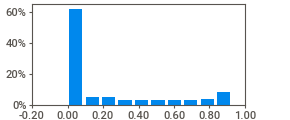
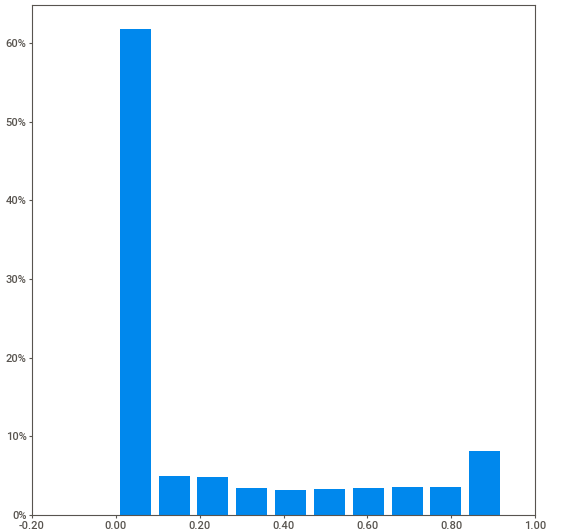
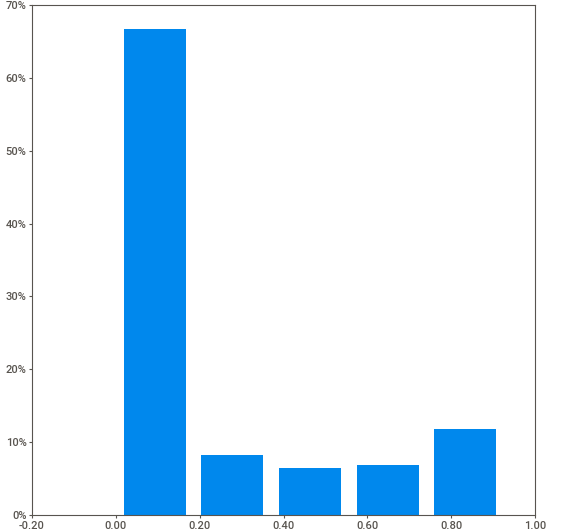
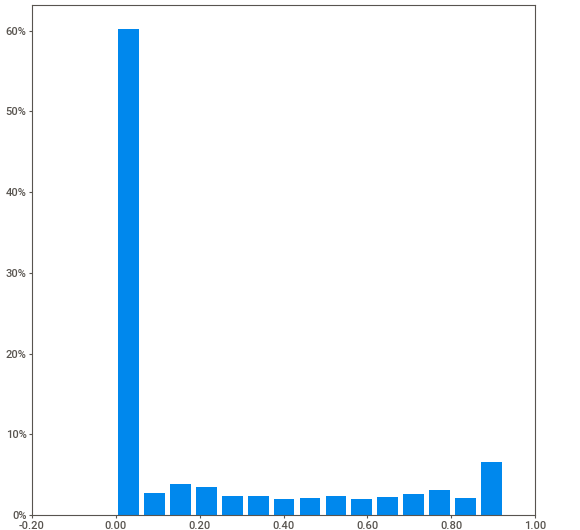
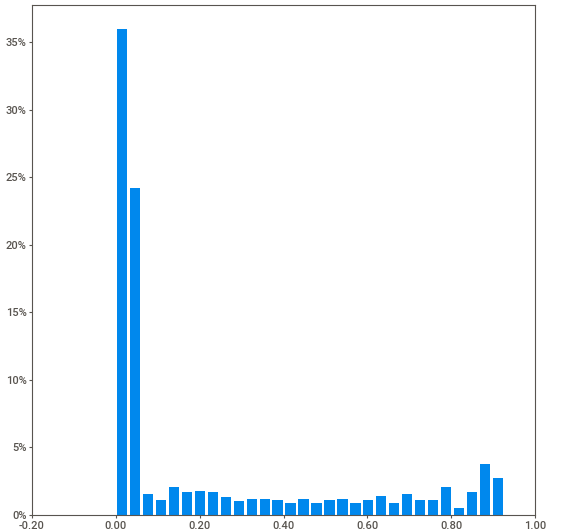
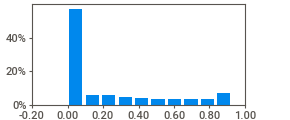
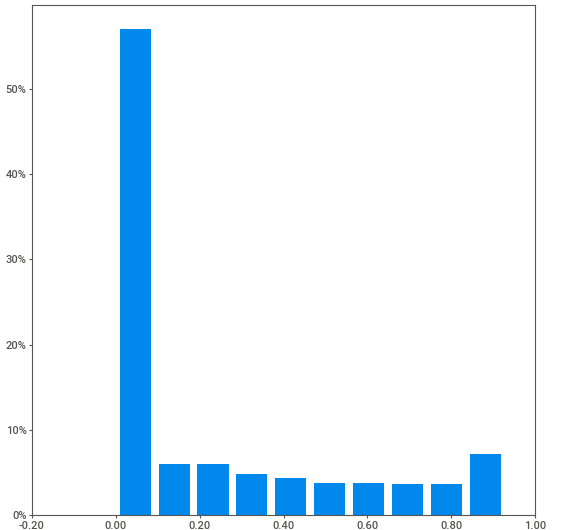
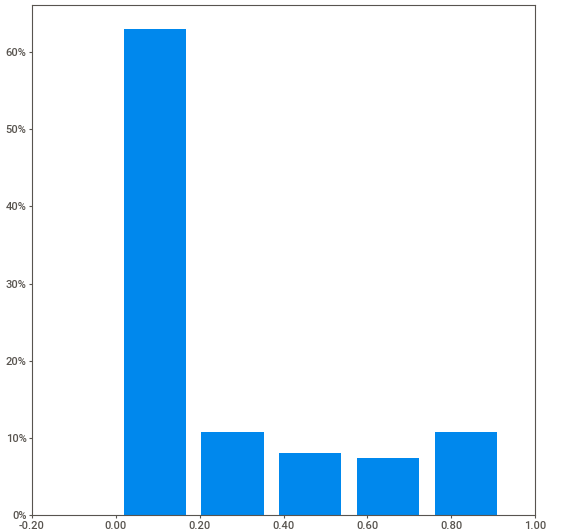
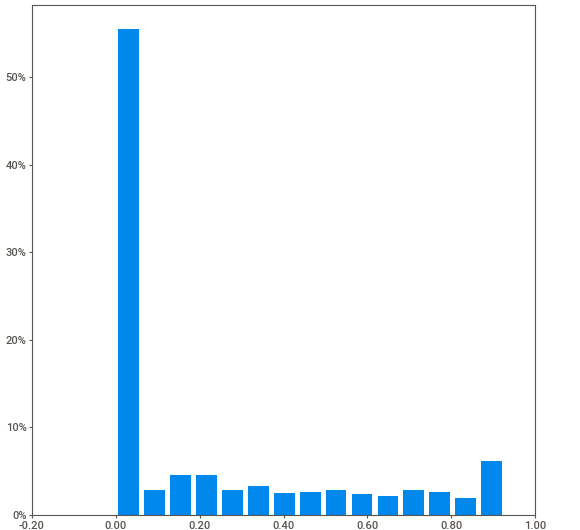
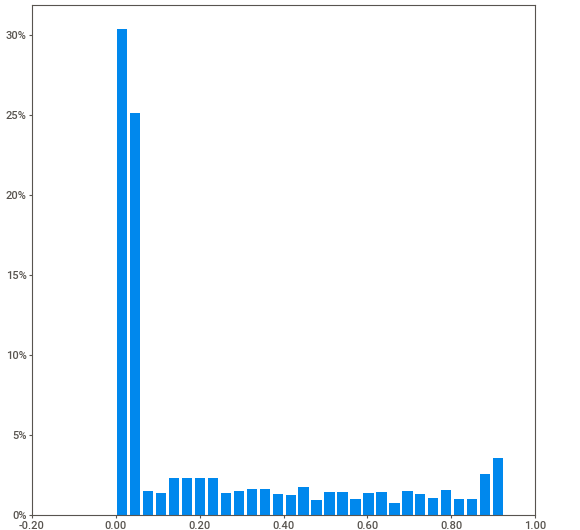
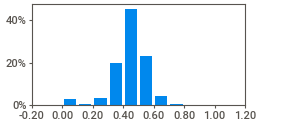
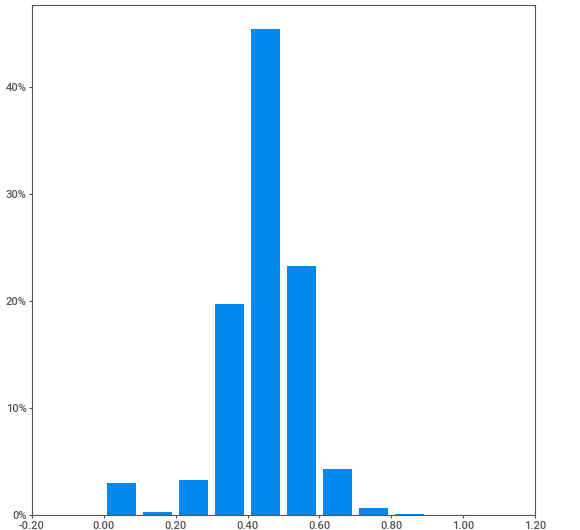
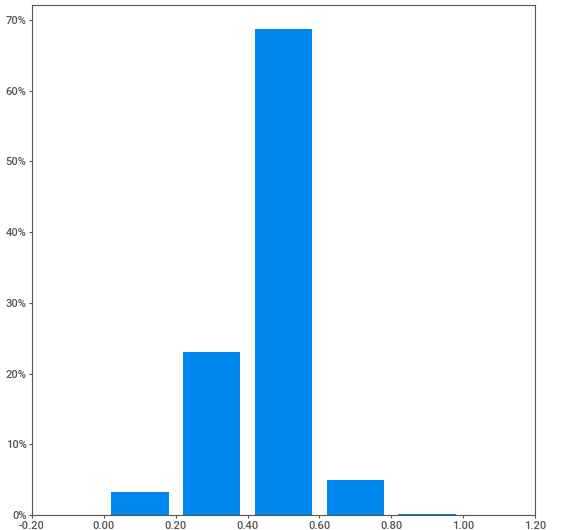
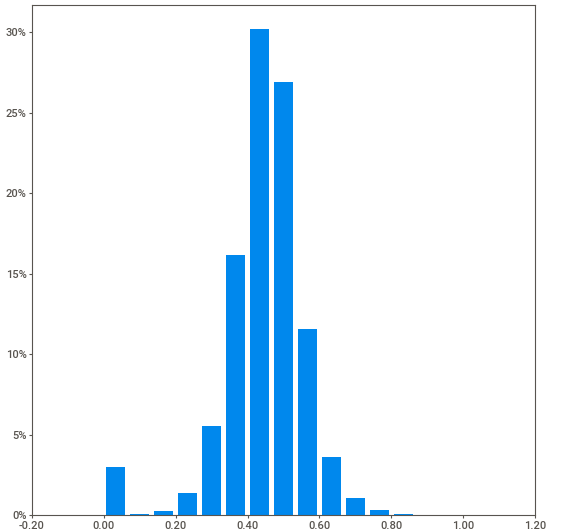
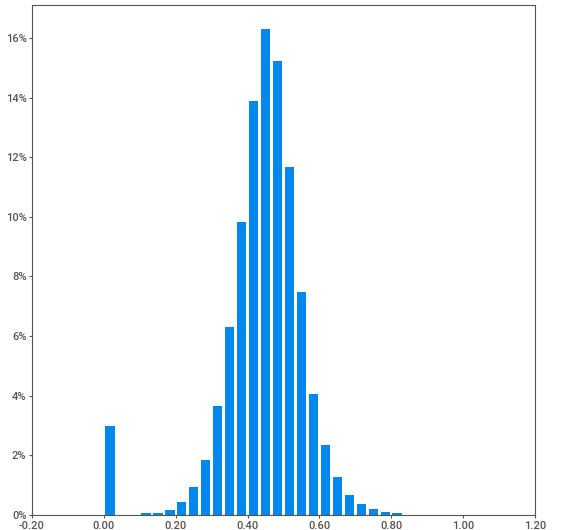
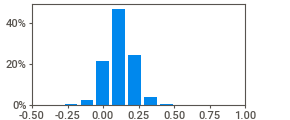
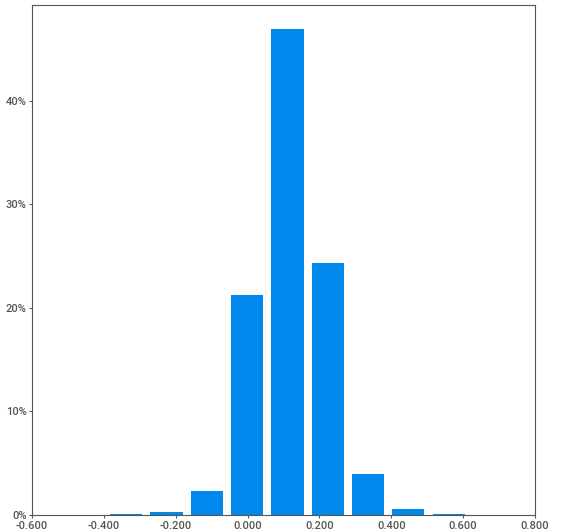
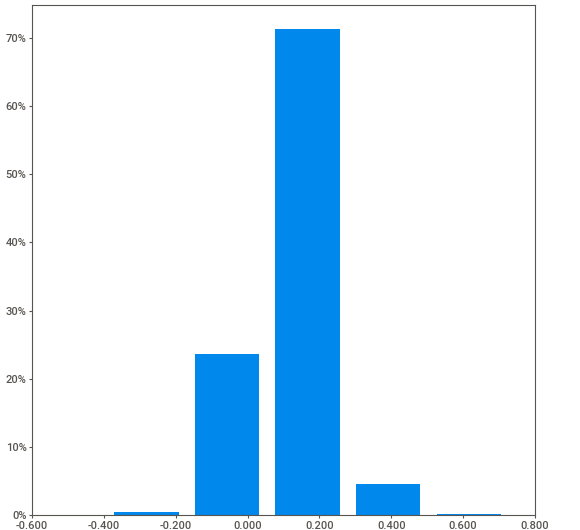
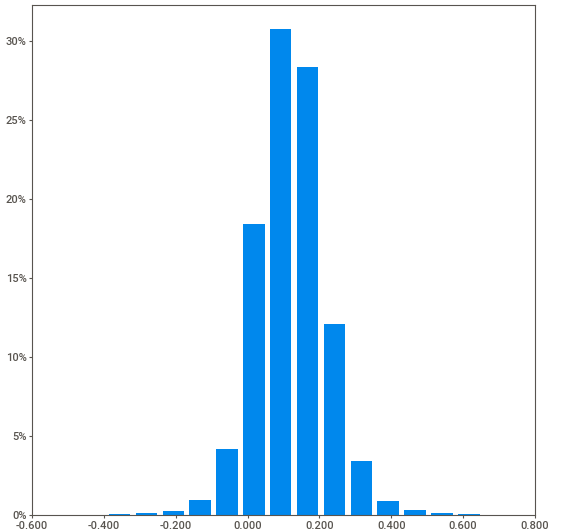
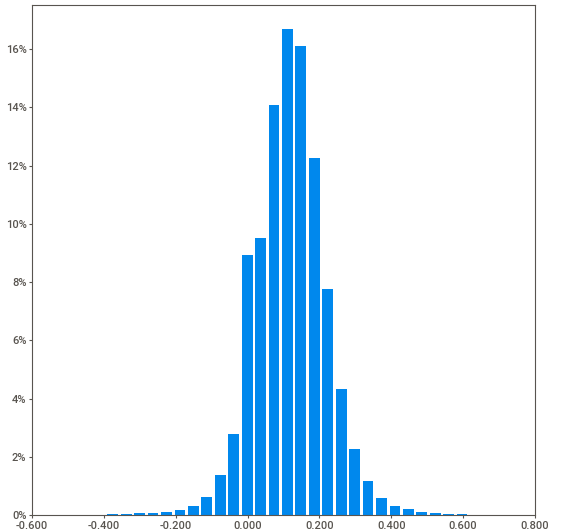
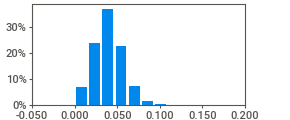
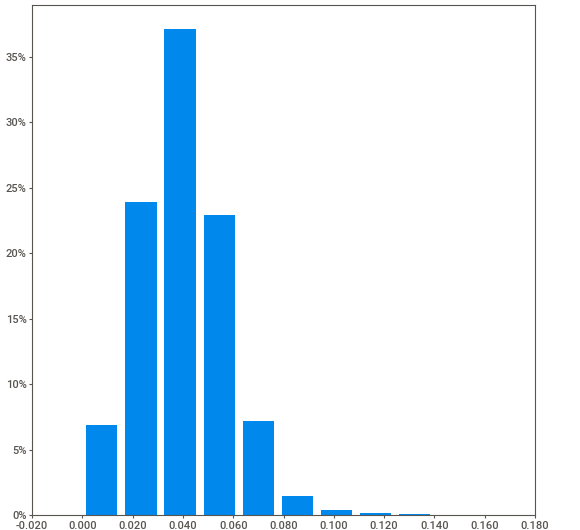
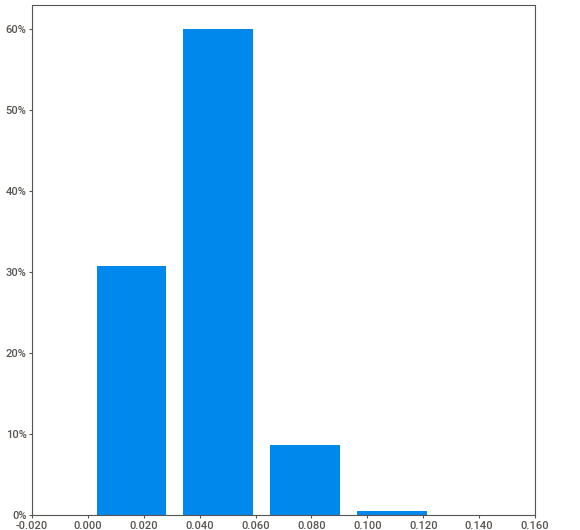
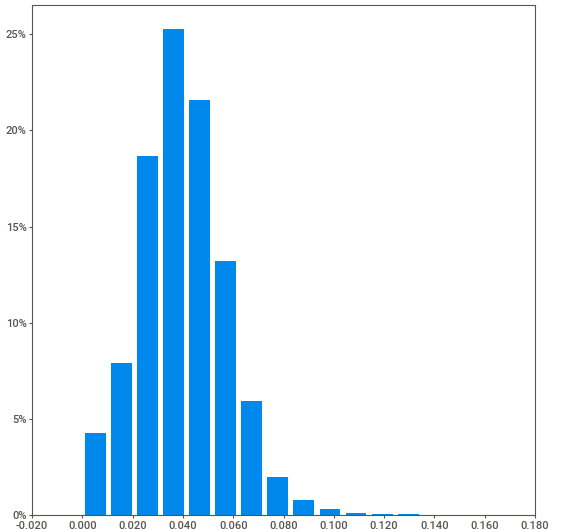
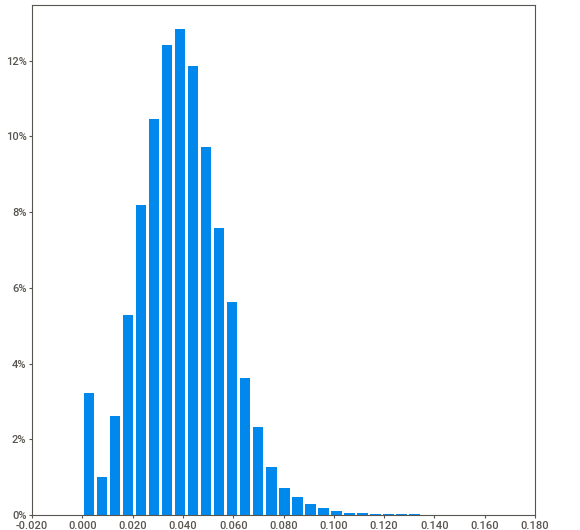
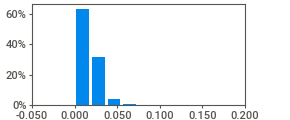
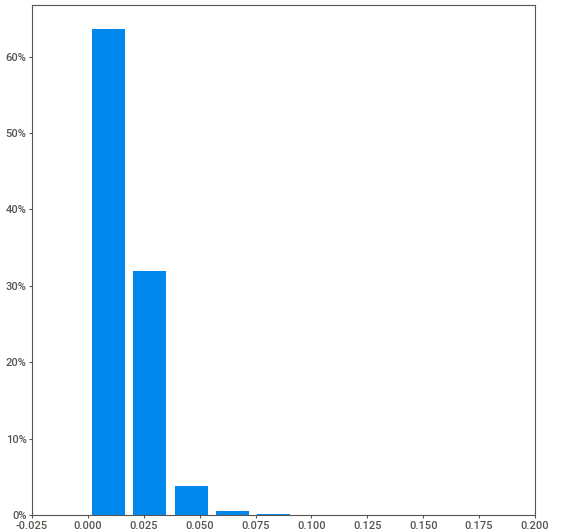
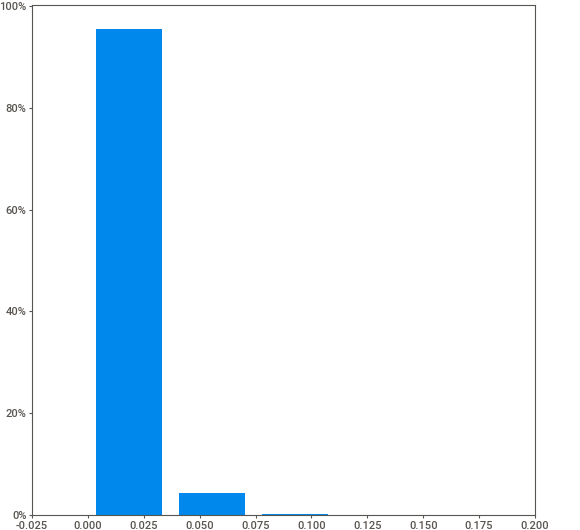
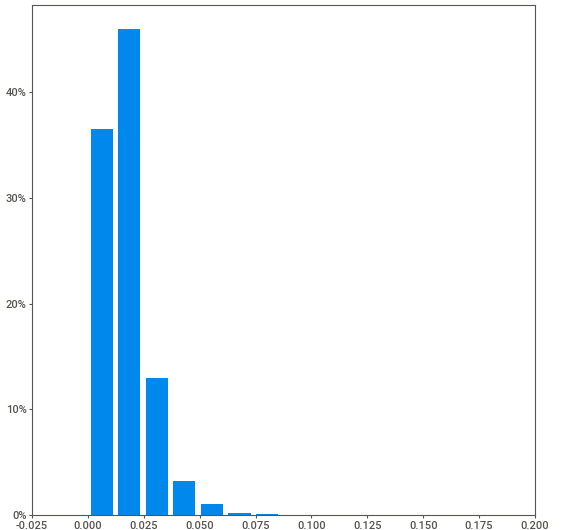
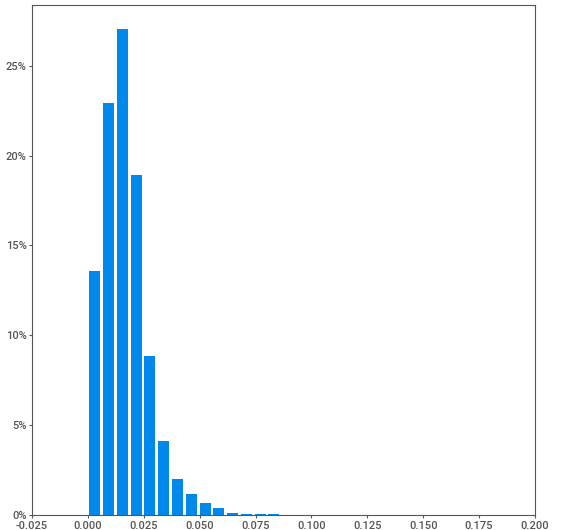
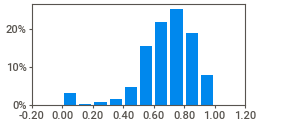
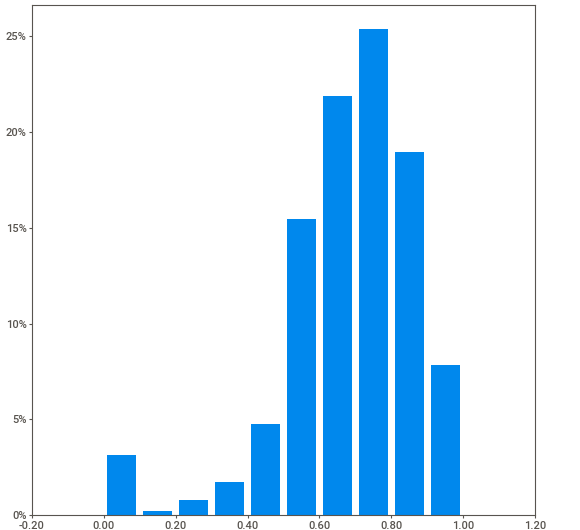
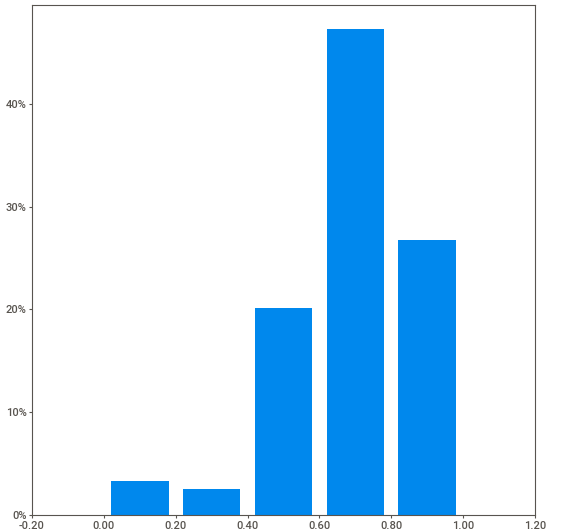
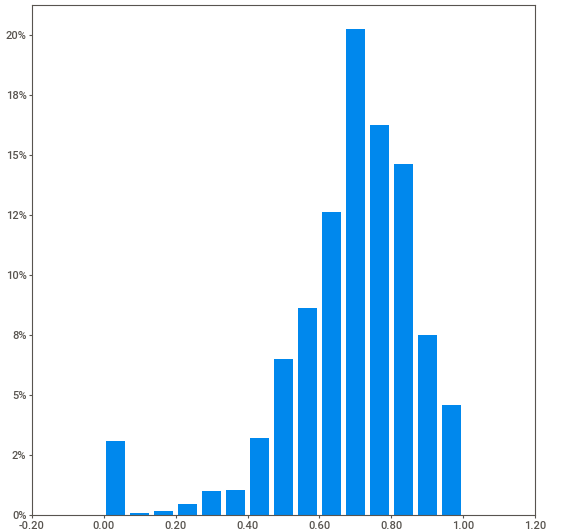
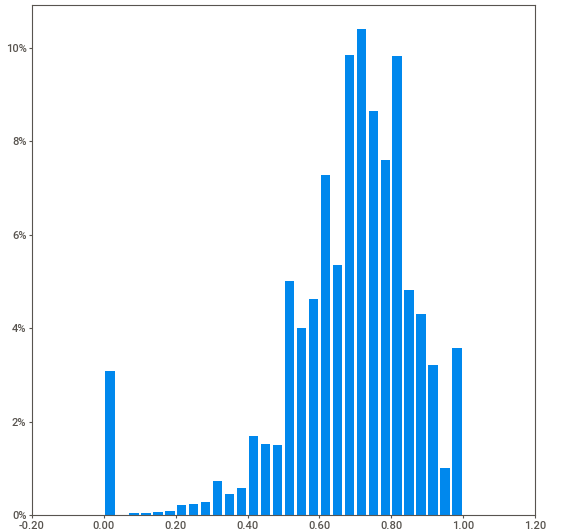
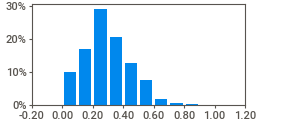
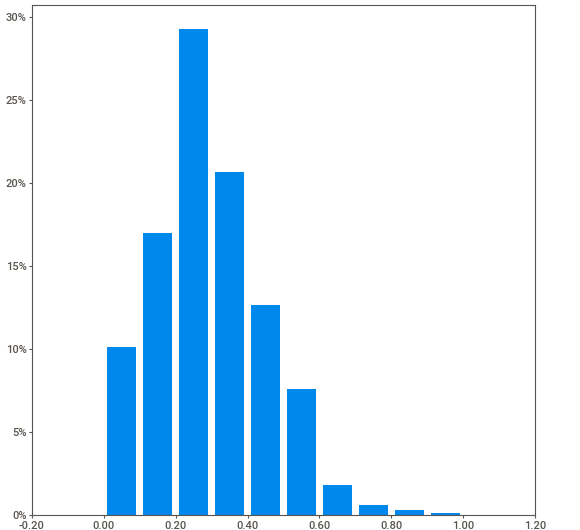
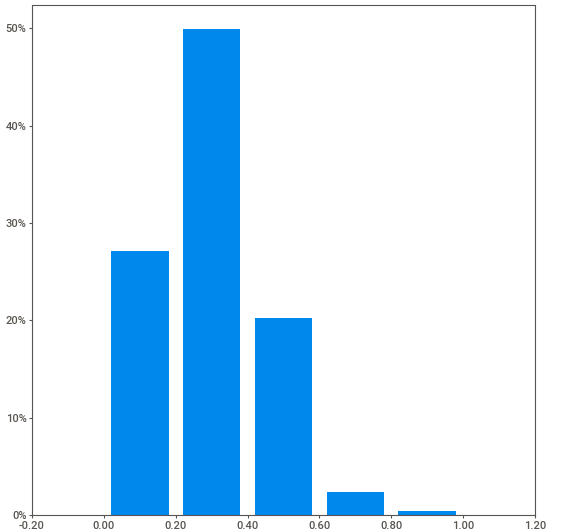
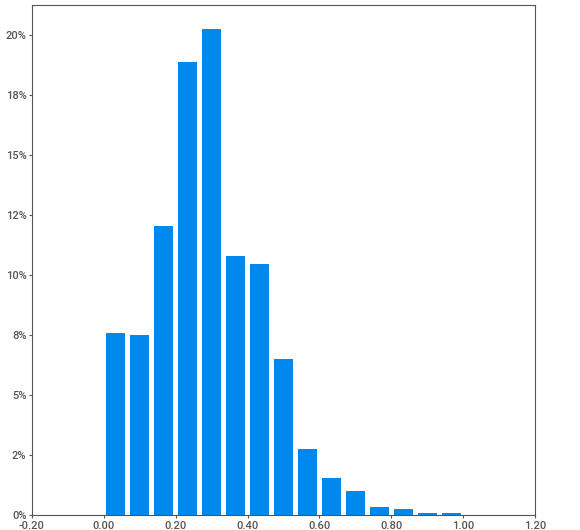
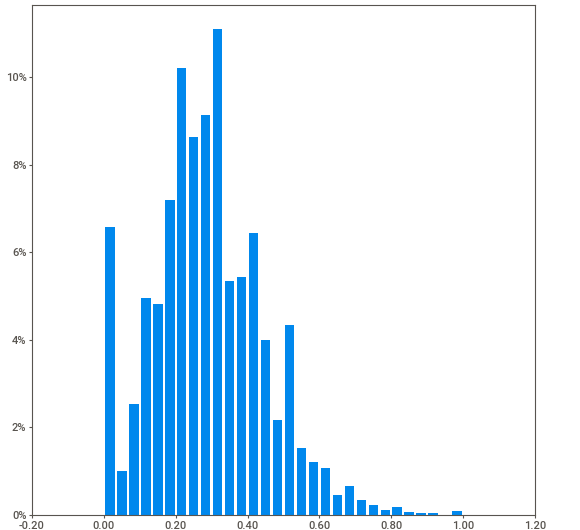
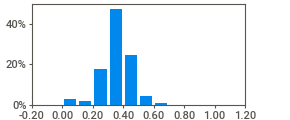
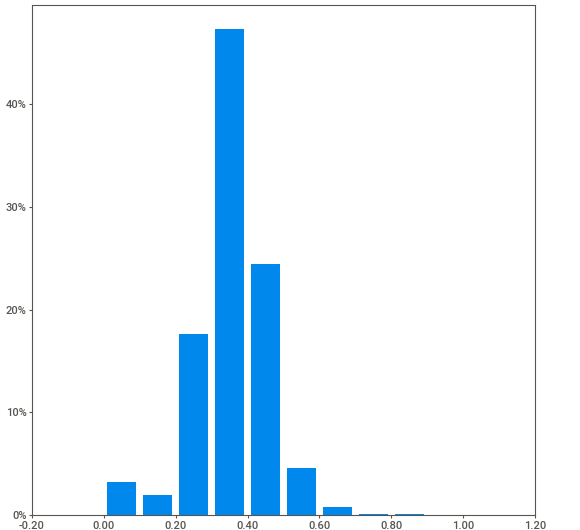
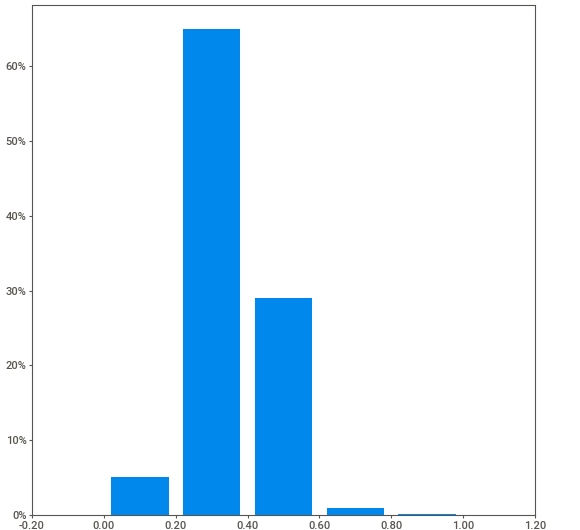
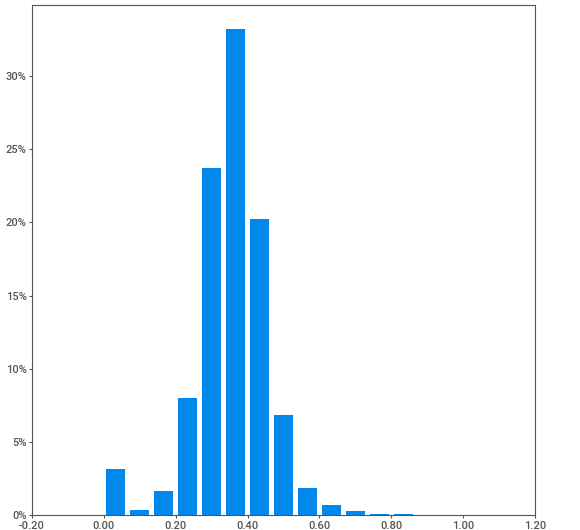
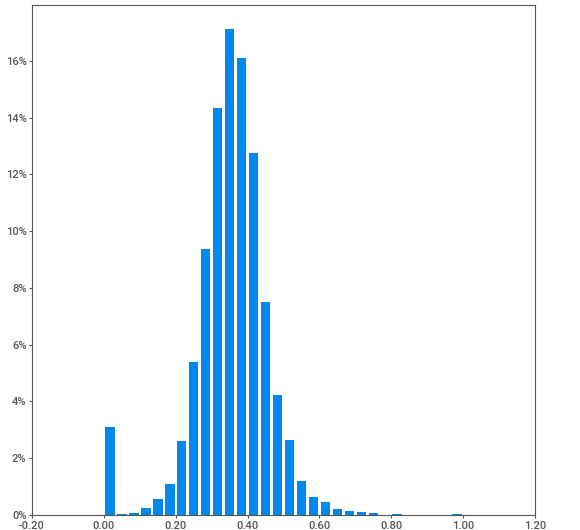
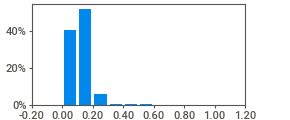
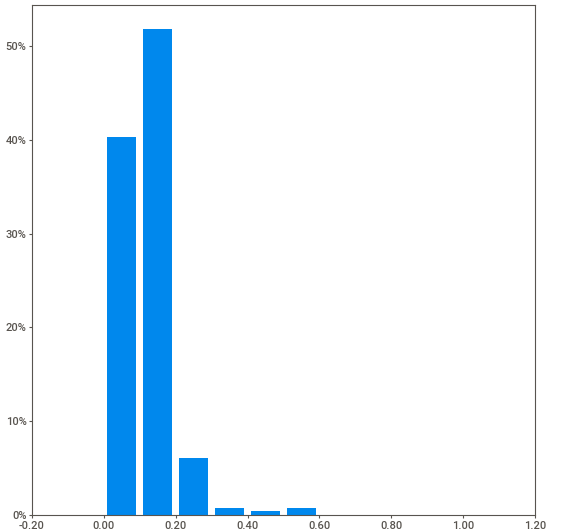
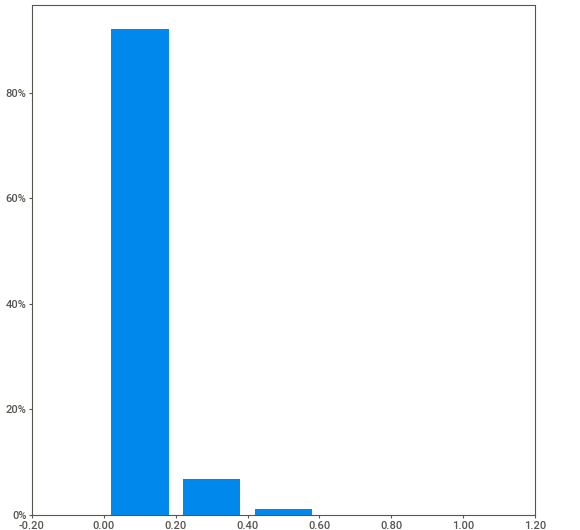
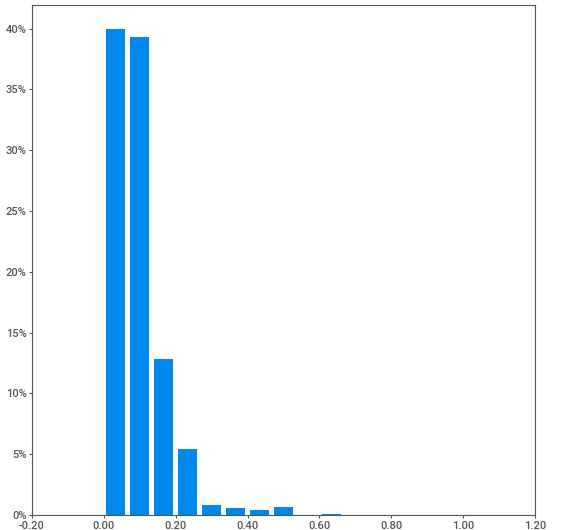
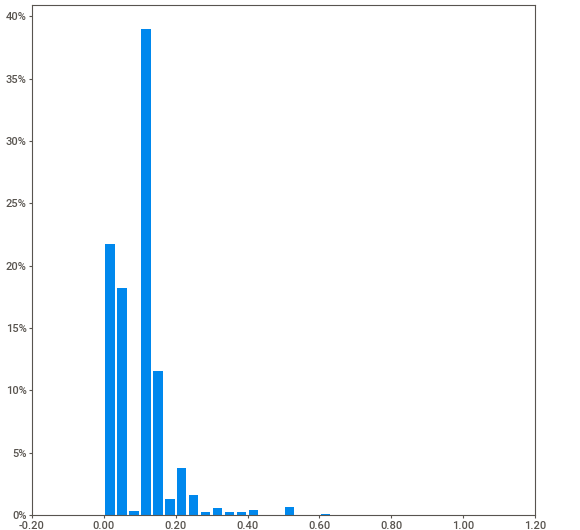
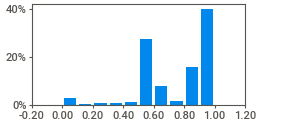
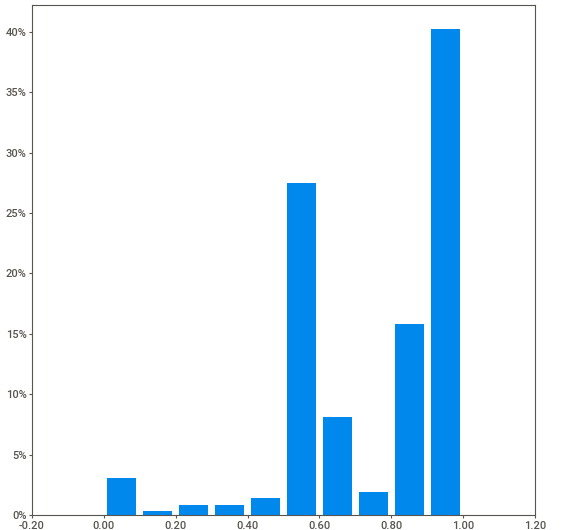
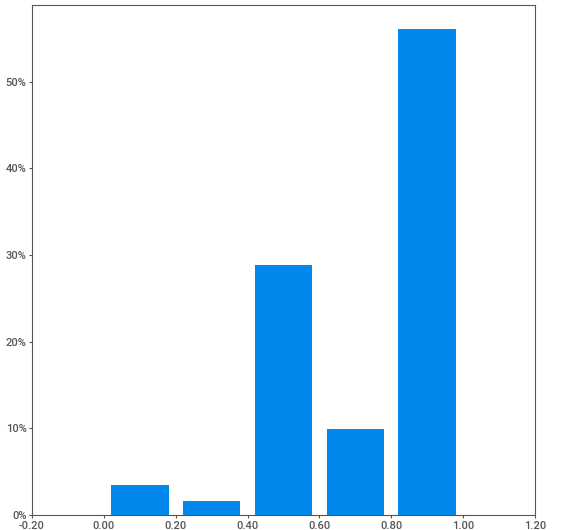
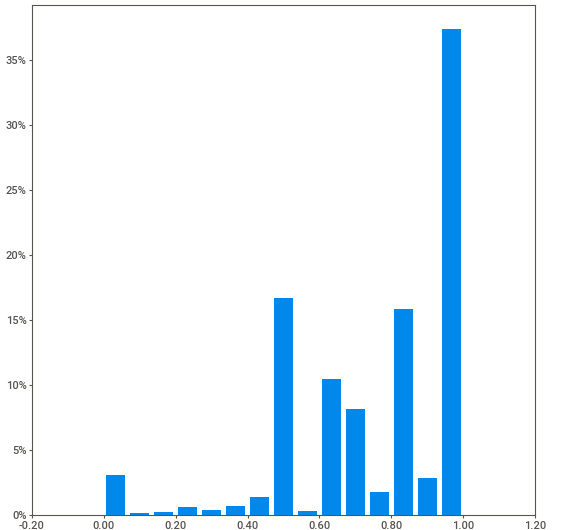
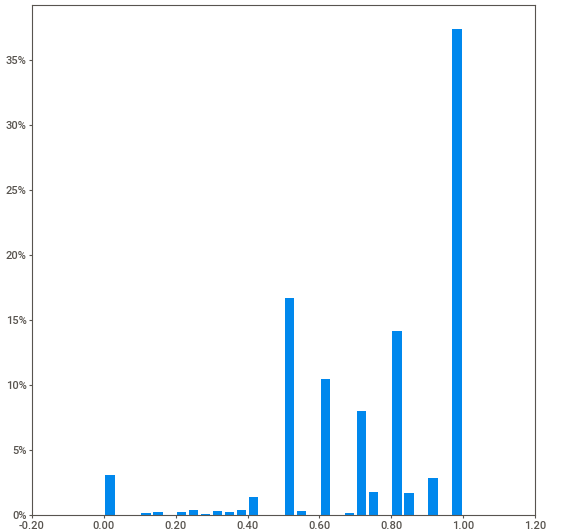
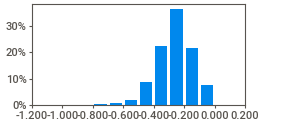
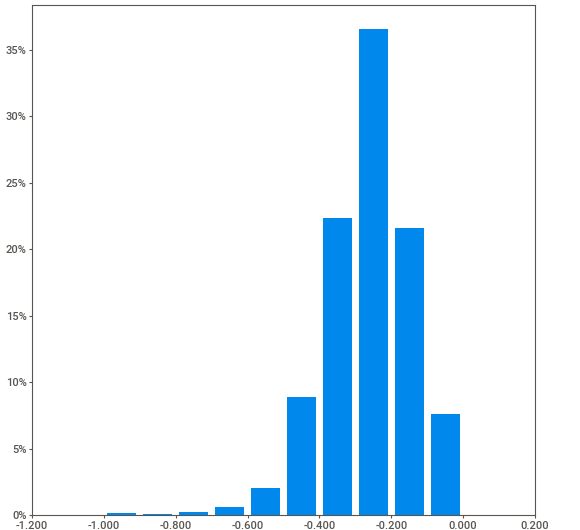
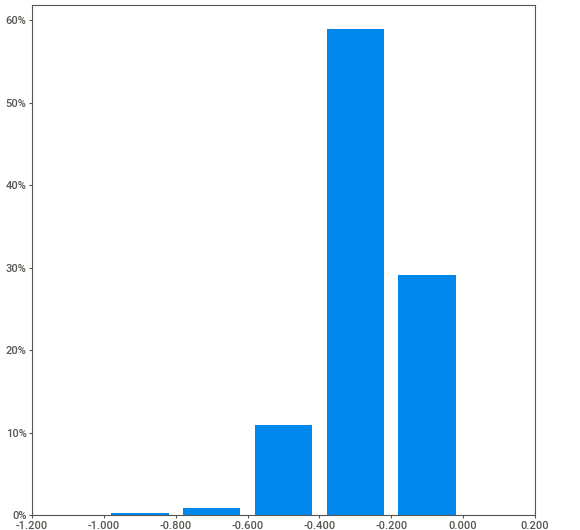
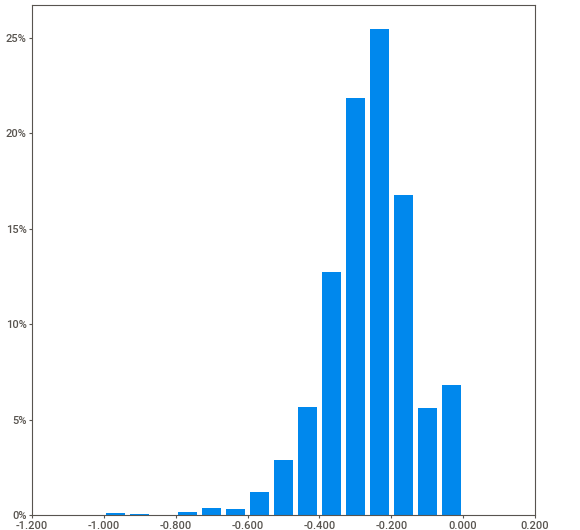
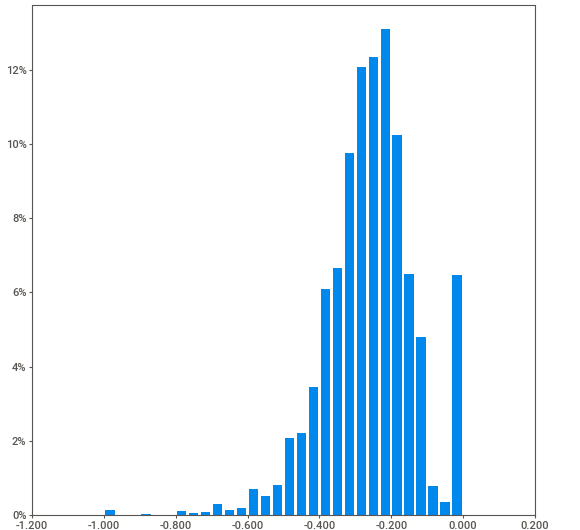
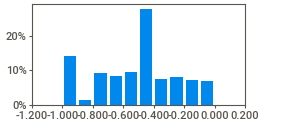
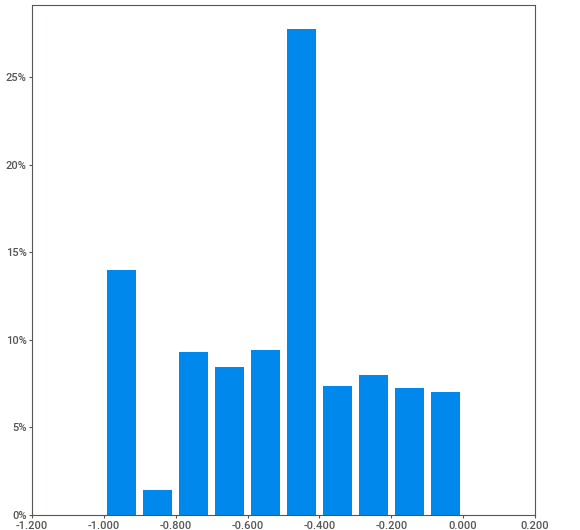
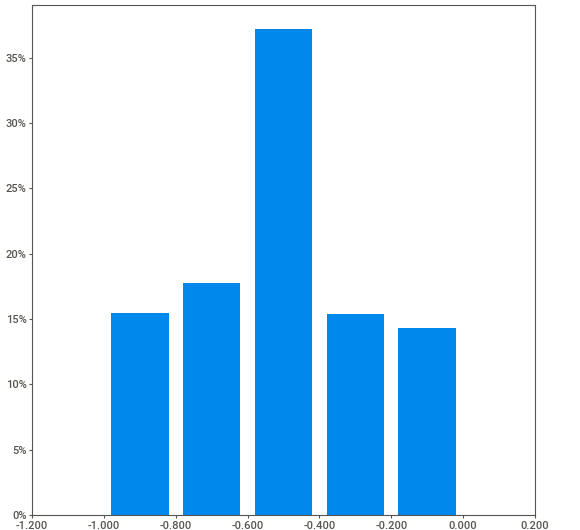
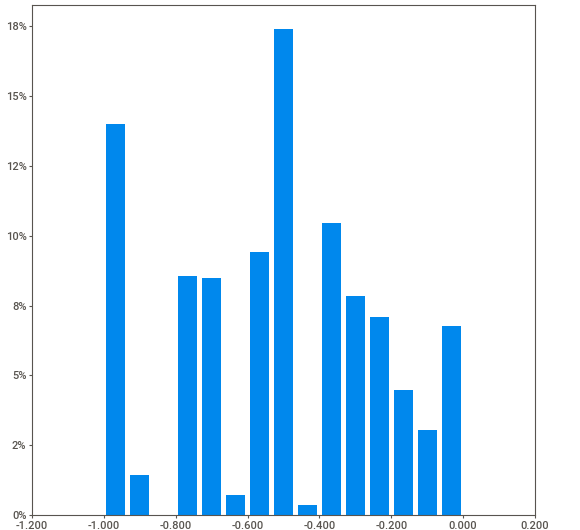
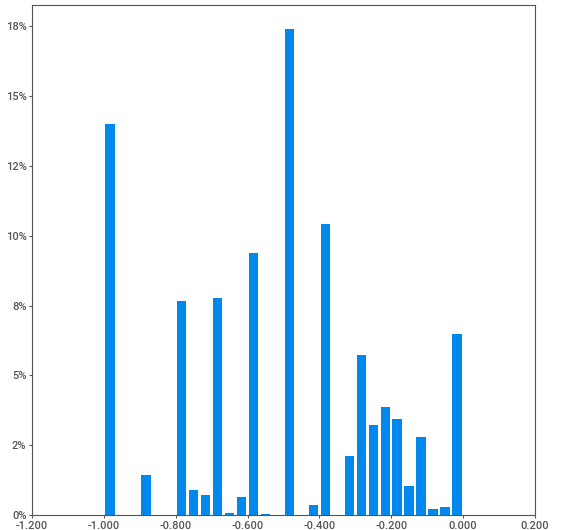
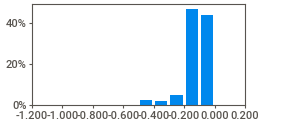
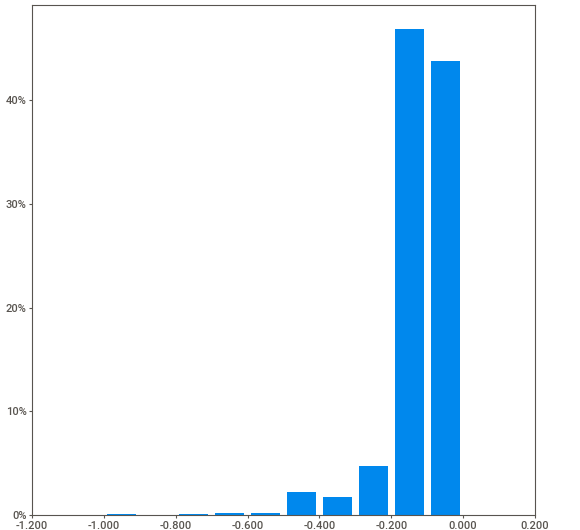
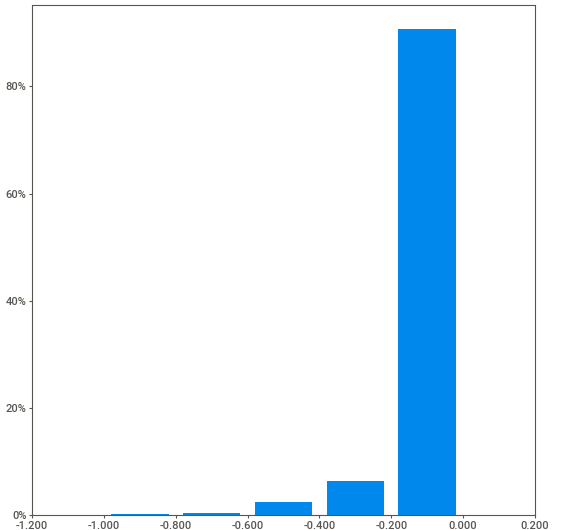
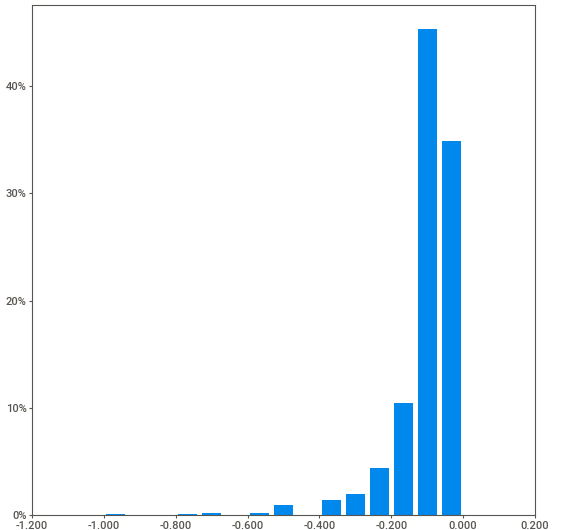
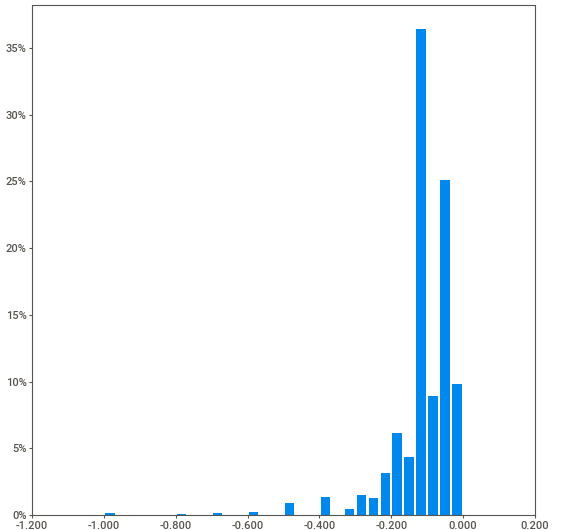
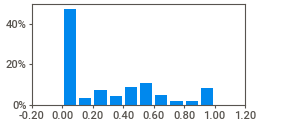
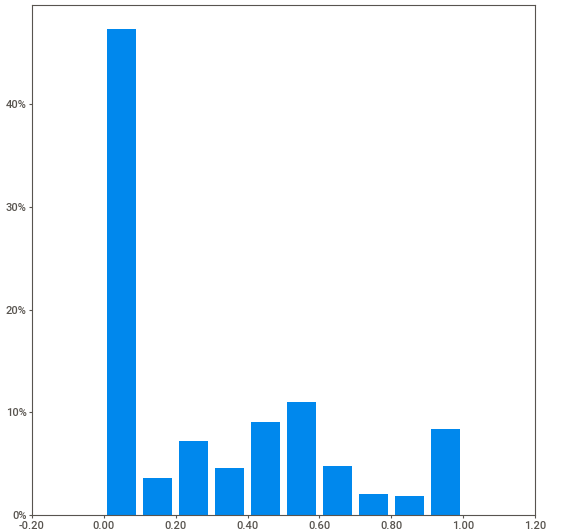
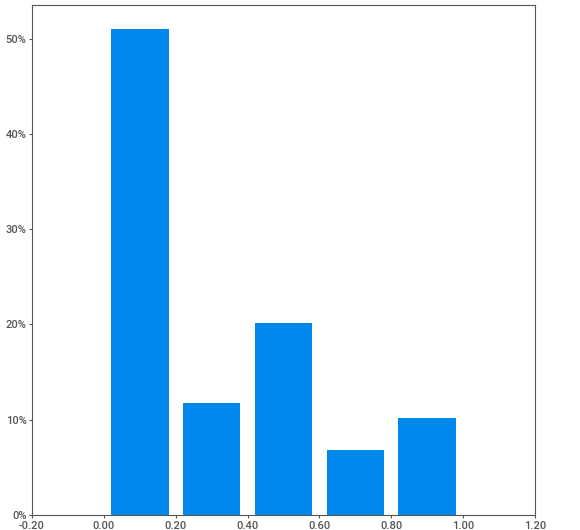
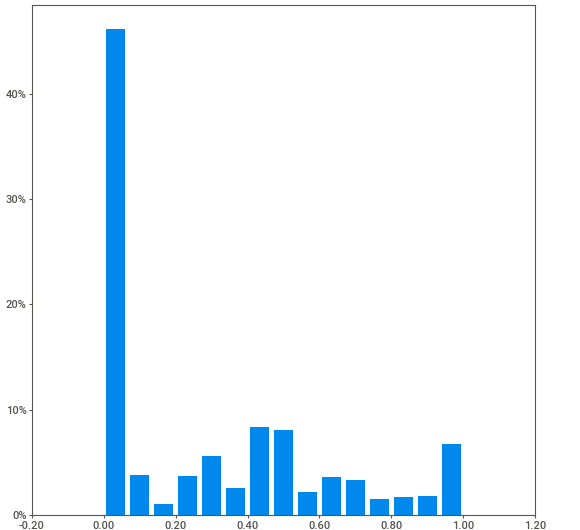
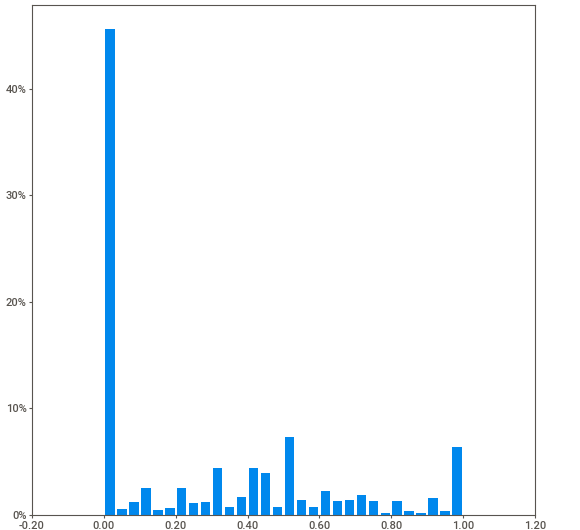
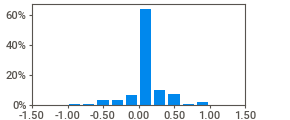
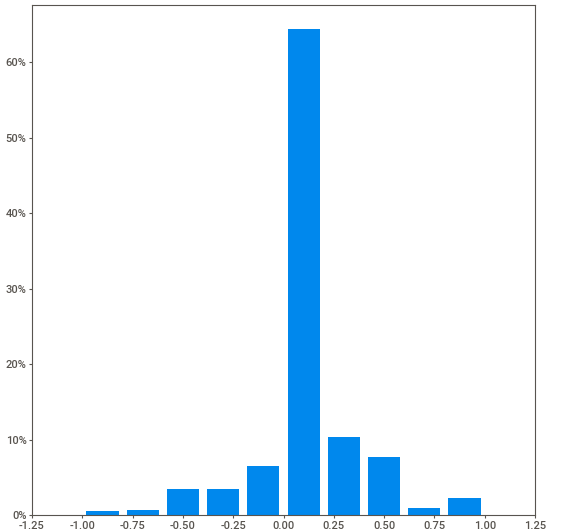
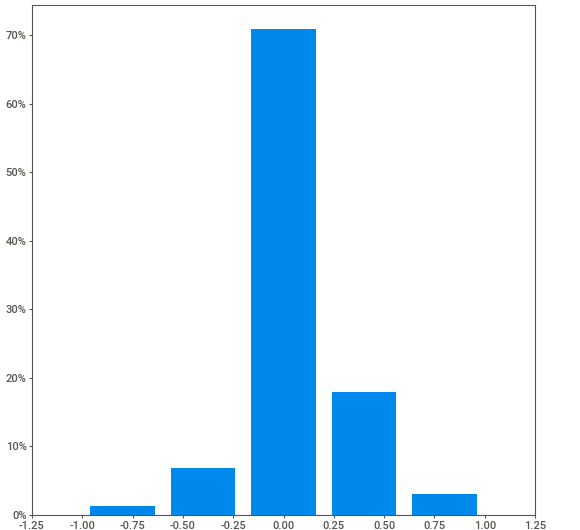
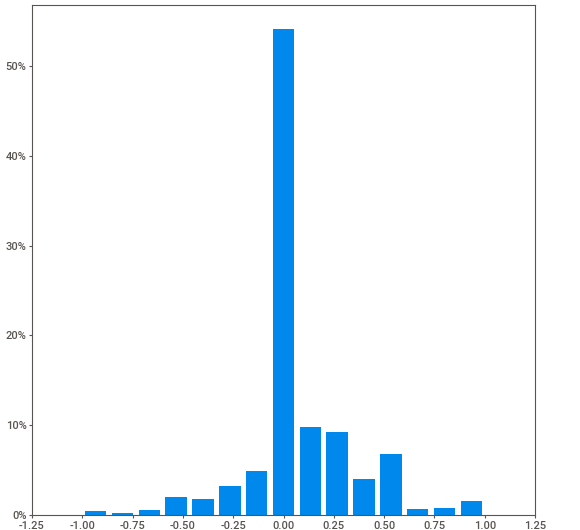
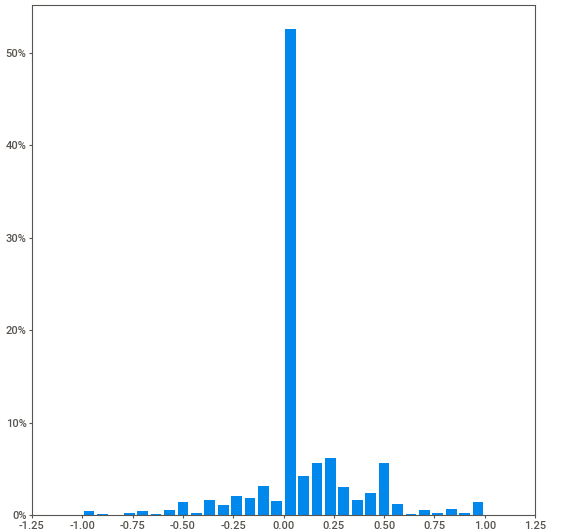
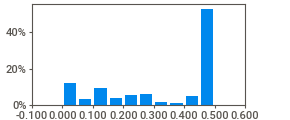
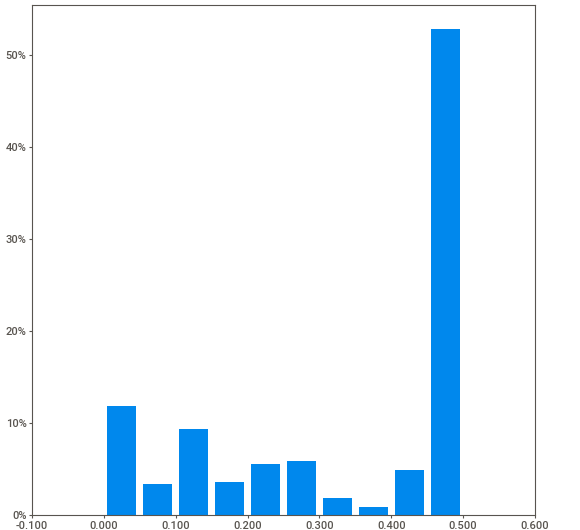
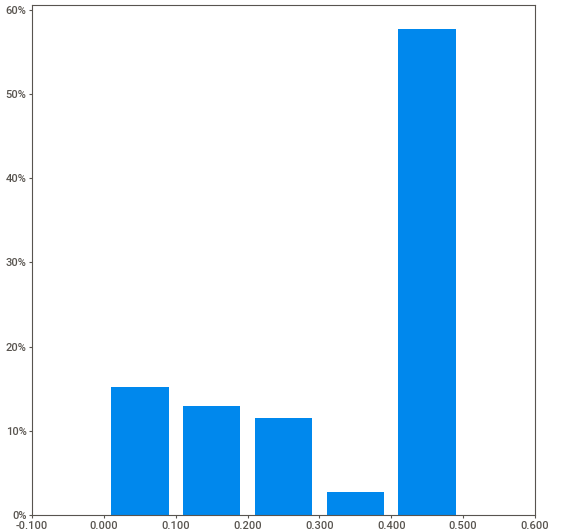
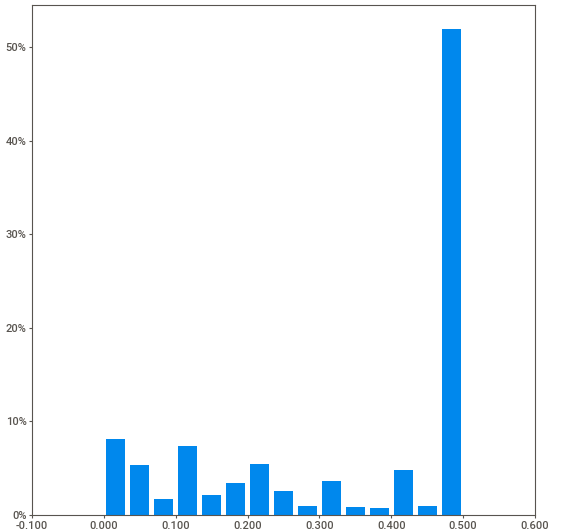
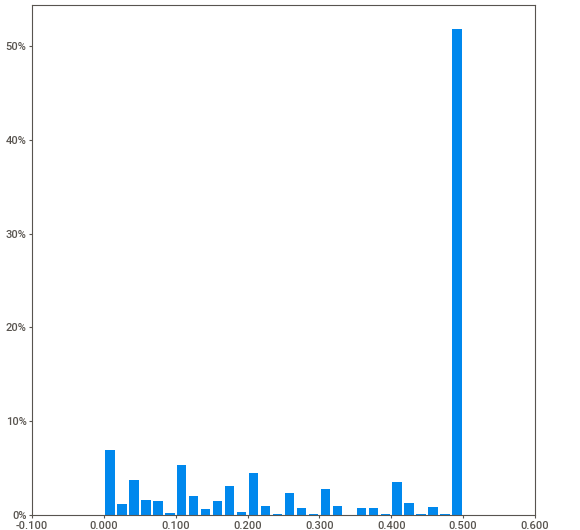
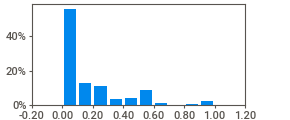
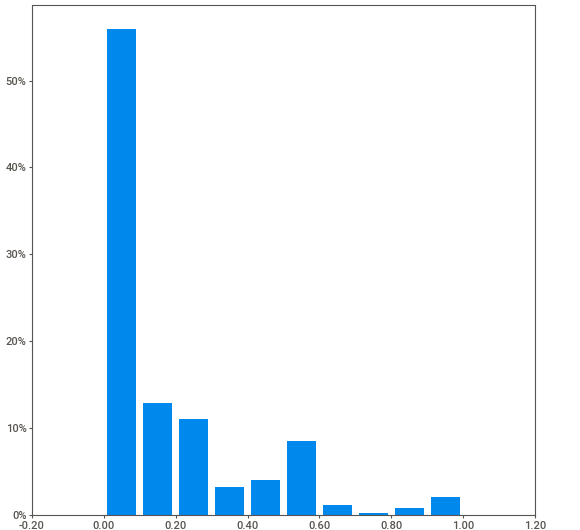
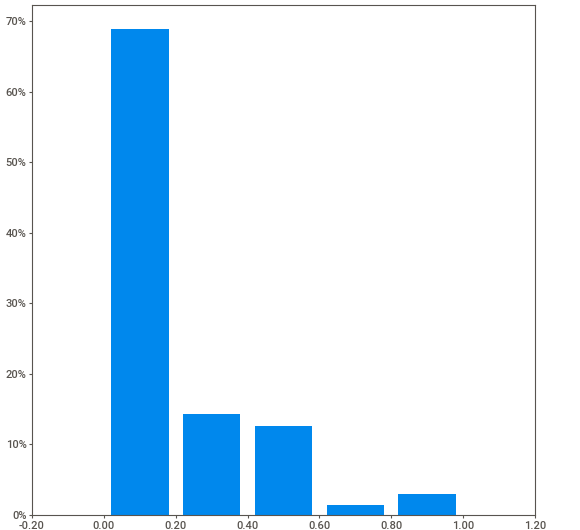
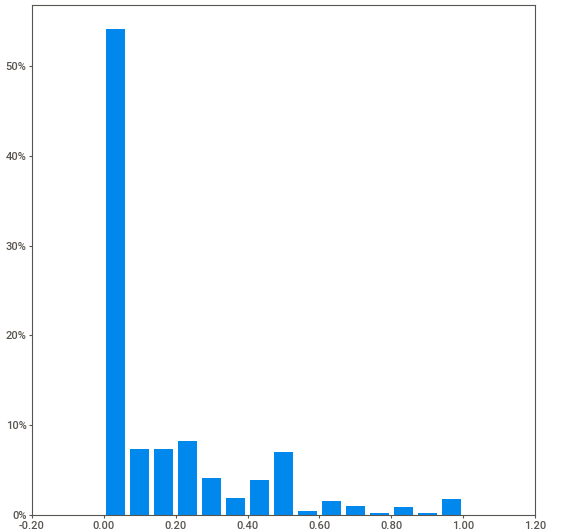
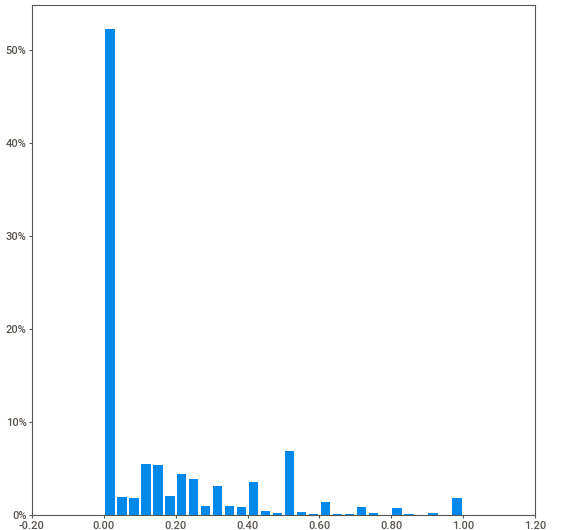
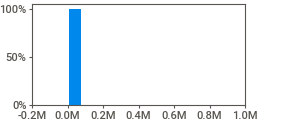
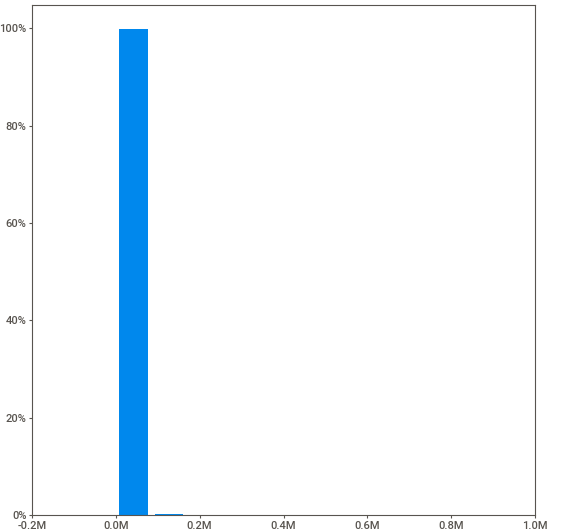
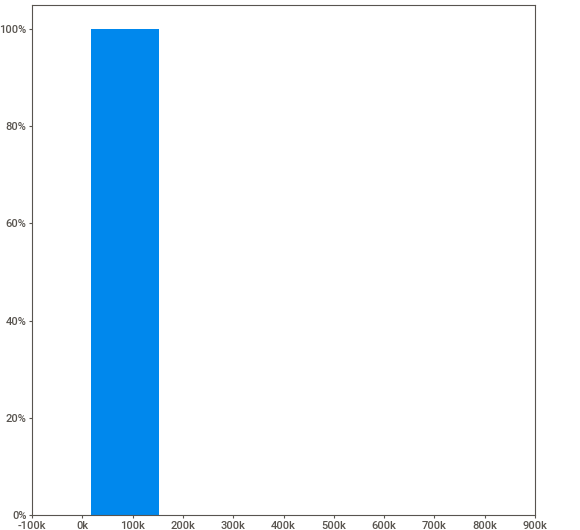
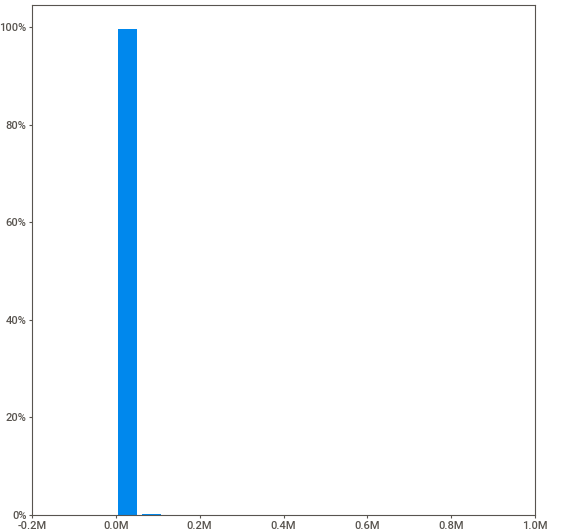
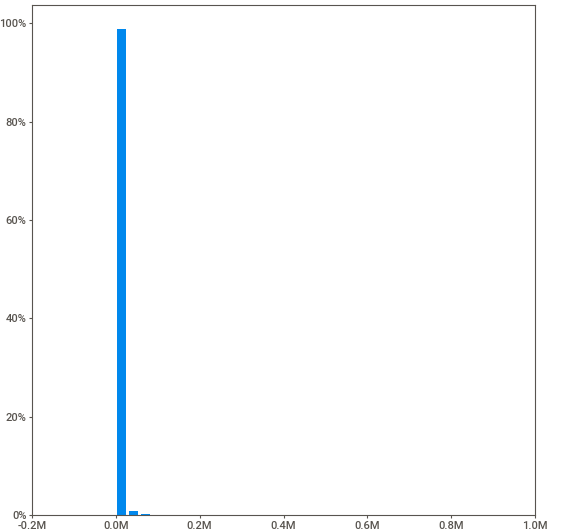
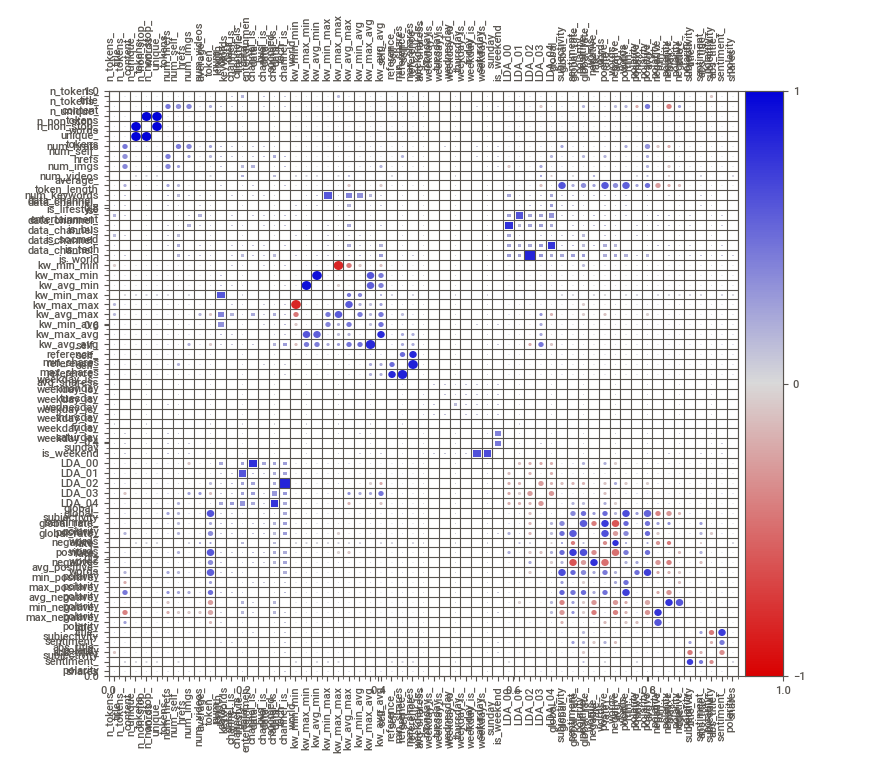
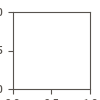

In [ ]:
report = sv.analyze(df)
report.show_notebook()

## Check for missing values

<Axes: >

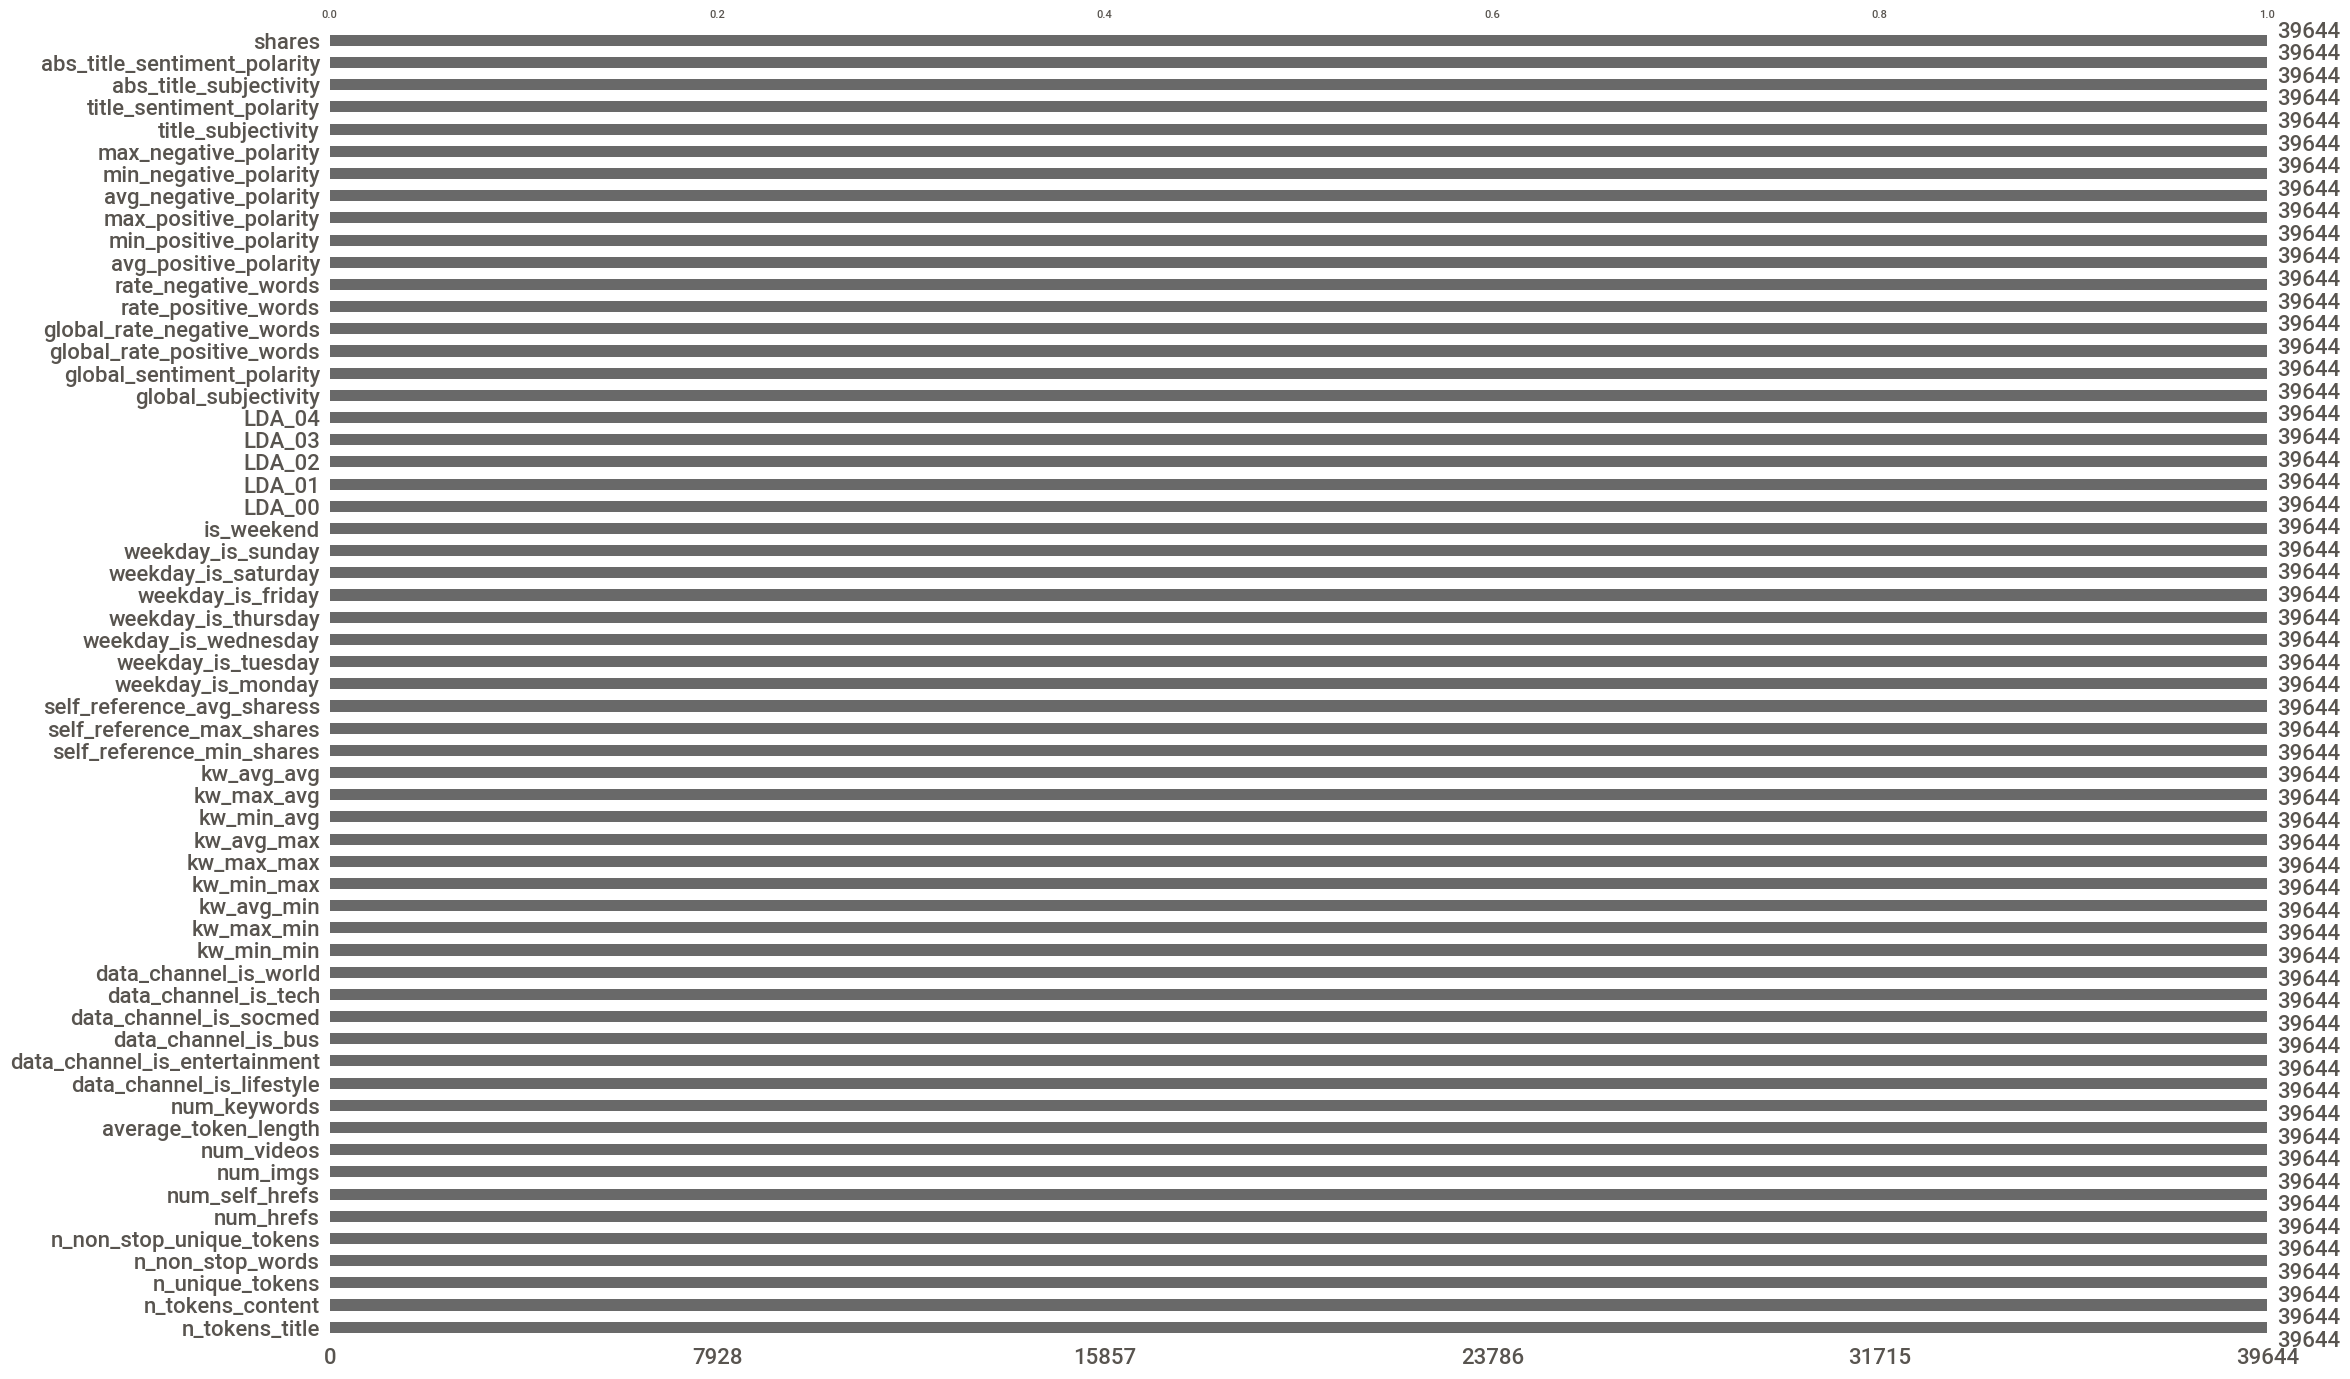

In [ ]:
msno.bar(df)

Seems like there are no missing values!!

## Look at target variable `shares`

### No transformations

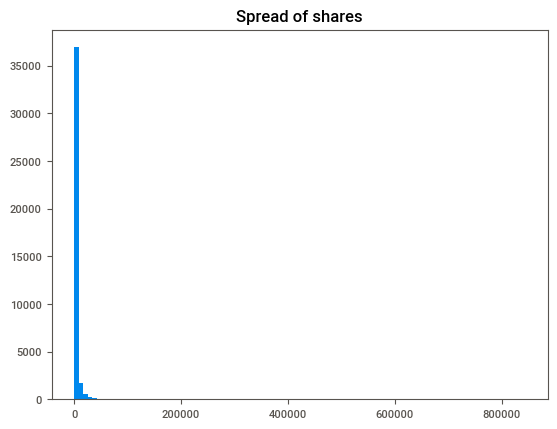

In [ ]:
plt.hist(df['shares'], 100)
plt.title('Spread of shares')
plt.show()

## Standardize data

## Remove outliers greater than 3 standard deviations from the mean

In [ ]:
standard = StandardScaler(with_std=True)

std_df = df.copy()

std_df['shares'] = standard.fit_transform(df[['shares']])

# Correct usage of .where
std_df['shares'] = std_df['shares'].where(std_df['shares'] <= 3, np.nan)
# Drop rows with NaN (optional)
std_df.dropna(subset=['shares'], inplace=True)

In [ ]:
df.describe()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
count    39644.000000      39644.000000     39644.000000      39644.000000   
mean        10.398749        546.514731         0.548216          0.996469   
std          2.114037        471.107508         3.520708          5.231231   
min          2.000000          0.000000         0.000000          0.000000   
25%          9.000000        246.000000         0.470870          1.000000   
50%         10.000000        409.000000         0.539226          1.000000   
75%         12.000000        716.000000         0.608696          1.000000   
max         23.000000       8474.000000       701.000000       1042.000000   

       n_non_stop_unique_tokens     num_hrefs  num_self_hrefs      num_imgs  \
count              39644.000000  39644.000000    39644.000000  39644.000000   
mean                   0.689175     10.883690        3.293638      4.544143   
std                    3.264816     11.332017        3.855141      8.309434   
min                    0.000000      0.000000        0.000000      0.000000   
25%                    0.625739      4.000000        1.000000      1.000000   
50%                    0.690476      8.000000        3.000000      1.000000   
75%                    0.754630     14.000000        4.000000      4.000000   
max                  650.000000    304.000000      116.000000    128.000000   

         num_videos  average_token_length  ...  min_positive_polarity  \
count  39644.000000          39644.000000  ...           39644.000000   
mean       1.249874              4.548239  ...               0.095446   
std        4.107855              0.844406  ...               0.071315   
min        0.000000              0.000000  ...               0.000000   
25%        0.000000              4.478404  ...               0.050000   
50%        0.000000              4.664082  ...               0.100000   
75%        1.000000              4.854839  ...               0.100000   
max       91.000000              8.041534  ...               1.000000   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
count           39644.000000           39644.000000           39644.000000   
mean                0.756728              -0.259524              -0.521944   
std                 0.247786               0.127726               0.290290   
min                 0.000000              -1.000000              -1.000000   
25%                 0.600000              -0.328383              -0.700000   
50%                 0.800000              -0.253333              -0.500000   
75%                 1.000000              -0.186905              -0.300000   
max                 1.000000               0.000000               0.000000   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
count           39644.000000        39644.000000              39644.000000   
mean               -0.107500            0.282353                  0.071425   
std                 0.095373            0.324247                  0.265450   
min                -1.000000            0.000000                 -1.000000   
25%                -0.125000            0.000000                  0.000000   
50%                -0.100000            0.150000                  0.000000   
75%                -0.050000            0.500000                  0.150000   
max                 0.000000            1.000000                  1.000000   

       abs_title_subjectivity  abs_title_sentiment_polarity         shares  
count            39644.000000                  39644.000000   39644.000000  
mean                 0.341843                      0.156064    3395.380184  
std                  0.188791                      0.226294   11626.950749  
min                  0.000000                      0.000000       1.000000  
25%                  0.166667                      0.000000     946.000000  
50%                  0.500000                      0.000000    140

In [ ]:
y = std_df[['shares']].to_numpy()

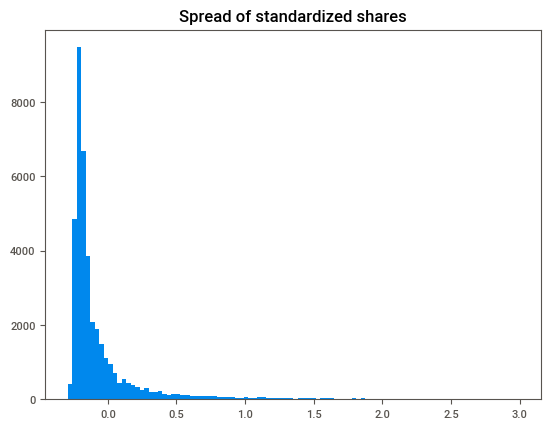

In [ ]:
plt.hist(y, 100)
plt.title('Spread of standardized shares')
plt.show()

In [ ]:
y = df['shares'].to_numpy()

## Normalize data

In [ ]:
mean = y.mean()
y_normal = (y-mean) / mean

In [ ]:
y_normal.sort()

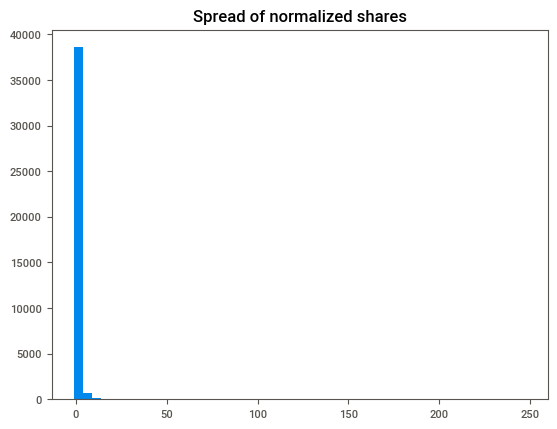

In [ ]:
plt.hist(y_normal, 50)
plt.title('Spread of normalized shares')
plt.show()

## Log transform data

In [ ]:
log_df = df.copy()

log_df['shares'] = np.log10(df['shares'])

In [ ]:
log_df['shares'].describe()

count    39644.000000
mean         3.246288
std          0.404105
min          0.000000
25%          2.975891
50%          3.146128
75%          3.447158
max          5.925982
Name: shares, dtype: float64

In [ ]:
y = log_df['shares']

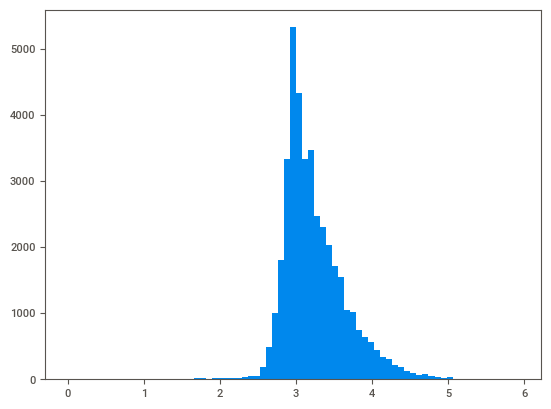

In [ ]:
plt.hist(y, 75)
plt.show()

***Log base 10 transformations are the best transformation because of the close spread of the transformed data and most of the data are centered around 3 with a range of [0,6)***

# EDA 2

In [ ]:
df['shares'] = log_df['shares']
train_df, test_df = train_test_split(df, random_state=10)

In [ ]:
y_train = train_df['shares']
X_train = train_df.drop(columns='shares')
y_test= test_df['shares']
X_test = test_df.drop(columns='shares')

In [ ]:
# Use sklearn to get fast estimates and ols model to trim features and draw conclusions
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# No need to transform pred because the model learned to predict log values

print('In sample metrics: ')
pred = model.predict(X_train)
r2 = r2_score(y_train, pred)
mse = mean_squared_error(y_train, pred)
print(f'{r2=:.4f} {mse=:.4f}')

print('Out of sample metrics: ')
pred = model.predict(X_test)
r2 = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)
print(f'{r2=:.4f} {mse=:.4f}')

In sample metrics: 
r2=0.1256 mse=0.1420
Out of sample metrics: 
r2=0.1285 mse=0.1448


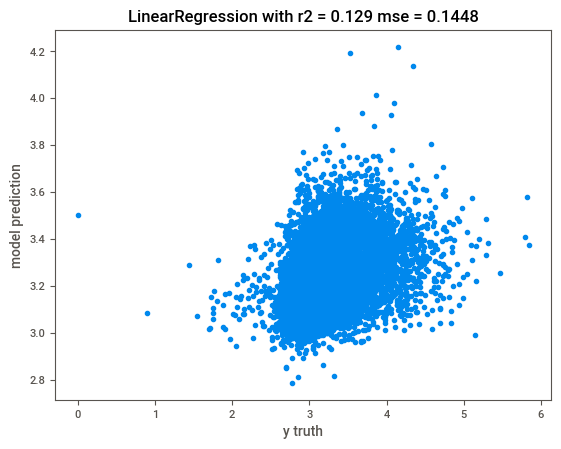

In [ ]:
plt.scatter(y_test, pred)
plt.title(f'LinearRegression with r2 = {r2:.3f} mse = {mse:.4f}')
plt.xlabel('y truth')
plt.ylabel('model prediction')
plt.show()

In [ ]:
feats = model.feature_names_in_
coef = model.coef_
info = list(zip(feats, coef))

In [ ]:
key = lambda a: abs(a[1])
info = sorted(info, key=key)
info[-20:]

[('data_channel_is_lifestyle', -0.04623713801713661),
 ('abs_title_subjectivity', 0.05845925973547453),
 ('rate_positive_words', 0.06415021755232832),
 ('global_sentiment_polarity', -0.06432656559597578),
 ('avg_negative_polarity', -0.06454732631755851),
 ('is_weekend', 0.06743214032526189),
 ('n_non_stop_words', 0.06820198124823837),
 ('data_channel_is_socmed', 0.0701441650325408),
 ('data_channel_is_bus', -0.07102456571167899),
 ('n_non_stop_unique_tokens', -0.07704929682339763),
 ('data_channel_is_entertainment', -0.07983031709767875),
 ('min_positive_polarity', -0.08701097560396087),
 ('global_subjectivity', 0.17320451912327883),
 ('global_rate_negative_words', 0.23381962996114936),
 ('global_rate_positive_words', -0.4293162735577448),
 ('LDA_02', 49.64324747236646),
 ('LDA_01', 49.677684250540295),
 ('LDA_03', 49.696187503566435),
 ('LDA_04', 49.74995682816797),
 ('LDA_00', 49.83047876179681)]

In [ ]:
df["LDA_04"].describe()

count    39644.000000
mean         0.234029
std          0.289183
min          0.000000
25%          0.028574
50%          0.040727
75%          0.399986
max          0.927191
Name: LDA_04, dtype: float64

The most significant features are these: `LDA_02`, `LDA_01`, `LDA_03`, `LDA_04`, `LDA_00`

# EDA 3

In [ ]:
def find_reg_tree(train_df, test_df, max_depth):
    y_train = train_df['shares']
    X_train = train_df.drop(columns='shares')

    y_test = test_df['shares']
    X_test = test_df.drop(columns='shares')

    info = []

    for i in [*list(range(1,10)),1e1, 2e1, 3e1]:
        print()
        # max_features=1.0 gives the best r2 and MSE values
        # min_samples_leaf=1 is the best
        # min_samples_split=2 is the best
        model = RandomForestRegressor(n_estimators=int(i), max_features=4, random_state=1)
        model.fit(X_train, y_train)

        # Check for overfitting
        pred = model.predict(X_train)
        r2 = r2_score(y_train, pred)
        mse = mean_squared_error(y_train, pred)
        print(f'{i}: train_{r2=:.4f} train_{mse=:.4f}')

        plt.scatter(y_train, pred)
        plt.title(f'LinearRegression with r2 = {r2:.3f} mse = {mse:.4f}')
        plt.xlabel('y truth')
        plt.ylabel('model prediction')
        plt.show()


        # Check for generalization
        pred = model.predict(X_test)
        r2 = r2_score(y_test, pred)
        mse = mean_squared_error(y_test, pred)
        print(f'{i}: test_{r2=:.4f} test_{mse=:.4f}')

        feat_imp = model.feature_importances_
        feat = model.feature_names_in_
        features = list(zip(feat, feat_imp))
        info.append((i,r2,mse,features))

        plt.scatter(y_test, pred)
        plt.title(f'LinearRegression with r2 = {r2:.3f} mse = {mse:.4f}')
        plt.xlabel('y truth')
        plt.ylabel('model prediction')
        plt.show()

    return info


1: train_r2=0.3479 train_mse=0.1059


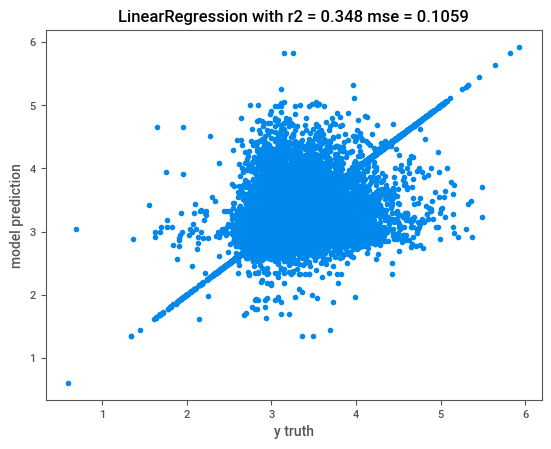

1: test_r2=-0.7453 test_mse=0.2899


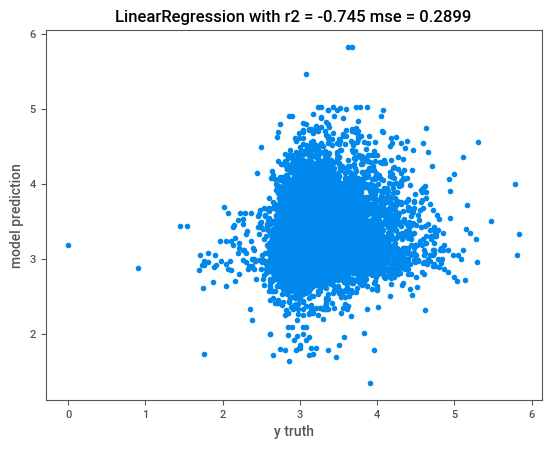


2: train_r2=0.6202 train_mse=0.0617


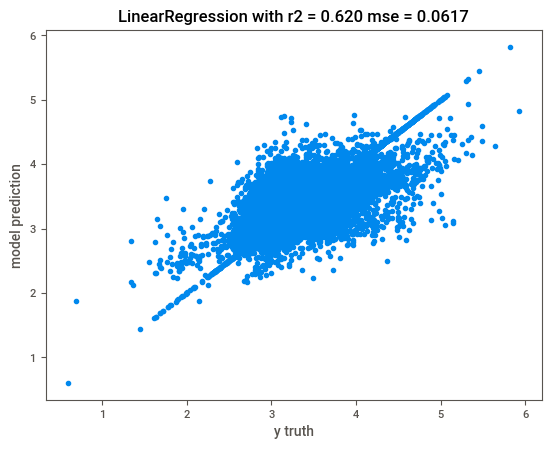

2: test_r2=-0.2703 test_mse=0.2110


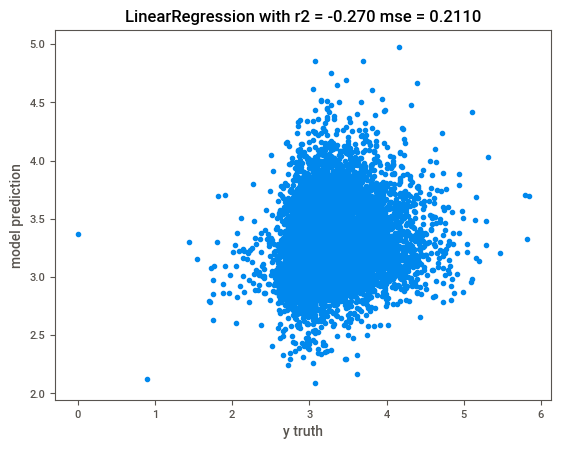


3: train_r2=0.7148 train_mse=0.0463


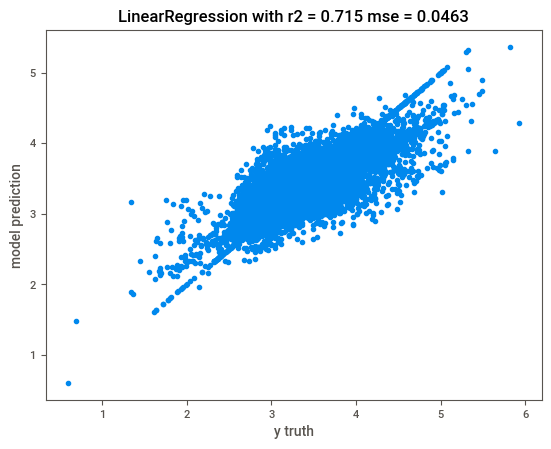

3: test_r2=-0.1349 test_mse=0.1885


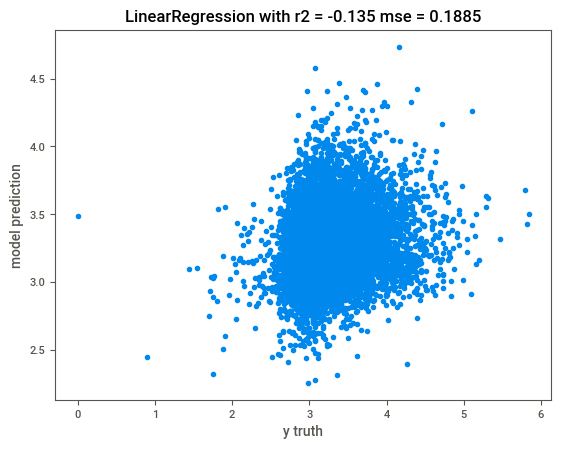


4: train_r2=0.7578 train_mse=0.0393


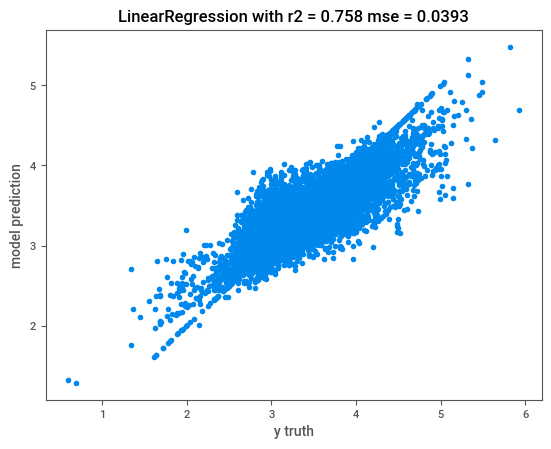

4: test_r2=-0.0658 test_mse=0.1771


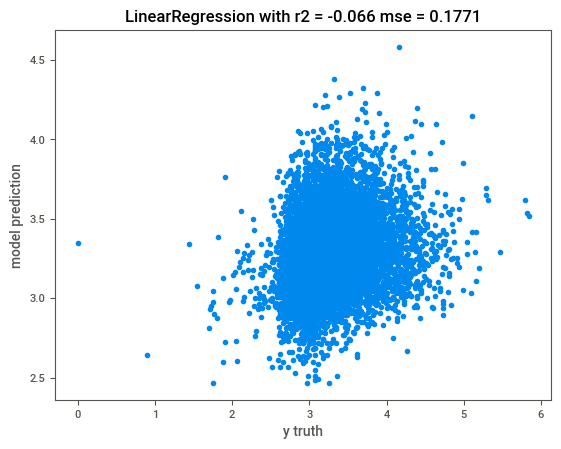


5: train_r2=0.7839 train_mse=0.0351


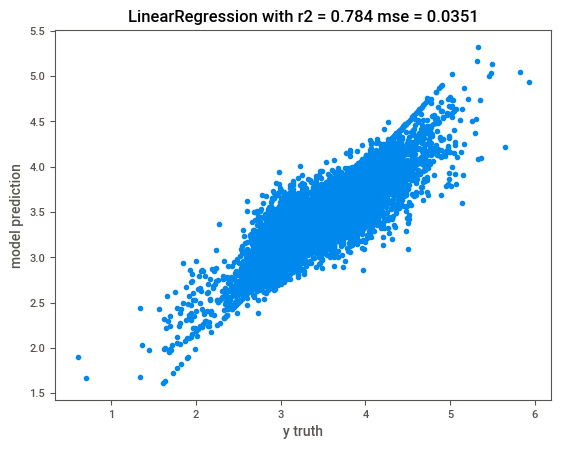

5: test_r2=-0.0127 test_mse=0.1682


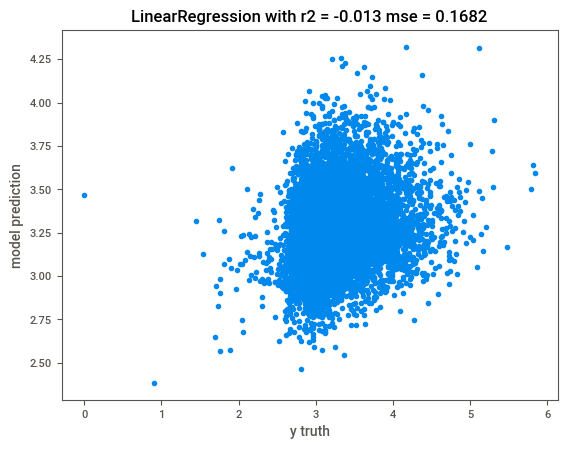


6: train_r2=0.8003 train_mse=0.0324


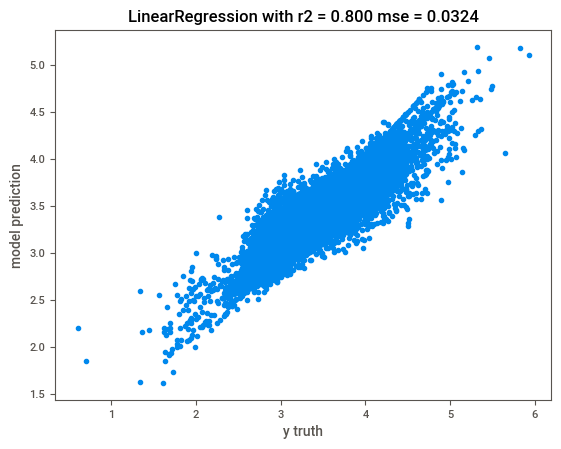

6: test_r2=0.0123 test_mse=0.1641


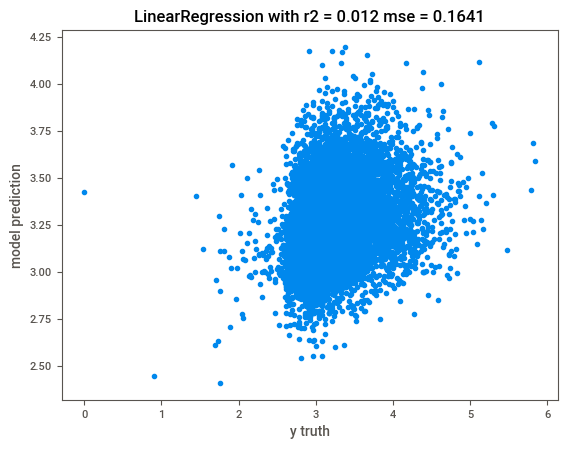


7: train_r2=0.8119 train_mse=0.0305


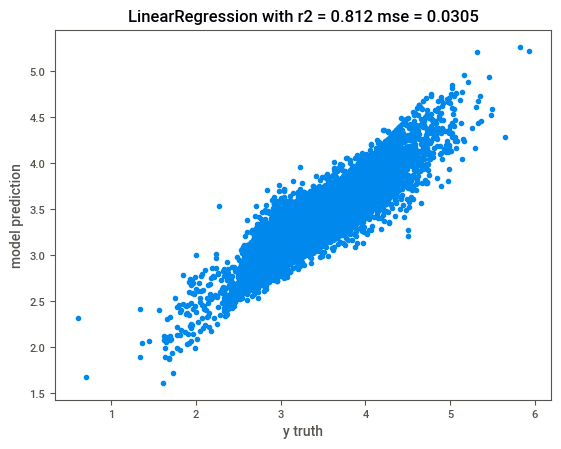

7: test_r2=0.0407 test_mse=0.1594


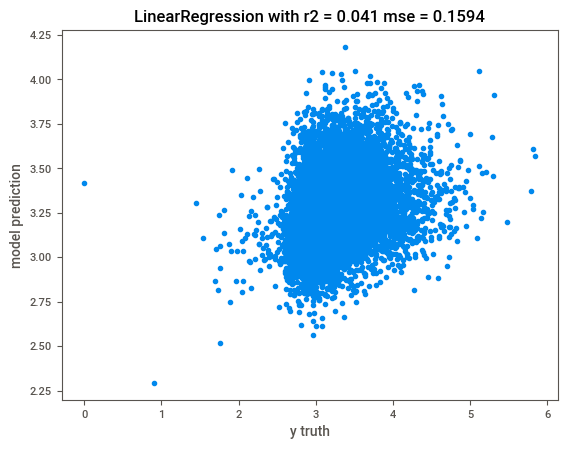


8: train_r2=0.8207 train_mse=0.0291


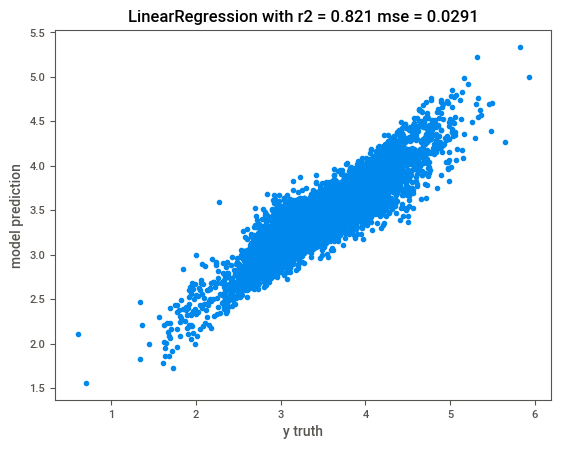

8: test_r2=0.0549 test_mse=0.1570


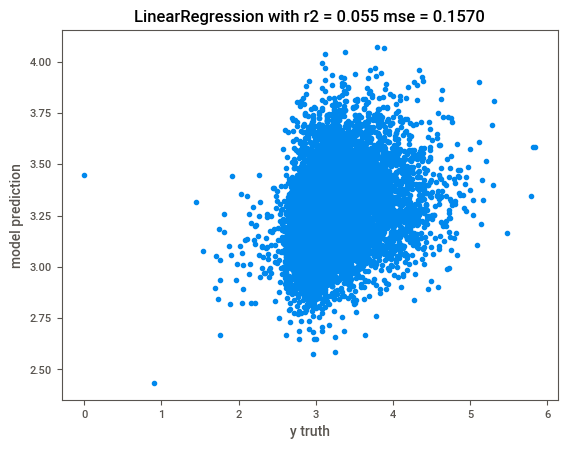


9: train_r2=0.8281 train_mse=0.0279


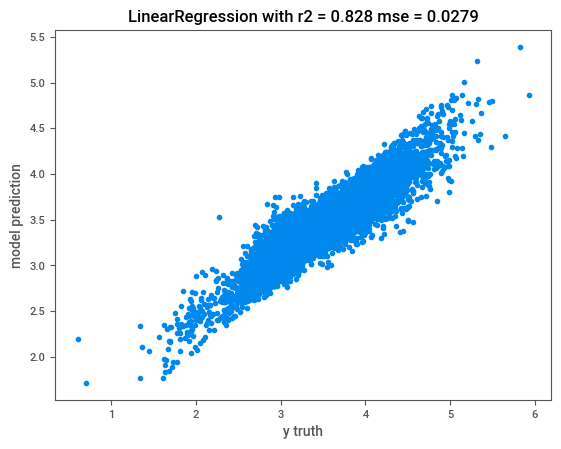

9: test_r2=0.0656 test_mse=0.1552


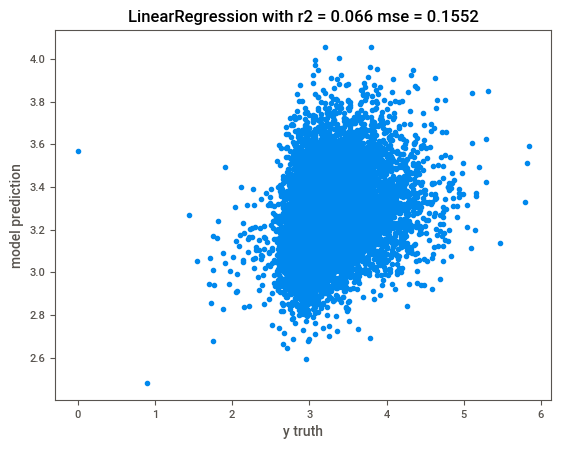


10.0: train_r2=0.8337 train_mse=0.0270


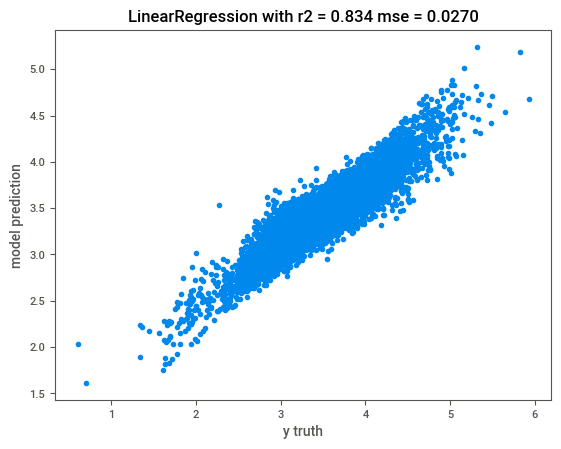

10.0: test_r2=0.0748 test_mse=0.1537


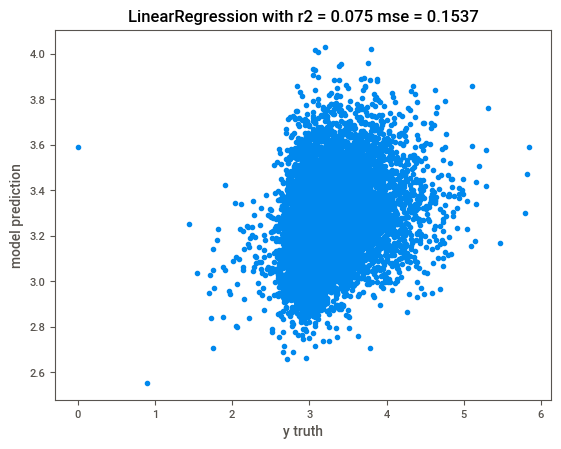


20.0: train_r2=0.8605 train_mse=0.0226


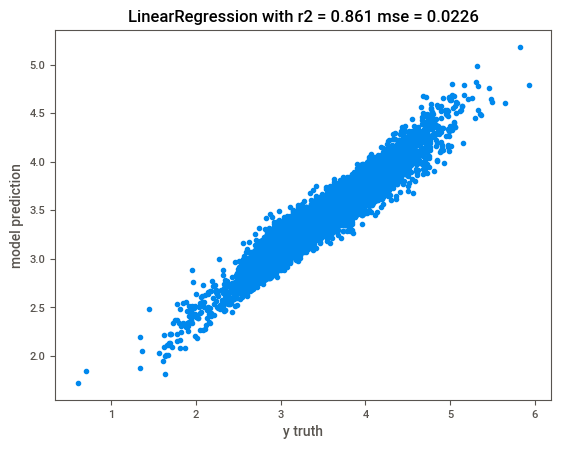

20.0: test_r2=0.1197 test_mse=0.1462


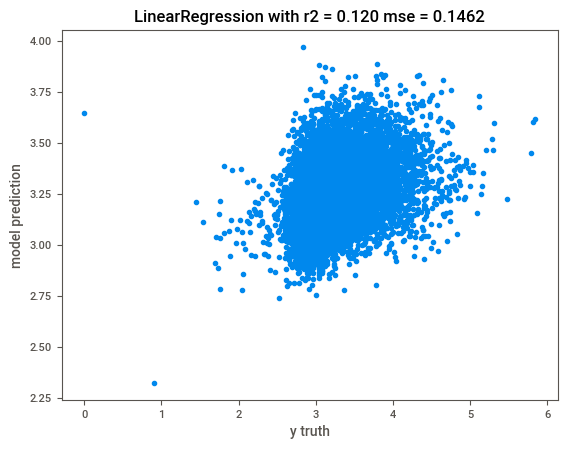


30.0: train_r2=0.8695 train_mse=0.0212


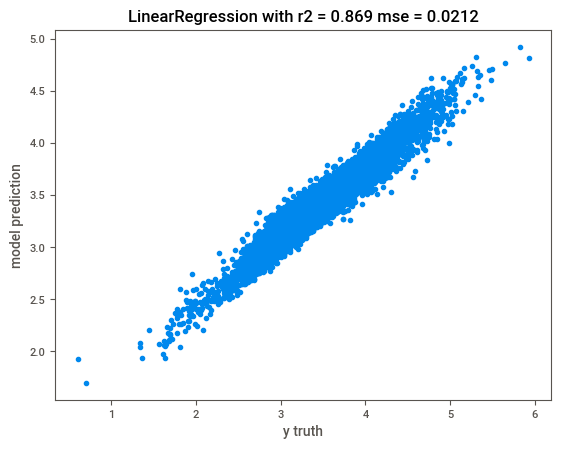

30.0: test_r2=0.1380 test_mse=0.1432


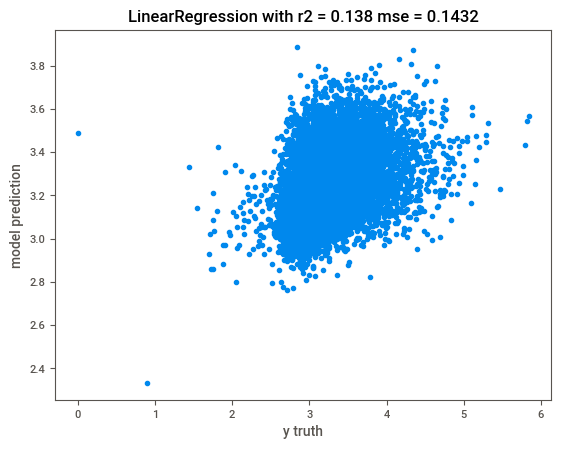

In [ ]:
info = find_reg_tree(train_df, test_df, 50)

In [ ]:
high_r2 = lambda a : abs(a[1])
high_mse = lambda a : a[2]

r2_info = sorted(info,key=high_r2)
mse_info = sorted(info,key=high_mse)

In [ ]:
r2_info[-5:]

[(20.0,
  0.11967191086972484,
  0.14624503440975045,
  [('n_tokens_title', 0.0185345482451545),
   ('n_tokens_content', 0.02387649100289583),
   ('n_unique_tokens', 0.025740705483817006),
   ('n_non_stop_words', 0.00045350187951105105),
   ('n_non_stop_unique_tokens', 0.025900963608458016),
   ('num_hrefs', 0.023898768229228023),
   ('num_self_hrefs', 0.01307880306618105),
   ('num_imgs', 0.01798093127393829),
   ('num_videos', 0.010169759067021538),
   ('average_token_length', 0.02505255887833417),
   ('num_keywords', 0.011570581201485896),
   ('data_channel_is_lifestyle', 0.0018965459402386358),
   ('data_channel_is_entertainment', 0.00561817688139994),
   ('data_channel_is_bus', 0.0021125260712639127),
   ('data_channel_is_socmed', 0.0031784531457518424),
   ('data_channel_is_tech', 0.003837424797298518),
   ('data_channel_is_world', 0.004787386916840028),
   ('kw_min_min', 0.006848664098825988),
   ('kw_max_min', 0.02426602842994965),
   ('kw_avg_min', 0.02764560007287284),
   ('k

In [ ]:
for t in info:
    sig_feature = sorted(t[-1], key=high_r2)
    print(t[0], sig_feature[-5:])


1 [('kw_avg_max', 0.03189922866105583), ('LDA_03', 0.03591729256142787), ('kw_avg_avg', 0.03613461921062962), ('kw_max_avg', 0.0412380986733302), ('self_reference_max_shares', 0.044363942701543854)]
2 [('kw_min_avg', 0.031445852336591654), ('LDA_03', 0.031790115638538514), ('kw_avg_avg', 0.034596106870501575), ('self_reference_max_shares', 0.03521014851501042), ('kw_max_avg', 0.058062225222893116)]
3 [('LDA_03', 0.028555198609638458), ('kw_avg_max', 0.028794758421996792), ('kw_avg_avg', 0.03777970148055811), ('self_reference_max_shares', 0.038692691295550245), ('kw_max_avg', 0.055000422563582875)]
4 [('kw_avg_max', 0.029435597635264526), ('kw_min_avg', 0.029893249506686977), ('self_reference_max_shares', 0.035069562806559755), ('kw_avg_avg', 0.0364234011055687), ('kw_max_avg', 0.051476474252250076)]
5 [('kw_avg_min', 0.029181264806106732), ('kw_avg_max', 0.02918835837961149), ('self_reference_max_shares', 0.0345783160398669), ('kw_avg_avg', 0.03709855007496951), ('kw_max_avg', 0.051486

Most significant features across all the RandomForest models are the `kw_max_avg`, `self_reference_max_shares`, and `kw_avg_avg`.

# EDA 4

## Exploring relationships between 8 variables

In [ ]:
sig_feats_df = df[['LDA_00','LDA_01','LDA_02','LDA_03','LDA_04','kw_max_avg','kw_avg_avg','self_reference_max_shares']]
y = df['shares']

In [ ]:
sig_feats_df[['LDA_00','LDA_01','LDA_02','LDA_03','LDA_04']] = sig_feats_df[['LDA_00','LDA_01','LDA_02','LDA_03','LDA_04']].replace(0, 1e-1)

/var/folders/2g/3j1bfngd2515lb3wwz2840140000gn/T/ipykernel_59921/969812889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_feats_df[['LDA_00','LDA_01','LDA_02','LDA_03','LDA_04']] = sig_feats_df[['LDA_00','LDA_01','LDA_02','LDA_03','LDA_04']].replace(0, 1e-1)


In [ ]:
sig_feats_df[['kw_max_avg','kw_avg_avg','self_reference_max_shares']] = sig_feats_df[['kw_max_avg','kw_avg_avg','self_reference_max_shares']].replace(0,1e3)
sig_feats_df[['kw_max_avg','kw_avg_avg','self_reference_max_shares']].describe()

/var/folders/2g/3j1bfngd2515lb3wwz2840140000gn/T/ipykernel_59921/2271041452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_feats_df[['kw_max_avg','kw_avg_avg','self_reference_max_shares']] = sig_feats_df[['kw_max_avg','kw_avg_avg','self_reference_max_shares']].replace(0,1e3)


kw_max_avg    kw_avg_avg  self_reference_max_shares
count   39644.000000  39644.000000               39644.000000
mean     5659.203886   3137.851374               10510.198435
std      6097.186297   1314.157942               40983.793150
min      1000.000000    424.344444                   1.590000
25%      3562.101631   2382.448566                1100.000000
50%      4355.688836   2870.074878                2800.000000
75%      6019.953968   3600.229564                8000.000000
max    298400.000000  43567.659946              843300.000000

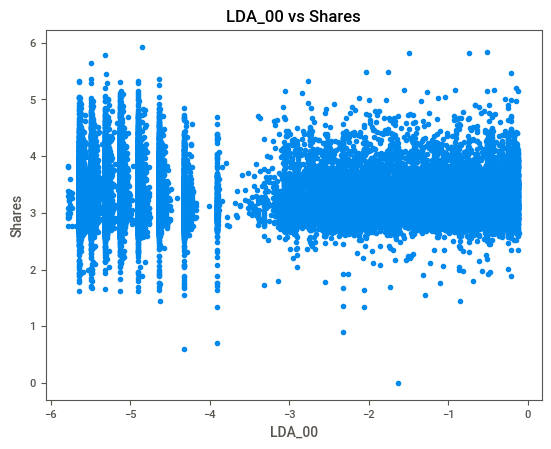

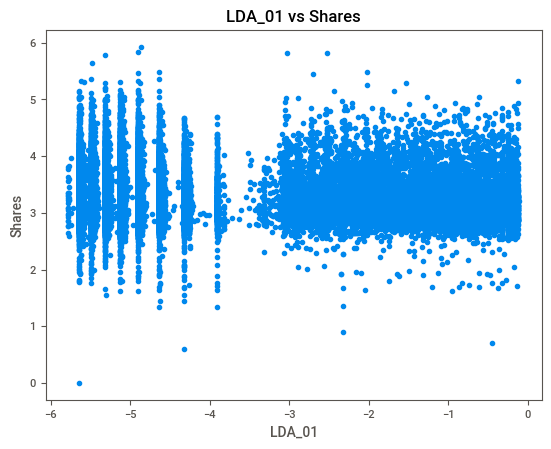

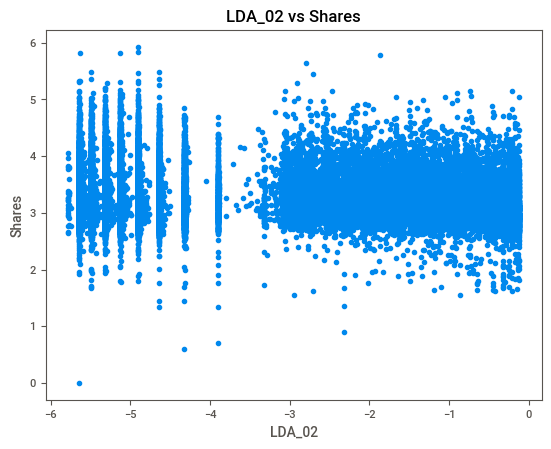

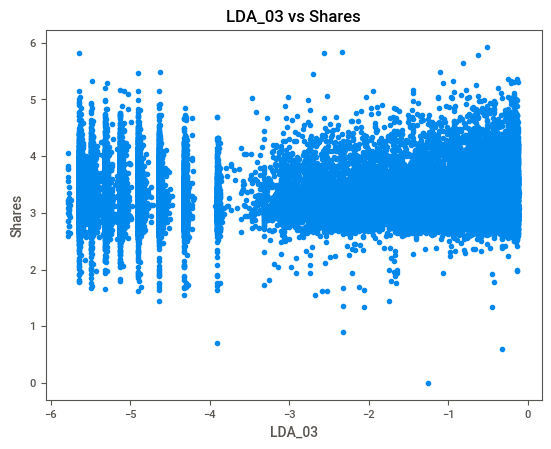

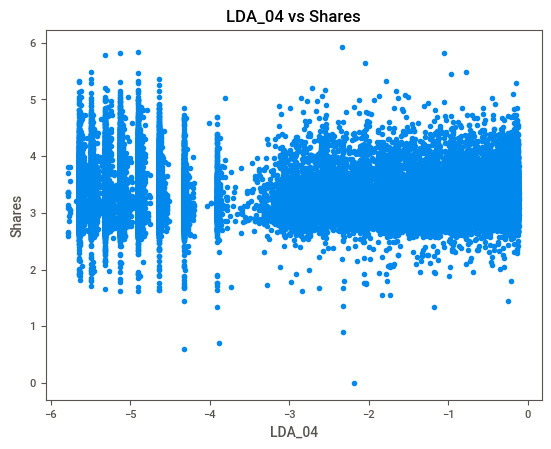

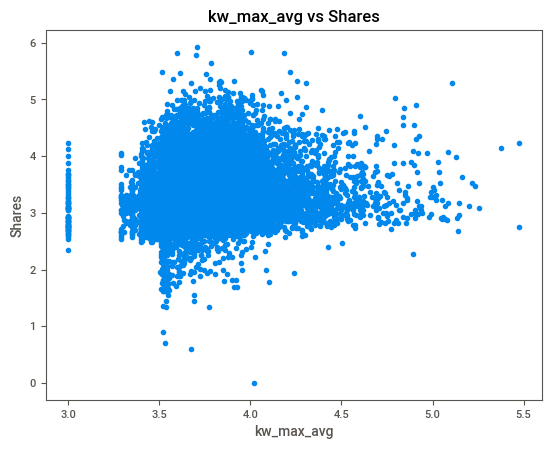

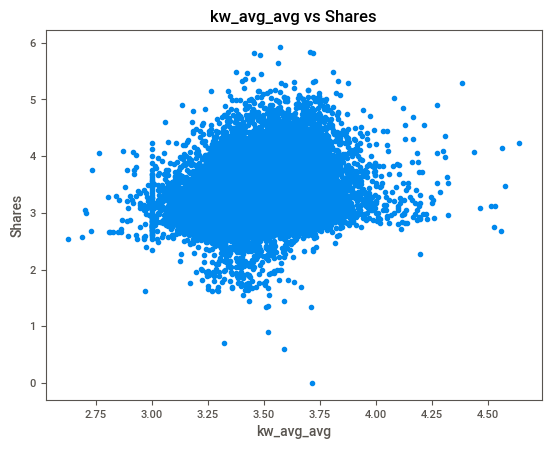

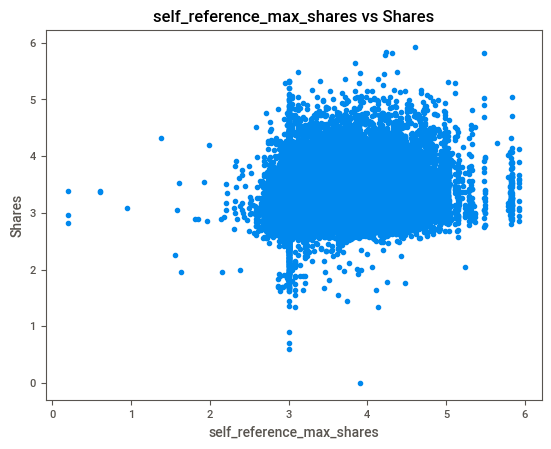

In [ ]:
for feat in sig_feats_df.columns:
    if 'LDA' in feat:
        plt.scatter(np.log2(sig_feats_df[feat]), y)
    else:
        plt.scatter(np.log10(sig_feats_df[feat]), y)
    plt.xlabel(feat)
    plt.ylabel('Shares')
    plt.title(f'{feat} vs Shares')
    plt.show()

## Apply transformations

In [ ]:
sig_feats_df[['LDA_00','LDA_01','LDA_02','LDA_03','LDA_04']] = np.log2(sig_feats_df[['LDA_00','LDA_01','LDA_02','LDA_03','LDA_04']])
sig_feats_df[['kw_max_avg','kw_avg_avg','self_reference_max_shares']] = np.log10(sig_feats_df[['kw_max_avg','kw_avg_avg','self_reference_max_shares']])

/var/folders/2g/3j1bfngd2515lb3wwz2840140000gn/T/ipykernel_59921/1777626713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_feats_df[['LDA_00','LDA_01','LDA_02','LDA_03','LDA_04']] = np.log2(sig_feats_df[['LDA_00','LDA_01','LDA_02','LDA_03','LDA_04']])
/var/folders/2g/3j1bfngd2515lb3wwz2840140000gn/T/ipykernel_59921/1777626713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_feats_df[['kw_max_avg','kw_avg_avg','self_reference_max_shares']] = np.log10(sig_feats_df[['kw_max_avg','kw_avg_avg','s

In [ ]:
sig_feats_df['shares'] = y

/var/folders/2g/3j1bfngd2515lb3wwz2840140000gn/T/ipykernel_59921/2538032854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_feats_df['shares'] = y


In [ ]:
sig_feats_df = sig_feats_df.replace(-np.inf, 0)

In [ ]:
train_df, test_df = train_test_split(sig_feats_df, random_state=10)
y_train = train_df['shares']
X_train = train_df.drop(columns='shares')
y_test= test_df['shares']
X_test = test_df.drop(columns='shares')

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('In sample metrics: ')
pred = model.predict(X_train)
r2 = r2_score(y_train, pred)
mse = mean_squared_error(y_train, pred)
print(f'{r2=:.4f} {mse=:.4f}')

print('Out of sample metrics: ')
pred = model.predict(X_test)
r2 = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)
print(f'{r2=:.4f} {mse=:.4f}')

In sample metrics: 
r2=0.0917 mse=0.1475
Out of sample metrics: 
r2=0.0894 mse=0.1513


train_r2=0.0917 train_mse=0.1475


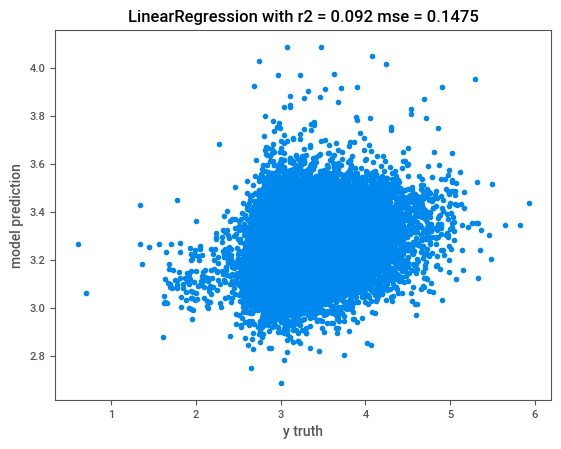

test_r2=0.0894 test_mse=0.1513


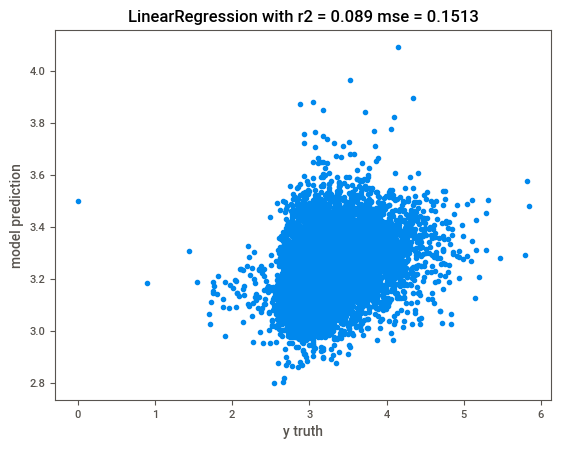

In [ ]:
# Check for overfitting
pred = model.predict(X_train)
r2 = r2_score(y_train, pred)
mse = mean_squared_error(y_train, pred)
print(f'train_{r2=:.4f} train_{mse=:.4f}')

plt.scatter(y_train, pred)
plt.title(f'LinearRegression with r2 = {r2:.3f} mse = {mse:.4f}')
plt.xlabel('y truth')
plt.ylabel('model prediction')
plt.show()


# Check for generalization
pred = model.predict(X_test)
r2 = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)
print(f'test_{r2=:.4f} test_{mse=:.4f}')

plt.scatter(y_test, pred)
plt.title(f'LinearRegression with r2 = {r2:.3f} mse = {mse:.4f}')
plt.xlabel('y truth')
plt.ylabel('model prediction')
plt.show()

In [ ]:
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

train_r2=0.8703 train_mse=0.0210


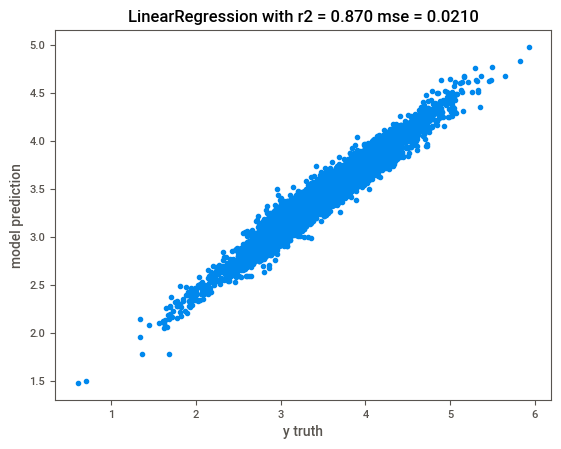

test_r2=0.0770 test_mse=0.1533


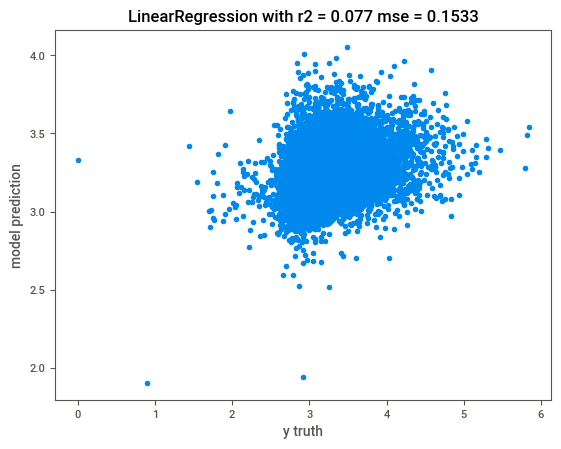

In [ ]:
# Check for overfitting
pred = model.predict(X_train)
r2 = r2_score(y_train, pred)
mse = mean_squared_error(y_train, pred)
print(f'train_{r2=:.4f} train_{mse=:.4f}')

plt.scatter(y_train, pred)
plt.title(f'LinearRegression with r2 = {r2:.3f} mse = {mse:.4f}')
plt.xlabel('y truth')
plt.ylabel('model prediction')
plt.show()


# Check for generalization
pred = model.predict(X_test)
r2 = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)
print(f'test_{r2=:.4f} test_{mse=:.4f}')

plt.scatter(y_test, pred)
plt.title(f'LinearRegression with r2 = {r2:.3f} mse = {mse:.4f}')
plt.xlabel('y truth')
plt.ylabel('model prediction')
plt.show()

# Linear Regression Modeling

#LR1

In [50]:
data = pd.read_csv('OnlineNewsPopularity.csv')

data_cleaned = data.drop(['url', 'timedelta'], axis=1)

X = data_cleaned.drop('shares', axis=1)
y = data_cleaned['shares']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

results = {
    "Train R^2": train_r2,
    "Test R^2": test_r2,
    "Train MSE": train_mse,
    "Test MSE": test_mse
}

print("Model Performance Metrics:")
for metric, value in results.items():
    print(f"{metric}: {value:.4f}")


Model Performance Metrics:
Train R^2: 0.0219
Test R^2: 0.0262
Train MSE: 135766723.9120
Test MSE: 117512637.2780


#LR2 + LR3


In [56]:
data = pd.read_csv('OnlineNewsPopularity.csv')
data_cleaned = data.drop(['url', 'timedelta'], axis=1)

X = data_cleaned.drop('shares', axis=1)
y = data_cleaned['shares']
print(f"Initial shape of X: {X.shape}")

# trasformations
y_log_transformed = np.log1p(y)

continuous_cols = X.select_dtypes(include=['float64', 'int64']).columns


log_transform_cols = ['n_tokens_content', 'num_hrefs', 'num_imgs', 'num_self_hrefs']
for col in log_transform_cols:
    X[col] = np.log1p(X[col])

sqrt_transform_cols = ['n_unique_tokens', 'n_non_stop_unique_tokens', 'num_keywords']
for col in sqrt_transform_cols:
    X[col] = np.sqrt(X[col])

#higher terms
poly = PolynomialFeatures(degree=2, include_bias=False)
X_continuous_transformed = poly.fit_transform(X)
poly_feature_names = poly.get_feature_names_out(X.columns)
X_poly = pd.DataFrame(X_continuous_transformed, columns=poly_feature_names)
print(f"Current shape of X: {X_poly.shape}")


# Select top 100 features b/c it would give 1800 features before (too much)
selector = SelectKBest(score_func=f_regression, k=100)
X_poly_selected = selector.fit_transform(X_poly, y_log_transformed)
selected_feature_names = np.array(poly_feature_names)[selector.get_support()]

X_poly_limited = pd.DataFrame(X_poly_selected, columns=selected_feature_names)

X_train, X_test, y_train, y_test = train_test_split(X_poly_limited, y_log_transformed, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

results = {
    "Train R^2": train_r2,
    "Test R^2": test_r2,
    "Train MSE": train_mse,
    "Test MSE": test_mse
}

print("Model Performance Metrics:")
for metric, value in results.items():
    print(f"{metric}: {value:.4f}")


Initial shape of X: (39644, 58)
Current shape of X: (39644, 1769)
Model Performance Metrics:
Train R^2: 0.1138
Test R^2: 0.1204
Train MSE: 0.7675
Test MSE: 0.7540


#LR3

In [52]:

#stepwise reduction
X_temp = pd.DataFrame(X_train_scaled, columns=X_poly_limited.columns, index=y_train.index)
X_temp = sm.add_constant(X_temp)

mod_temp = sm.OLS(y_train, X_temp).fit()

while max(mod_temp.pvalues) > 0.05 and len(X_temp.columns) > 1:
    max_pvalue_index = np.argmax(mod_temp.pvalues[1:]) + 1
    feature_to_remove = X_temp.columns[max_pvalue_index]

    X_temp = X_temp.drop(columns=[feature_to_remove])

    mod_temp = sm.OLS(y_train, X_temp).fit()

mod_reduced = mod_temp

print(mod_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     83.71
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        05:34:14   Log-Likelihood:                -40826.
No. Observations:               31715   AIC:                         8.175e+04
Df Residuals:                   31666   BIC:                         8.216e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [53]:
#out of sample scores
X_test_reduced = pd.DataFrame(X_test_scaled, columns=X_poly_limited.columns, index=y_test.index)
X_test_reduced = X_test_reduced[X_temp.columns[1:]]
X_test_reduced = sm.add_constant(X_test_reduced)

y_test_pred = mod_reduced.predict(X_test_reduced)

test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Out-of-Sample Evaluation:")
print(f"Test R^2: {test_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}")

Out-of-Sample Evaluation:
Test R^2: 0.1220
Test MSE: 0.7526


#LR4

In [54]:
#LASSO to tune and get best predictors
X_temp_lasso = X_train_scaled
y_temp_lasso = y_train

lasso_cv = LassoCV(cv=5, alphas=np.linspace(0.0001, 0.01, 100), random_state=42)
lasso_cv.fit(X_temp_lasso, y_temp_lasso)

best_alpha = lasso_cv.alpha_
print(f"best alpha: {best_alpha}")

reg_lasso = Lasso(alpha=best_alpha)
reg_lasso.fit(X_temp_lasso, y_temp_lasso)

y_test_pred = reg_lasso.predict(X_test_scaled)
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.7551481317786966, tolerance: 2.1790574807072214
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.685018125459464, tolerance: 2.1790574807072214
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89.07135239234049, tolerance: 2.1790574807072214
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: Convergen

best alpha: 0.0011


In [55]:
print(f"Test R^2: {test_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}")

lasso_coef = pd.Series(reg_lasso.coef_, index=X_poly_limited.columns)
significant_features = lasso_coef[lasso_coef != 0].index.tolist()
print(f"num of significant features: {len(significant_features)}")
print(f"Significant features: {significant_features}")

Test R^2: 0.1211
Test MSE: 0.7534
num of significant features: 62
Significant features: ['data_channel_is_world', 'kw_avg_avg', 'LDA_02', 'n_tokens_title data_channel_is_world', 'n_tokens_title kw_avg_avg', 'n_tokens_title LDA_03', 'n_tokens_content kw_avg_avg', 'n_unique_tokens kw_avg_avg', 'num_hrefs data_channel_is_world', 'num_hrefs kw_max_avg', 'num_hrefs kw_avg_avg', 'num_hrefs LDA_03', 'num_self_hrefs kw_avg_avg', 'num_imgs kw_min_avg', 'num_imgs kw_max_avg', 'num_imgs kw_avg_avg', 'num_imgs LDA_03', 'num_imgs global_subjectivity', 'average_token_length data_channel_is_world', 'average_token_length kw_avg_avg', 'num_keywords kw_min_avg', 'num_keywords kw_avg_avg', 'num_keywords is_weekend', 'num_keywords LDA_03', 'data_channel_is_world kw_avg_avg', 'data_channel_is_world LDA_02', 'data_channel_is_world global_rate_positive_words', 'data_channel_is_world rate_negative_words', 'data_channel_is_world avg_positive_polarity', 'data_channel_is_world min_positive_polarity', 'data_chann

# Regression Tree Modeling

### Model Fitting

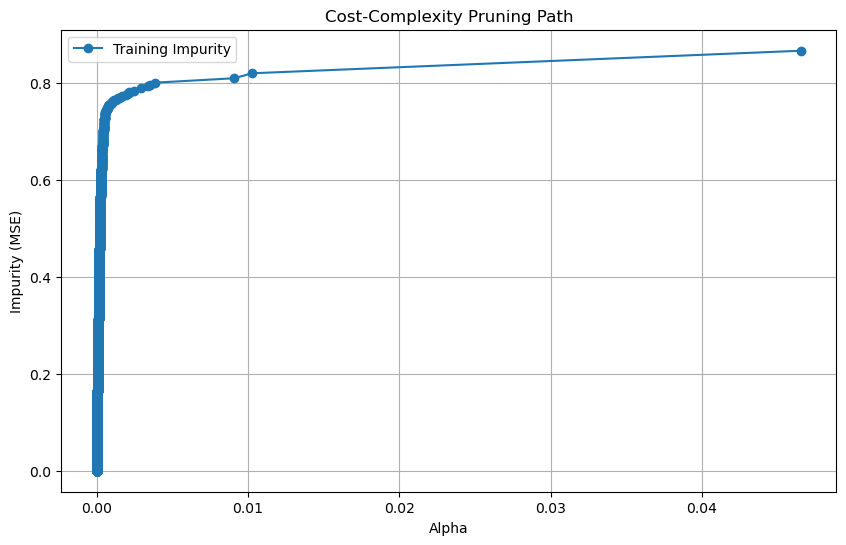

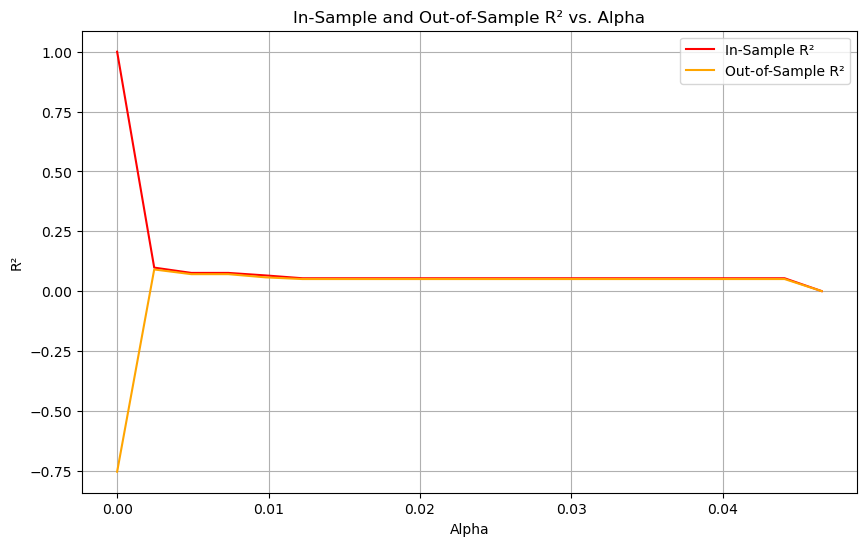

Best alpha: 0.0024496689214468293
Final Pruned Tree Metrics:
In-Sample R²: 0.0982
Out-of-Sample R²: 0.0904


In [4]:
from sklearn.model_selection import cross_val_score

X = df.drop(columns=['shares'])  # predictors (everything except shares)
y = np.log1p(df['shares'])  # Taking log of the target (shares)

# Split into train/test sets - 20% test size feels good here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Initial tree to get pruning path (no pruning yet)
initial_tree = DecisionTreeRegressor(random_state=42)
initial_tree.fit(X_train, y_train)
path = initial_tree.cost_complexity_pruning_path(X_train, y_train)  # finding alphas

ccp_alphas = path.ccp_alphas  # possible pruning alphas
MSEs = path.impurities  # corresponding MSEs (training)

# Visualize pruning path, looks helpful
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, MSEs, marker='o', label="Training Impurity")
plt.xlabel("Alpha")
plt.ylabel("Impurity (MSE)")
plt.title("Cost-Complexity Pruning Path")
plt.legend()
plt.grid()
plt.show()

# Loop through alphas to find best one (test ~20 points)
R2_in, R2_out = [], []  # Store in-sample and out-of-sample R²
selected_alphas = np.linspace(min(ccp_alphas), max(ccp_alphas), 20)

for alpha in selected_alphas:  # test different pruning levels
    tree_temp = DecisionTreeRegressor(ccp_alpha=alpha, random_state=42)
    tree_temp.fit(X_train, y_train)  # Fit on train set
    R2_in.append(r2_score(y_train, tree_temp.predict(X_train)))  # Train R²
    R2_out.append(r2_score(y_test, tree_temp.predict(X_test)))  # Test R²
    
# Compare R² for each alpha (find peak out-of-sample performance)
plt.figure(figsize=(10, 6))
plt.plot(selected_alphas, R2_in, color="red", label="In-Sample R²")
plt.plot(selected_alphas, R2_out, color="orange", label="Out-of-Sample R²")
plt.xlabel("Alpha")
plt.ylabel("R²")
plt.title("In-Sample and Out-of-Sample R² vs. Alpha")
plt.legend()
plt.grid()
plt.show()

# Picking best alpha based on max test R²
best_alpha = selected_alphas[np.argmax(R2_out)]
print("Best alpha:", best_alpha)

# Train final pruned tree with chosen alpha
final_pruned_tree = DecisionTreeRegressor(ccp_alpha=best_alpha, random_state=42)
final_pruned_tree.fit(X_train, y_train)

# Evaluate final pruned tree (train/test R²)
y_train_pred = final_pruned_tree.predict(X_train)
y_test_pred = final_pruned_tree.predict(X_test)

print("Final Pruned Tree Metrics:")
print(f"In-Sample R²: {r2_score(y_train, y_train_pred):.4f}")  # How well it fits train data
print(f"Out-of-Sample R²: {r2_score(y_test, y_test_pred):.4f}")  # Generalization to test data


### Random Forest

Random Forest Metrics:
In-Sample R²: 0.1143
Out-of-Sample R²: 0.1062


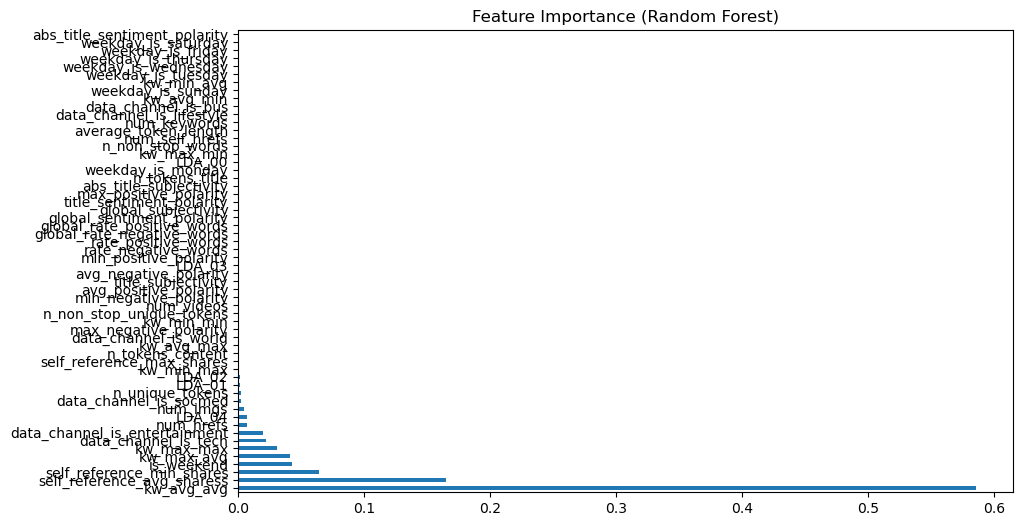

In [5]:
# Random forest, all trees pruned with best_alpha
rf_pruned = RandomForestRegressor(n_estimators=100, random_state=42, ccp_alpha=best_alpha)
rf_pruned.fit(X_train, y_train)  # Fit the random forest

# Evaluate Random Forest (train/test R²)
y_train_rf_pred = rf_pruned.predict(X_train)
y_test_rf_pred = rf_pruned.predict(X_test)

print("Random Forest Metrics:")
print(f"In-Sample R²: {r2_score(y_train, y_train_rf_pred):.4f}")  # Train R²
print(f"Out-of-Sample R²: {r2_score(y_test, y_test_rf_pred):.4f}")  # Test R²

# Plot feature importance to see what's driving predictions
importances = pd.Series(rf_pruned.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.plot(kind="barh", figsize=(10, 6), title="Feature Importance (Random Forest)")
plt.show()

# Conclusion

After comparing several models to predict article shares for Mashable, the Linear Regression with Stepwise Reduction emerged as the best performer, with an R² of 0.1220 and MSE of 0.7526. This model outperformed other approaches including LASSO, log transformations, random forest, and regression trees. However, the relatively low R² across all models indicates that predicting article shares remains a challenging task.

In conclusion, while the Linear Regression with Stepwise Reduction model provides the best performance among those tested, the overall low R² values across all models indicate that predicting article shares remains a complex challenge. Mashable should use the model's insights to inform content strategy but should also continue to rely on editorial expertise and real-time engagement metrics for comprehensive content optimization.